In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd
from datetime import datetime


#DATOS PISOA
#flat="./pisoA/"
#day="19244"
#folders=["TRACK2","TRACK3","TRACK4","TRACK5","TRACK6","TRACK7","TRACK8","TRACK9"]

#DATOS PISOB
flat="./pisoB/"
day="19311"
folders=["TRACK1","TRACK2","TRACK3","TRACK4","TRACK5","TRACK6","TRACK7","TRACK9"]

#Estas variables definen los intervalos de tiempo que segmentan los datos para crear una secuencia de valores RSSI a partir de un tiempo determinado
#Ventanas temporales de valores "futuros" (los datos RSSI despues de la estimación de tiempo) hasta 12 segundos
tW2=[12,10,8,6,4,3,2,1,0]
#Ventanas temporales de valores "pasados" (los datos RSSI despues de la estimación de tiempo) hasta 12 segundos
tW1=[0,-1,-2,-3,-4,-6,-8,-10,-12]

anchors=["banio", "cocina", "dormitorio", "salon"]


#LEEMOS los datos RSSI (tiempo, ancla y señal)
data=[]
N=0
for f in folders:
    for a in anchors:
        print(flat+f+"/wearable/"+day+"."+a+".tsv")
        series=read_csv(flat+f+"/wearable/"+day+"."+a+".tsv", sep="\t",parse_dates=True,header=None)
        N=N+len(series.values)
        for d in series.values:
            d2=[]
            d2=(np.append(d[0:2],a))
            print(d2)
            data.append(d2)

data=np.array(data)
print(len(data))
print(N)


./pisoB/TRACK1/wearable/19311.banio.tsv
[1668519251 -86 'banio']
[1668519264 -88 'banio']
[1668519276 -90 'banio']
[1668519291 -89 'banio']
[1668519297 -95 'banio']
[1668519301 -96 'banio']
[1668519314 -95 'banio']
[1668519318 -94 'banio']
[1668519320 -93 'banio']
[1668519324 -80 'banio']
[1668519328 -80 'banio']
[1668519330 -72 'banio']
[1668519332 -80 'banio']
[1668519334 -66 'banio']
[1668519336 -85 'banio']
[1668519338 -78 'banio']
[1668519340 -71 'banio']
[1668519344 -76 'banio']
[1668519346 -87 'banio']
[1668519349 -81 'banio']
[1668519351 -63 'banio']
[1668519353 -63 'banio']
[1668519355 -77 'banio']
[1668519357 -83 'banio']
[1668519359 -84 'banio']
[1668519367 -87 'banio']
[1668519385 -87 'banio']
[1668519389 -95 'banio']
[1668519396 -93 'banio']
[1668519402 -91 'banio']
[1668519404 -89 'banio']
[1668519408 -94 'banio']
[1668519410 -85 'banio']
[1668519412 -91 'banio']
[1668519416 -86 'banio']
[1668519420 -85 'banio']
[1668519422 -86 'banio']
[1668519427 -92 'banio']
[166851943

[1668520983 -94 'banio']
[1668520987 -90 'banio']
[1668520989 -92 'banio']
[1668521005 -82 'banio']
[1668521009 -76 'banio']
[1668521013 -83 'banio']
[1668521017 -89 'banio']
[1668521021 -77 'banio']
[1668521032 -79 'banio']
[1668521038 -75 'banio']
[1668521044 -82 'banio']
[1668521048 -85 'banio']
[1668521052 -82 'banio']
[1668521054 -87 'banio']
[1668521056 -84 'banio']
[1668521060 -86 'banio']
[1668521064 -79 'banio']
[1668521068 -85 'banio']
./pisoB/TRACK7/wearable/19311.cocina.tsv
[1668520869 -68 'cocina']
[1668520871 -76 'cocina']
[1668520875 -78 'cocina']
[1668520878 -74 'cocina']
[1668520880 -83 'cocina']
[1668520882 -87 'cocina']
[1668520886 -90 'cocina']
[1668520888 -84 'cocina']
[1668520916 -94 'cocina']
[1668520918 -94 'cocina']
[1668520930 -74 'cocina']
[1668520933 -79 'cocina']
[1668520935 -81 'cocina']
[1668520939 -80 'cocina']
[1668520941 -88 'cocina']
[1668520943 -75 'cocina']
[1668520949 -79 'cocina']
[1668520953 -88 'cocina']
[1668520957 -92 'cocina']
[1668520959 -87

In [2]:
#Leemos los datos del ground truth que ha etiquetado el usuario (pixeles en la imagen)
dataY=[]

for f in folders:
    series=read_csv(flat+f+"/location_gt/"+day+".location.hab.tsv", sep="\t",parse_dates=True,header=None)
    for d in series.values:
        dataY.append(d)
dataY=np.array(dataY)

In [3]:
#Normalizamos los valores de RSSI
min_v=(float)(min(data[:,1]))
max_v=(float)(max(data[:,1]))
print(min_v,max_v)

-100.0 -59.0


In [4]:
#INFO: tiempo inicial y final de los datos
min_t=(float)(min(dataY[:,0]))
max_t=(float)(max(dataY[:,0]))
print(min_t,max_t)

1668519288.0 1668521680.0


In [5]:
#Esta función obtiene la media de un cojunto de señales RSSI (normalizada)
def getAVG(vs):
    if (len(vs)==0):
        return 0
    #print(" avg:", vs)
    return (np.mean(vs)-min_v)/(max_v-min_v)

#Esta función obtiene el MAX de un cojunto de señales RSSI (normalizada)
def getMAX(vs):
    if (len(vs)==0):
        return 0
    #print(" avg:", vs)
    return (max(vs)-min_v)/(max_v-min_v)

#Esta función obtiene el MIN de un cojunto de señales RSSI (normalizada)
def getMIN(vs):
    if (len(vs)==0):
        return 0
    #print(" avg:", vs)
    return (min(vs)-min_v)/(max_v-min_v)

In [6]:
#Valores de X, Y
X=[]
Y=[]



c=0

#Desde el tiempo inicial al final (en segundos) de uno en uno (con un desplazamiento en funcion del tamaño de ventana para recoger datos anteriores y futuros)
for t in np.arange(min_t-min(tW1),max_t-max(tW2),1.0):
    print(t)
    
    #Recogemos la posicioón de X,Y más cercana anterior y posterior a este tiempo t
    agXY0=dataY[np.sort(np.where( (dataY[:,0] <  t)))][0][-1]
    agXYNn=dataY[np.sort(np.where( (dataY[:,0] >=  t)))][0][0]
    #calculamos el incremento de tiempo respecto t, del futuro y del pasado
    incT0=t-agXY0[0]
    incTN=agXYNn[0]-t
    print("agXY0:",agXY0, "incT0:",incT0)
    print("agXYNn:",agXYNn, "incTN:",incTN)
    
    #IMPORTANTE: si el usuario no etiquetó esa muestra en un tiempo cercano (a 10 segundos), la descartamos!
    if(incT0>5 or incTN> 5):
        print("NOT DATA AVAILABLE!")
        continue
    
    #valores de las x-> NO posicion, los datos de entrada de RSSI
    xi=[]
    for a in anchors:
        xirssi1=[]
        xirssi2=[]
        xirssi3=[]
        xirssi4=[]
        xirssi5=[]
        xirssi6=[]
        #Ventanas futuras
        for it in range(len(tW1)-2,-1,-1):
            t0=t+tW1[it]
            tN=t+tW1[it+1]
             #Todos los datos en ese segmento de ventana
            ag1=data[np.where((data[:,2] == a) & (data[:,0] <= t0) & (data[:,0] >=  tN))]
            print("t+:",t,"a:",str(a),"t0:",t0,"tN:",tN," ag1:", ag1)
            #Sacamos las 3 características de esa ventana (max,min,media)
            xirssi1.append(getAVG(ag1[:,1]))
            #xirssi2.append(getMAX(ag1[:,1]))
            #xirssi3.append(getMIN(ag1[:,1]))
        #Ventanas pasadas
        for it in range(0,len(tW2)-1):
            t0=t+tW2[it]
            tN=t+tW2[it+1]
            ag1=data[np.where((data[:,2] == a) & (data[:,0] <= t0) & (data[:,0] >=  tN))]
            #print("t-:",t,"a:",str(a),"t0:",t0,"tN:",tN," ag1:", ag1)
            #Sacamos las 3 características de esa ventana (max,min,media)
            xirssi4.append(getAVG(ag1[:,1]))
            #xirssi5.append(getMAX(ag1[:,1]))
            #xirssi6.append(getMIN(ag1[:,1]))
            
        #añadimos los valores de entradas futuras y pasadas a la sequencia     
        xi.append(xirssi1)
        #xi.append(xirssi2)
        #xi.append(xirssi3)
        xi.append(xirssi4)
        #xi.append(xirssi5)
        #xi.append(xirssi6)
    

   
    
    #añadimos la sequencia de caracteristicas X (RSSI) e Y(posX,posY de la imagen)
    
    print("xi:",xi)
    max0=max(np.transpose(xi).flatten())
    print("max(xi):",max0)
    
    
    if(max0==0):
        print("NOT enough X DATA AVAILABLE!")
        continue
        
        
    X.append(np.transpose(xi))
    
    if incT0 < incTN:
        Y.append(agXY0[5])
    else:
        Y.append(agXYNn[5])
    
    print("count:",c)



    c=c+1
    if(c>5000):
        break
        
        
#Importante: pasar los datos a NUMPY para trabajar con el modelo de DL
X=np.array(X)
Y=np.array(Y)
print(X.shape)
print(Y.shape)


1668519300.0
agXY0: [1668519289 '2022-11-15 14:34:49' 1668519289 415 97 'livingroom'] incT0: 11.0
agXYNn: [1668519306 '2022-11-15 14:35:06' 1668519306 407 116 'livingroom'] incTN: 6.0
NOT DATA AVAILABLE!
1668519301.0
agXY0: [1668519289 '2022-11-15 14:34:49' 1668519289 415 97 'livingroom'] incT0: 12.0
agXYNn: [1668519306 '2022-11-15 14:35:06' 1668519306 407 116 'livingroom'] incTN: 5.0
NOT DATA AVAILABLE!
1668519302.0
agXY0: [1668519289 '2022-11-15 14:34:49' 1668519289 415 97 'livingroom'] incT0: 13.0
agXYNn: [1668519306 '2022-11-15 14:35:06' 1668519306 407 116 'livingroom'] incTN: 4.0
NOT DATA AVAILABLE!
1668519303.0
agXY0: [1668519289 '2022-11-15 14:34:49' 1668519289 415 97 'livingroom'] incT0: 14.0
agXYNn: [1668519306 '2022-11-15 14:35:06' 1668519306 407 116 'livingroom'] incTN: 3.0
NOT DATA AVAILABLE!
1668519304.0
agXY0: [1668519289 '2022-11-15 14:34:49' 1668519289 415 97 'livingroom'] incT0: 15.0
agXYNn: [1668519306 '2022-11-15 14:35:06' 1668519306 407 116 'livingroom'] incTN: 2.0


t+: 1668519309.0 a: cocina t0: 1668519303.0 tN: 1668519301.0  ag1: [[1668519301 -71 'cocina']
 [1668519303 -81 'cocina']]
t+: 1668519309.0 a: cocina t0: 1668519305.0 tN: 1668519303.0  ag1: [[1668519303 -81 'cocina']
 [1668519305 -78 'cocina']]
t+: 1668519309.0 a: cocina t0: 1668519306.0 tN: 1668519305.0  ag1: [[1668519305 -78 'cocina']]
t+: 1668519309.0 a: cocina t0: 1668519307.0 tN: 1668519306.0  ag1: [[1668519307 -79 'cocina']]
t+: 1668519309.0 a: cocina t0: 1668519308.0 tN: 1668519307.0  ag1: [[1668519307 -79 'cocina']]
t+: 1668519309.0 a: cocina t0: 1668519309.0 tN: 1668519308.0  ag1: [[1668519309 -90 'cocina']]
t+: 1668519309.0 a: dormitorio t0: 1668519299.0 tN: 1668519297.0  ag1: [[1668519297 -95 'dormitorio']
 [1668519299 -81 'dormitorio']]
t+: 1668519309.0 a: dormitorio t0: 1668519301.0 tN: 1668519299.0  ag1: [[1668519299 -81 'dormitorio']
 [1668519301 -90 'dormitorio']]
t+: 1668519309.0 a: dormitorio t0: 1668519303.0 tN: 1668519301.0  ag1: [[1668519301 -90 'dormitorio']
 [1668

t+: 1668519313.0 a: cocina t0: 1668519303.0 tN: 1668519301.0  ag1: [[1668519301 -71 'cocina']
 [1668519303 -81 'cocina']]
t+: 1668519313.0 a: cocina t0: 1668519305.0 tN: 1668519303.0  ag1: [[1668519303 -81 'cocina']
 [1668519305 -78 'cocina']]
t+: 1668519313.0 a: cocina t0: 1668519307.0 tN: 1668519305.0  ag1: [[1668519305 -78 'cocina']
 [1668519307 -79 'cocina']]
t+: 1668519313.0 a: cocina t0: 1668519309.0 tN: 1668519307.0  ag1: [[1668519307 -79 'cocina']
 [1668519309 -90 'cocina']]
t+: 1668519313.0 a: cocina t0: 1668519310.0 tN: 1668519309.0  ag1: [[1668519309 -90 'cocina']]
t+: 1668519313.0 a: cocina t0: 1668519311.0 tN: 1668519310.0  ag1: [[1668519311 -88 'cocina']]
t+: 1668519313.0 a: cocina t0: 1668519312.0 tN: 1668519311.0  ag1: [[1668519311 -88 'cocina']]
t+: 1668519313.0 a: cocina t0: 1668519313.0 tN: 1668519312.0  ag1: []
t+: 1668519313.0 a: dormitorio t0: 1668519303.0 tN: 1668519301.0  ag1: [[1668519301 -90 'dormitorio']
 [1668519303 -96 'dormitorio']]
t+: 1668519313.0 a: dor

t+: 1668519316.0 a: dormitorio t0: 1668519313.0 tN: 1668519312.0  ag1: []
t+: 1668519316.0 a: dormitorio t0: 1668519314.0 tN: 1668519313.0  ag1: []
t+: 1668519316.0 a: dormitorio t0: 1668519315.0 tN: 1668519314.0  ag1: []
t+: 1668519316.0 a: dormitorio t0: 1668519316.0 tN: 1668519315.0  ag1: []
t+: 1668519316.0 a: salon t0: 1668519306.0 tN: 1668519304.0  ag1: []
t+: 1668519316.0 a: salon t0: 1668519308.0 tN: 1668519306.0  ag1: []
t+: 1668519316.0 a: salon t0: 1668519310.0 tN: 1668519308.0  ag1: []
t+: 1668519316.0 a: salon t0: 1668519312.0 tN: 1668519310.0  ag1: []
t+: 1668519316.0 a: salon t0: 1668519313.0 tN: 1668519312.0  ag1: []
t+: 1668519316.0 a: salon t0: 1668519314.0 tN: 1668519313.0  ag1: []
t+: 1668519316.0 a: salon t0: 1668519315.0 tN: 1668519314.0  ag1: []
t+: 1668519316.0 a: salon t0: 1668519316.0 tN: 1668519315.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0.12195121951219512, 0.12195121951219512, 0], [0.4878048780487805, 0.4878048780487805, 0.4878048780487805, 0.17073170731707318, 0.1

t+: 1668519320.0 a: cocina t0: 1668519317.0 tN: 1668519316.0  ag1: [[1668519317 -69 'cocina']]
t+: 1668519320.0 a: cocina t0: 1668519318.0 tN: 1668519317.0  ag1: [[1668519317 -69 'cocina']]
t+: 1668519320.0 a: cocina t0: 1668519319.0 tN: 1668519318.0  ag1: []
t+: 1668519320.0 a: cocina t0: 1668519320.0 tN: 1668519319.0  ag1: [[1668519320 -65 'cocina']]
t+: 1668519320.0 a: dormitorio t0: 1668519310.0 tN: 1668519308.0  ag1: [[1668519309 -87 'dormitorio']]
t+: 1668519320.0 a: dormitorio t0: 1668519312.0 tN: 1668519310.0  ag1: [[1668519311 -85 'dormitorio']]
t+: 1668519320.0 a: dormitorio t0: 1668519314.0 tN: 1668519312.0  ag1: []
t+: 1668519320.0 a: dormitorio t0: 1668519316.0 tN: 1668519314.0  ag1: []
t+: 1668519320.0 a: dormitorio t0: 1668519317.0 tN: 1668519316.0  ag1: []
t+: 1668519320.0 a: dormitorio t0: 1668519318.0 tN: 1668519317.0  ag1: []
t+: 1668519320.0 a: dormitorio t0: 1668519319.0 tN: 1668519318.0  ag1: [[1668519319 -86 'dormitorio']]
t+: 1668519320.0 a: dormitorio t0: 16685

t+: 1668519324.0 a: banio t0: 1668519324.0 tN: 1668519323.0  ag1: [[1668519324 -80 'banio']]
t+: 1668519324.0 a: cocina t0: 1668519314.0 tN: 1668519312.0  ag1: []
t+: 1668519324.0 a: cocina t0: 1668519316.0 tN: 1668519314.0  ag1: []
t+: 1668519324.0 a: cocina t0: 1668519318.0 tN: 1668519316.0  ag1: [[1668519317 -69 'cocina']]
t+: 1668519324.0 a: cocina t0: 1668519320.0 tN: 1668519318.0  ag1: [[1668519320 -65 'cocina']]
t+: 1668519324.0 a: cocina t0: 1668519321.0 tN: 1668519320.0  ag1: [[1668519320 -65 'cocina']
 [1668519321 -83 'cocina']]
t+: 1668519324.0 a: cocina t0: 1668519322.0 tN: 1668519321.0  ag1: [[1668519321 -83 'cocina']]
t+: 1668519324.0 a: cocina t0: 1668519323.0 tN: 1668519322.0  ag1: []
t+: 1668519324.0 a: cocina t0: 1668519324.0 tN: 1668519323.0  ag1: []
t+: 1668519324.0 a: dormitorio t0: 1668519314.0 tN: 1668519312.0  ag1: []
t+: 1668519324.0 a: dormitorio t0: 1668519316.0 tN: 1668519314.0  ag1: []
t+: 1668519324.0 a: dormitorio t0: 1668519318.0 tN: 1668519316.0  ag1: [

agXY0: [1668519327 '2022-11-15 14:35:27' 1668519327 335 426 'other'] incT0: 1.0
agXYNn: [1668519328 '2022-11-15 14:35:28' 1668519328 336 431 'other'] incTN: 0.0
t+: 1668519328.0 a: banio t0: 1668519318.0 tN: 1668519316.0  ag1: [[1668519318 -94 'banio']]
t+: 1668519328.0 a: banio t0: 1668519320.0 tN: 1668519318.0  ag1: [[1668519318 -94 'banio']
 [1668519320 -93 'banio']]
t+: 1668519328.0 a: banio t0: 1668519322.0 tN: 1668519320.0  ag1: [[1668519320 -93 'banio']]
t+: 1668519328.0 a: banio t0: 1668519324.0 tN: 1668519322.0  ag1: [[1668519324 -80 'banio']]
t+: 1668519328.0 a: banio t0: 1668519325.0 tN: 1668519324.0  ag1: [[1668519324 -80 'banio']]
t+: 1668519328.0 a: banio t0: 1668519326.0 tN: 1668519325.0  ag1: []
t+: 1668519328.0 a: banio t0: 1668519327.0 tN: 1668519326.0  ag1: []
t+: 1668519328.0 a: banio t0: 1668519328.0 tN: 1668519327.0  ag1: [[1668519328 -80 'banio']]
t+: 1668519328.0 a: cocina t0: 1668519318.0 tN: 1668519316.0  ag1: [[1668519317 -69 'cocina']]
t+: 1668519328.0 a: co

xi: [[0.17073170731707318, 0, 0.4878048780487805, 0, 0.4878048780487805, 0.4878048780487805, 0.6829268292682927, 0.6829268292682927], [0, 0.7073170731707317, 0.5365853658536586, 0.36585365853658536, 0.8292682926829268, 0.8292682926829268, 0.4878048780487805, 0.4878048780487805], [0.6341463414634146, 0.4146341463414634, 0, 0, 0.3902439024390244, 0.3902439024390244, 0, 0], [0.0, 0.12195121951219512, 0, 0, 0, 0, 0.1951219512195122, 0.1951219512195122], [0.34146341463414637, 0.34146341463414637, 0, 0.3170731707317073, 0.21951219512195122, 0.21951219512195122, 0, 0], [0.36585365853658536, 0, 0, 0.17073170731707318, 0, 0, 0, 0], [0.0975609756097561, 0.0975609756097561, 0, 0, 0, 0, 0.12195121951219512, 0.12195121951219512], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.8292682926829268
count: 24
1668519332.0
agXY0: [1668519331 '2022-11-15 14:35:31' 1668519331 347 558 'toilet'] incT0: 1.0
agXYNn: [1668519332 '2022-11-15 14:35:32' 1668519332 349 564 'toilet'] incTN: 0.0
t+: 1668519332.0 a: banio t0: 166

t+: 1668519335.0 a: banio t0: 1668519329.0 tN: 1668519327.0  ag1: [[1668519328 -80 'banio']]
t+: 1668519335.0 a: banio t0: 1668519331.0 tN: 1668519329.0  ag1: [[1668519330 -72 'banio']]
t+: 1668519335.0 a: banio t0: 1668519332.0 tN: 1668519331.0  ag1: [[1668519332 -80 'banio']]
t+: 1668519335.0 a: banio t0: 1668519333.0 tN: 1668519332.0  ag1: [[1668519332 -80 'banio']]
t+: 1668519335.0 a: banio t0: 1668519334.0 tN: 1668519333.0  ag1: [[1668519334 -66 'banio']]
t+: 1668519335.0 a: banio t0: 1668519335.0 tN: 1668519334.0  ag1: [[1668519334 -66 'banio']]
t+: 1668519335.0 a: cocina t0: 1668519325.0 tN: 1668519323.0  ag1: []
t+: 1668519335.0 a: cocina t0: 1668519327.0 tN: 1668519325.0  ag1: []
t+: 1668519335.0 a: cocina t0: 1668519329.0 tN: 1668519327.0  ag1: [[1668519328 -84 'cocina']]
t+: 1668519335.0 a: cocina t0: 1668519331.0 tN: 1668519329.0  ag1: []
t+: 1668519335.0 a: cocina t0: 1668519332.0 tN: 1668519331.0  ag1: [[1668519332 -92 'cocina']]
t+: 1668519335.0 a: cocina t0: 1668519333.

t+: 1668519338.0 a: salon t0: 1668519338.0 tN: 1668519337.0  ag1: []
xi: [[0.4878048780487805, 0.5853658536585366, 0.5853658536585366, 0.6585365853658537, 0.8292682926829268, 0.36585365853658536, 0.36585365853658536, 0.5365853658536586], [0.4634146341463415, 0.3170731707317073, 0.45121951219512196, 0.5853658536585366, 0, 0.7073170731707317, 0.7073170731707317, 0.5365853658536586], [0.3902439024390244, 0.3902439024390244, 0.1951219512195122, 0.1951219512195122, 0, 0, 0, 0], [0.1951219512195122, 0.1951219512195122, 0.24390243902439024, 0.12195121951219512, 0.0, 0.12195121951219512, 0.12195121951219512, 0], [0.2682926829268293, 0.21951219512195122, 0, 0, 0, 0.17073170731707318, 0.17073170731707318, 0], [0, 0, 0, 0.36585365853658536, 0.36585365853658536, 0, 0, 0], [0, 0.12195121951219512, 0.12195121951219512, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.8292682926829268
count: 31
1668519339.0
agXY0: [1668519338 '2022-11-15 14:35:38' 1668519338 404 660 'other'] incT0: 1.0
agXYNn: [1

t+: 1668519343.0 a: salon t0: 1668519342.0 tN: 1668519341.0  ag1: []
t+: 1668519343.0 a: salon t0: 1668519343.0 tN: 1668519342.0  ag1: []
xi: [[0.4878048780487805, 0.8292682926829268, 0.36585365853658536, 0.5365853658536586, 0.7073170731707317, 0.7073170731707317, 0, 0], [0.7317073170731707, 0.9024390243902439, 0.6829268292682927, 0.4634146341463415, 0.3170731707317073, 0.3170731707317073, 0.5853658536585366, 0.5853658536585366], [0.1951219512195122, 0, 0, 0, 0.12195121951219512, 0.12195121951219512, 0.0, 0.0], [0, 0.0975609756097561, 0, 0.1951219512195122, 0, 0, 0.24390243902439024, 0.24390243902439024], [0, 0, 0.17073170731707318, 0, 0, 0, 0.36585365853658536, 0.36585365853658536], [0, 0.2682926829268293, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.9024390243902439
count: 35
1668519344.0
agXY0: [1668519338 '2022-11-15 14:35:38' 1668519338 404 660 'other'] incT0: 6.0
agXYNn: [1668519345 '2022-11-15 14:35:45' 1668519345 410 649 'other'] incTN: 1.0


t+: 1668519349.0 a: dormitorio t0: 1668519343.0 tN: 1668519341.0  ag1: [[1668519342 -85 'dormitorio']]
t+: 1668519349.0 a: dormitorio t0: 1668519345.0 tN: 1668519343.0  ag1: []
t+: 1668519349.0 a: dormitorio t0: 1668519346.0 tN: 1668519345.0  ag1: []
t+: 1668519349.0 a: dormitorio t0: 1668519347.0 tN: 1668519346.0  ag1: []
t+: 1668519349.0 a: dormitorio t0: 1668519348.0 tN: 1668519347.0  ag1: []
t+: 1668519349.0 a: dormitorio t0: 1668519349.0 tN: 1668519348.0  ag1: []
t+: 1668519349.0 a: salon t0: 1668519339.0 tN: 1668519337.0  ag1: []
t+: 1668519349.0 a: salon t0: 1668519341.0 tN: 1668519339.0  ag1: []
t+: 1668519349.0 a: salon t0: 1668519343.0 tN: 1668519341.0  ag1: []
t+: 1668519349.0 a: salon t0: 1668519345.0 tN: 1668519343.0  ag1: []
t+: 1668519349.0 a: salon t0: 1668519346.0 tN: 1668519345.0  ag1: []
t+: 1668519349.0 a: salon t0: 1668519347.0 tN: 1668519346.0  ag1: []
t+: 1668519349.0 a: salon t0: 1668519348.0 tN: 1668519347.0  ag1: []
t+: 1668519349.0 a: salon t0: 1668519349.0 t

t+: 1668519353.0 a: dormitorio t0: 1668519343.0 tN: 1668519341.0  ag1: [[1668519342 -85 'dormitorio']]
t+: 1668519353.0 a: dormitorio t0: 1668519345.0 tN: 1668519343.0  ag1: []
t+: 1668519353.0 a: dormitorio t0: 1668519347.0 tN: 1668519345.0  ag1: []
t+: 1668519353.0 a: dormitorio t0: 1668519349.0 tN: 1668519347.0  ag1: []
t+: 1668519353.0 a: dormitorio t0: 1668519350.0 tN: 1668519349.0  ag1: []
t+: 1668519353.0 a: dormitorio t0: 1668519351.0 tN: 1668519350.0  ag1: []
t+: 1668519353.0 a: dormitorio t0: 1668519352.0 tN: 1668519351.0  ag1: [[1668519352 -89 'dormitorio']]
t+: 1668519353.0 a: dormitorio t0: 1668519353.0 tN: 1668519352.0  ag1: [[1668519352 -89 'dormitorio']]
t+: 1668519353.0 a: salon t0: 1668519343.0 tN: 1668519341.0  ag1: []
t+: 1668519353.0 a: salon t0: 1668519345.0 tN: 1668519343.0  ag1: []
t+: 1668519353.0 a: salon t0: 1668519347.0 tN: 1668519345.0  ag1: []
t+: 1668519353.0 a: salon t0: 1668519349.0 tN: 1668519347.0  ag1: []
t+: 1668519353.0 a: salon t0: 1668519350.0 tN

t+: 1668519357.0 a: dormitorio t0: 1668519355.0 tN: 1668519354.0  ag1: []
t+: 1668519357.0 a: dormitorio t0: 1668519356.0 tN: 1668519355.0  ag1: []
t+: 1668519357.0 a: dormitorio t0: 1668519357.0 tN: 1668519356.0  ag1: []
t+: 1668519357.0 a: salon t0: 1668519347.0 tN: 1668519345.0  ag1: []
t+: 1668519357.0 a: salon t0: 1668519349.0 tN: 1668519347.0  ag1: []
t+: 1668519357.0 a: salon t0: 1668519351.0 tN: 1668519349.0  ag1: []
t+: 1668519357.0 a: salon t0: 1668519353.0 tN: 1668519351.0  ag1: []
t+: 1668519357.0 a: salon t0: 1668519354.0 tN: 1668519353.0  ag1: []
t+: 1668519357.0 a: salon t0: 1668519355.0 tN: 1668519354.0  ag1: []
t+: 1668519357.0 a: salon t0: 1668519356.0 tN: 1668519355.0  ag1: []
t+: 1668519357.0 a: salon t0: 1668519357.0 tN: 1668519356.0  ag1: []
xi: [[0.3170731707317073, 0.4634146341463415, 0.6829268292682927, 0.9024390243902439, 0.9024390243902439, 0.5609756097560976, 0.5609756097560976, 0.4146341463414634], [0.3170731707317073, 0.3170731707317073, 0, 0, 0, 0.3902439

t+: 1668519361.0 a: dormitorio t0: 1668519353.0 tN: 1668519351.0  ag1: [[1668519352 -89 'dormitorio']]
t+: 1668519361.0 a: dormitorio t0: 1668519355.0 tN: 1668519353.0  ag1: []
t+: 1668519361.0 a: dormitorio t0: 1668519357.0 tN: 1668519355.0  ag1: []
t+: 1668519361.0 a: dormitorio t0: 1668519358.0 tN: 1668519357.0  ag1: []
t+: 1668519361.0 a: dormitorio t0: 1668519359.0 tN: 1668519358.0  ag1: []
t+: 1668519361.0 a: dormitorio t0: 1668519360.0 tN: 1668519359.0  ag1: []
t+: 1668519361.0 a: dormitorio t0: 1668519361.0 tN: 1668519360.0  ag1: []
t+: 1668519361.0 a: salon t0: 1668519351.0 tN: 1668519349.0  ag1: []
t+: 1668519361.0 a: salon t0: 1668519353.0 tN: 1668519351.0  ag1: []
t+: 1668519361.0 a: salon t0: 1668519355.0 tN: 1668519353.0  ag1: []
t+: 1668519361.0 a: salon t0: 1668519357.0 tN: 1668519355.0  ag1: []
t+: 1668519361.0 a: salon t0: 1668519358.0 tN: 1668519357.0  ag1: []
t+: 1668519361.0 a: salon t0: 1668519359.0 tN: 1668519358.0  ag1: []
t+: 1668519361.0 a: salon t0: 166851936

t+: 1668519365.0 a: dormitorio t0: 1668519355.0 tN: 1668519353.0  ag1: []
t+: 1668519365.0 a: dormitorio t0: 1668519357.0 tN: 1668519355.0  ag1: []
t+: 1668519365.0 a: dormitorio t0: 1668519359.0 tN: 1668519357.0  ag1: []
t+: 1668519365.0 a: dormitorio t0: 1668519361.0 tN: 1668519359.0  ag1: []
t+: 1668519365.0 a: dormitorio t0: 1668519362.0 tN: 1668519361.0  ag1: []
t+: 1668519365.0 a: dormitorio t0: 1668519363.0 tN: 1668519362.0  ag1: []
t+: 1668519365.0 a: dormitorio t0: 1668519364.0 tN: 1668519363.0  ag1: [[1668519364 -77 'dormitorio']]
t+: 1668519365.0 a: dormitorio t0: 1668519365.0 tN: 1668519364.0  ag1: [[1668519364 -77 'dormitorio']]
t+: 1668519365.0 a: salon t0: 1668519355.0 tN: 1668519353.0  ag1: []
t+: 1668519365.0 a: salon t0: 1668519357.0 tN: 1668519355.0  ag1: []
t+: 1668519365.0 a: salon t0: 1668519359.0 tN: 1668519357.0  ag1: []
t+: 1668519365.0 a: salon t0: 1668519361.0 tN: 1668519359.0  ag1: [[1668519360 -89 'salon']]
t+: 1668519365.0 a: salon t0: 1668519362.0 tN: 166

t+: 1668519369.0 a: dormitorio t0: 1668519365.0 tN: 1668519363.0  ag1: [[1668519364 -77 'dormitorio']]
t+: 1668519369.0 a: dormitorio t0: 1668519366.0 tN: 1668519365.0  ag1: []
t+: 1668519369.0 a: dormitorio t0: 1668519367.0 tN: 1668519366.0  ag1: [[1668519367 -75 'dormitorio']]
t+: 1668519369.0 a: dormitorio t0: 1668519368.0 tN: 1668519367.0  ag1: [[1668519367 -75 'dormitorio']]
t+: 1668519369.0 a: dormitorio t0: 1668519369.0 tN: 1668519368.0  ag1: [[1668519369 -65 'dormitorio']]
t+: 1668519369.0 a: salon t0: 1668519359.0 tN: 1668519357.0  ag1: []
t+: 1668519369.0 a: salon t0: 1668519361.0 tN: 1668519359.0  ag1: [[1668519360 -89 'salon']]
t+: 1668519369.0 a: salon t0: 1668519363.0 tN: 1668519361.0  ag1: []
t+: 1668519369.0 a: salon t0: 1668519365.0 tN: 1668519363.0  ag1: []
t+: 1668519369.0 a: salon t0: 1668519366.0 tN: 1668519365.0  ag1: []
t+: 1668519369.0 a: salon t0: 1668519367.0 tN: 1668519366.0  ag1: [[1668519367 -93 'salon']]
t+: 1668519369.0 a: salon t0: 1668519368.0 tN: 16685

t+: 1668519373.0 a: dormitorio t0: 1668519369.0 tN: 1668519367.0  ag1: [[1668519367 -75 'dormitorio']
 [1668519369 -65 'dormitorio']]
t+: 1668519373.0 a: dormitorio t0: 1668519370.0 tN: 1668519369.0  ag1: [[1668519369 -65 'dormitorio']]
t+: 1668519373.0 a: dormitorio t0: 1668519371.0 tN: 1668519370.0  ag1: [[1668519371 -75 'dormitorio']]
t+: 1668519373.0 a: dormitorio t0: 1668519372.0 tN: 1668519371.0  ag1: [[1668519371 -75 'dormitorio']]
t+: 1668519373.0 a: dormitorio t0: 1668519373.0 tN: 1668519372.0  ag1: [[1668519373 -63 'dormitorio']]
t+: 1668519373.0 a: salon t0: 1668519363.0 tN: 1668519361.0  ag1: []
t+: 1668519373.0 a: salon t0: 1668519365.0 tN: 1668519363.0  ag1: []
t+: 1668519373.0 a: salon t0: 1668519367.0 tN: 1668519365.0  ag1: [[1668519367 -93 'salon']]
t+: 1668519373.0 a: salon t0: 1668519369.0 tN: 1668519367.0  ag1: [[1668519367 -93 'salon']]
t+: 1668519373.0 a: salon t0: 1668519370.0 tN: 1668519369.0  ag1: []
t+: 1668519373.0 a: salon t0: 1668519371.0 tN: 1668519370.0  

t+: 1668519377.0 a: dormitorio t0: 1668519367.0 tN: 1668519365.0  ag1: [[1668519367 -75 'dormitorio']]
t+: 1668519377.0 a: dormitorio t0: 1668519369.0 tN: 1668519367.0  ag1: [[1668519367 -75 'dormitorio']
 [1668519369 -65 'dormitorio']]
t+: 1668519377.0 a: dormitorio t0: 1668519371.0 tN: 1668519369.0  ag1: [[1668519369 -65 'dormitorio']
 [1668519371 -75 'dormitorio']]
t+: 1668519377.0 a: dormitorio t0: 1668519373.0 tN: 1668519371.0  ag1: [[1668519371 -75 'dormitorio']
 [1668519373 -63 'dormitorio']]
t+: 1668519377.0 a: dormitorio t0: 1668519374.0 tN: 1668519373.0  ag1: [[1668519373 -63 'dormitorio']]
t+: 1668519377.0 a: dormitorio t0: 1668519375.0 tN: 1668519374.0  ag1: [[1668519375 -61 'dormitorio']]
t+: 1668519377.0 a: dormitorio t0: 1668519376.0 tN: 1668519375.0  ag1: [[1668519375 -61 'dormitorio']]
t+: 1668519377.0 a: dormitorio t0: 1668519377.0 tN: 1668519376.0  ag1: [[1668519377 -66 'dormitorio']]
t+: 1668519377.0 a: salon t0: 1668519367.0 tN: 1668519365.0  ag1: [[1668519367 -93 

t+: 1668519381.0 a: cocina t0: 1668519381.0 tN: 1668519380.0  ag1: [[1668519381 -82 'cocina']]
t+: 1668519381.0 a: dormitorio t0: 1668519371.0 tN: 1668519369.0  ag1: [[1668519369 -65 'dormitorio']
 [1668519371 -75 'dormitorio']]
t+: 1668519381.0 a: dormitorio t0: 1668519373.0 tN: 1668519371.0  ag1: [[1668519371 -75 'dormitorio']
 [1668519373 -63 'dormitorio']]
t+: 1668519381.0 a: dormitorio t0: 1668519375.0 tN: 1668519373.0  ag1: [[1668519373 -63 'dormitorio']
 [1668519375 -61 'dormitorio']]
t+: 1668519381.0 a: dormitorio t0: 1668519377.0 tN: 1668519375.0  ag1: [[1668519375 -61 'dormitorio']
 [1668519377 -66 'dormitorio']]
t+: 1668519381.0 a: dormitorio t0: 1668519378.0 tN: 1668519377.0  ag1: [[1668519377 -66 'dormitorio']]
t+: 1668519381.0 a: dormitorio t0: 1668519379.0 tN: 1668519378.0  ag1: []
t+: 1668519381.0 a: dormitorio t0: 1668519380.0 tN: 1668519379.0  ag1: []
t+: 1668519381.0 a: dormitorio t0: 1668519381.0 tN: 1668519380.0  ag1: []
t+: 1668519381.0 a: salon t0: 1668519371.0 t

t+: 1668519385.0 a: banio t0: 1668519384.0 tN: 1668519383.0  ag1: []
t+: 1668519385.0 a: banio t0: 1668519385.0 tN: 1668519384.0  ag1: [[1668519385 -87 'banio']]
t+: 1668519385.0 a: cocina t0: 1668519375.0 tN: 1668519373.0  ag1: [[1668519373 -92 'cocina']
 [1668519375 -94 'cocina']]
t+: 1668519385.0 a: cocina t0: 1668519377.0 tN: 1668519375.0  ag1: [[1668519375 -94 'cocina']]
t+: 1668519385.0 a: cocina t0: 1668519379.0 tN: 1668519377.0  ag1: []
t+: 1668519385.0 a: cocina t0: 1668519381.0 tN: 1668519379.0  ag1: [[1668519381 -82 'cocina']]
t+: 1668519385.0 a: cocina t0: 1668519382.0 tN: 1668519381.0  ag1: [[1668519381 -82 'cocina']]
t+: 1668519385.0 a: cocina t0: 1668519383.0 tN: 1668519382.0  ag1: []
t+: 1668519385.0 a: cocina t0: 1668519384.0 tN: 1668519383.0  ag1: []
t+: 1668519385.0 a: cocina t0: 1668519385.0 tN: 1668519384.0  ag1: [[1668519385 -90 'cocina']]
t+: 1668519385.0 a: dormitorio t0: 1668519375.0 tN: 1668519373.0  ag1: [[1668519373 -63 'dormitorio']
 [1668519375 -61 'dormit

t+: 1668519389.0 a: banio t0: 1668519386.0 tN: 1668519385.0  ag1: [[1668519385 -87 'banio']]
t+: 1668519389.0 a: banio t0: 1668519387.0 tN: 1668519386.0  ag1: []
t+: 1668519389.0 a: banio t0: 1668519388.0 tN: 1668519387.0  ag1: []
t+: 1668519389.0 a: banio t0: 1668519389.0 tN: 1668519388.0  ag1: [[1668519389 -95 'banio']]
t+: 1668519389.0 a: cocina t0: 1668519379.0 tN: 1668519377.0  ag1: []
t+: 1668519389.0 a: cocina t0: 1668519381.0 tN: 1668519379.0  ag1: [[1668519381 -82 'cocina']]
t+: 1668519389.0 a: cocina t0: 1668519383.0 tN: 1668519381.0  ag1: [[1668519381 -82 'cocina']]
t+: 1668519389.0 a: cocina t0: 1668519385.0 tN: 1668519383.0  ag1: [[1668519385 -90 'cocina']]
t+: 1668519389.0 a: cocina t0: 1668519386.0 tN: 1668519385.0  ag1: [[1668519385 -90 'cocina']]
t+: 1668519389.0 a: cocina t0: 1668519387.0 tN: 1668519386.0  ag1: []
t+: 1668519389.0 a: cocina t0: 1668519388.0 tN: 1668519387.0  ag1: []
t+: 1668519389.0 a: cocina t0: 1668519389.0 tN: 1668519388.0  ag1: [[1668519389 -82 'c

t+: 1668519393.0 a: banio t0: 1668519387.0 tN: 1668519385.0  ag1: [[1668519385 -87 'banio']]
t+: 1668519393.0 a: banio t0: 1668519389.0 tN: 1668519387.0  ag1: [[1668519389 -95 'banio']]
t+: 1668519393.0 a: banio t0: 1668519390.0 tN: 1668519389.0  ag1: [[1668519389 -95 'banio']]
t+: 1668519393.0 a: banio t0: 1668519391.0 tN: 1668519390.0  ag1: []
t+: 1668519393.0 a: banio t0: 1668519392.0 tN: 1668519391.0  ag1: []
t+: 1668519393.0 a: banio t0: 1668519393.0 tN: 1668519392.0  ag1: []
t+: 1668519393.0 a: cocina t0: 1668519383.0 tN: 1668519381.0  ag1: [[1668519381 -82 'cocina']]
t+: 1668519393.0 a: cocina t0: 1668519385.0 tN: 1668519383.0  ag1: [[1668519385 -90 'cocina']]
t+: 1668519393.0 a: cocina t0: 1668519387.0 tN: 1668519385.0  ag1: [[1668519385 -90 'cocina']]
t+: 1668519393.0 a: cocina t0: 1668519389.0 tN: 1668519387.0  ag1: [[1668519389 -82 'cocina']]
t+: 1668519393.0 a: cocina t0: 1668519390.0 tN: 1668519389.0  ag1: [[1668519389 -82 'cocina']]
t+: 1668519393.0 a: cocina t0: 16685193

t+: 1668519397.0 a: banio t0: 1668519395.0 tN: 1668519394.0  ag1: []
t+: 1668519397.0 a: banio t0: 1668519396.0 tN: 1668519395.0  ag1: [[1668519396 -93 'banio']]
t+: 1668519397.0 a: banio t0: 1668519397.0 tN: 1668519396.0  ag1: [[1668519396 -93 'banio']]
t+: 1668519397.0 a: cocina t0: 1668519387.0 tN: 1668519385.0  ag1: [[1668519385 -90 'cocina']]
t+: 1668519397.0 a: cocina t0: 1668519389.0 tN: 1668519387.0  ag1: [[1668519389 -82 'cocina']]
t+: 1668519397.0 a: cocina t0: 1668519391.0 tN: 1668519389.0  ag1: [[1668519389 -82 'cocina']]
t+: 1668519397.0 a: cocina t0: 1668519393.0 tN: 1668519391.0  ag1: []
t+: 1668519397.0 a: cocina t0: 1668519394.0 tN: 1668519393.0  ag1: []
t+: 1668519397.0 a: cocina t0: 1668519395.0 tN: 1668519394.0  ag1: []
t+: 1668519397.0 a: cocina t0: 1668519396.0 tN: 1668519395.0  ag1: []
t+: 1668519397.0 a: cocina t0: 1668519397.0 tN: 1668519396.0  ag1: []
t+: 1668519397.0 a: dormitorio t0: 1668519387.0 tN: 1668519385.0  ag1: [[1668519385 -66 'dormitorio']]
t+: 166

t+: 1668519401.0 a: cocina t0: 1668519391.0 tN: 1668519389.0  ag1: [[1668519389 -82 'cocina']]
t+: 1668519401.0 a: cocina t0: 1668519393.0 tN: 1668519391.0  ag1: []
t+: 1668519401.0 a: cocina t0: 1668519395.0 tN: 1668519393.0  ag1: []
t+: 1668519401.0 a: cocina t0: 1668519397.0 tN: 1668519395.0  ag1: []
t+: 1668519401.0 a: cocina t0: 1668519398.0 tN: 1668519397.0  ag1: []
t+: 1668519401.0 a: cocina t0: 1668519399.0 tN: 1668519398.0  ag1: []
t+: 1668519401.0 a: cocina t0: 1668519400.0 tN: 1668519399.0  ag1: []
t+: 1668519401.0 a: cocina t0: 1668519401.0 tN: 1668519400.0  ag1: []
t+: 1668519401.0 a: dormitorio t0: 1668519391.0 tN: 1668519389.0  ag1: []
t+: 1668519401.0 a: dormitorio t0: 1668519393.0 tN: 1668519391.0  ag1: []
t+: 1668519401.0 a: dormitorio t0: 1668519395.0 tN: 1668519393.0  ag1: [[1668519395 -78 'dormitorio']]
t+: 1668519401.0 a: dormitorio t0: 1668519397.0 tN: 1668519395.0  ag1: [[1668519395 -78 'dormitorio']
 [1668519397 -86 'dormitorio']]
t+: 1668519401.0 a: dormitorio

t+: 1668519405.0 a: cocina t0: 1668519403.0 tN: 1668519402.0  ag1: []
t+: 1668519405.0 a: cocina t0: 1668519404.0 tN: 1668519403.0  ag1: []
t+: 1668519405.0 a: cocina t0: 1668519405.0 tN: 1668519404.0  ag1: []
t+: 1668519405.0 a: dormitorio t0: 1668519395.0 tN: 1668519393.0  ag1: [[1668519395 -78 'dormitorio']]
t+: 1668519405.0 a: dormitorio t0: 1668519397.0 tN: 1668519395.0  ag1: [[1668519395 -78 'dormitorio']
 [1668519397 -86 'dormitorio']]
t+: 1668519405.0 a: dormitorio t0: 1668519399.0 tN: 1668519397.0  ag1: [[1668519397 -86 'dormitorio']]
t+: 1668519405.0 a: dormitorio t0: 1668519401.0 tN: 1668519399.0  ag1: []
t+: 1668519405.0 a: dormitorio t0: 1668519402.0 tN: 1668519401.0  ag1: []
t+: 1668519405.0 a: dormitorio t0: 1668519403.0 tN: 1668519402.0  ag1: []
t+: 1668519405.0 a: dormitorio t0: 1668519404.0 tN: 1668519403.0  ag1: []
t+: 1668519405.0 a: dormitorio t0: 1668519405.0 tN: 1668519404.0  ag1: []
t+: 1668519405.0 a: salon t0: 1668519395.0 tN: 1668519393.0  ag1: [[1668519393 -

t+: 1668519409.0 a: dormitorio t0: 1668519401.0 tN: 1668519399.0  ag1: []
t+: 1668519409.0 a: dormitorio t0: 1668519403.0 tN: 1668519401.0  ag1: []
t+: 1668519409.0 a: dormitorio t0: 1668519405.0 tN: 1668519403.0  ag1: []
t+: 1668519409.0 a: dormitorio t0: 1668519406.0 tN: 1668519405.0  ag1: []
t+: 1668519409.0 a: dormitorio t0: 1668519407.0 tN: 1668519406.0  ag1: []
t+: 1668519409.0 a: dormitorio t0: 1668519408.0 tN: 1668519407.0  ag1: []
t+: 1668519409.0 a: dormitorio t0: 1668519409.0 tN: 1668519408.0  ag1: []
t+: 1668519409.0 a: salon t0: 1668519399.0 tN: 1668519397.0  ag1: [[1668519397 -87 'salon']
 [1668519399 -89 'salon']]
t+: 1668519409.0 a: salon t0: 1668519401.0 tN: 1668519399.0  ag1: [[1668519399 -89 'salon']]
t+: 1668519409.0 a: salon t0: 1668519403.0 tN: 1668519401.0  ag1: []
t+: 1668519409.0 a: salon t0: 1668519405.0 tN: 1668519403.0  ag1: []
t+: 1668519409.0 a: salon t0: 1668519406.0 tN: 1668519405.0  ag1: []
t+: 1668519409.0 a: salon t0: 1668519407.0 tN: 1668519406.0  ag

t+: 1668519413.0 a: cocina t0: 1668519407.0 tN: 1668519405.0  ag1: []
t+: 1668519413.0 a: cocina t0: 1668519409.0 tN: 1668519407.0  ag1: []
t+: 1668519413.0 a: cocina t0: 1668519410.0 tN: 1668519409.0  ag1: []
t+: 1668519413.0 a: cocina t0: 1668519411.0 tN: 1668519410.0  ag1: []
t+: 1668519413.0 a: cocina t0: 1668519412.0 tN: 1668519411.0  ag1: []
t+: 1668519413.0 a: cocina t0: 1668519413.0 tN: 1668519412.0  ag1: []
t+: 1668519413.0 a: dormitorio t0: 1668519403.0 tN: 1668519401.0  ag1: []
t+: 1668519413.0 a: dormitorio t0: 1668519405.0 tN: 1668519403.0  ag1: []
t+: 1668519413.0 a: dormitorio t0: 1668519407.0 tN: 1668519405.0  ag1: []
t+: 1668519413.0 a: dormitorio t0: 1668519409.0 tN: 1668519407.0  ag1: []
t+: 1668519413.0 a: dormitorio t0: 1668519410.0 tN: 1668519409.0  ag1: []
t+: 1668519413.0 a: dormitorio t0: 1668519411.0 tN: 1668519410.0  ag1: []
t+: 1668519413.0 a: dormitorio t0: 1668519412.0 tN: 1668519411.0  ag1: []
t+: 1668519413.0 a: dormitorio t0: 1668519413.0 tN: 1668519412

t+: 1668519417.0 a: cocina t0: 1668519413.0 tN: 1668519411.0  ag1: []
t+: 1668519417.0 a: cocina t0: 1668519414.0 tN: 1668519413.0  ag1: []
t+: 1668519417.0 a: cocina t0: 1668519415.0 tN: 1668519414.0  ag1: []
t+: 1668519417.0 a: cocina t0: 1668519416.0 tN: 1668519415.0  ag1: []
t+: 1668519417.0 a: cocina t0: 1668519417.0 tN: 1668519416.0  ag1: []
t+: 1668519417.0 a: dormitorio t0: 1668519407.0 tN: 1668519405.0  ag1: []
t+: 1668519417.0 a: dormitorio t0: 1668519409.0 tN: 1668519407.0  ag1: []
t+: 1668519417.0 a: dormitorio t0: 1668519411.0 tN: 1668519409.0  ag1: []
t+: 1668519417.0 a: dormitorio t0: 1668519413.0 tN: 1668519411.0  ag1: []
t+: 1668519417.0 a: dormitorio t0: 1668519414.0 tN: 1668519413.0  ag1: []
t+: 1668519417.0 a: dormitorio t0: 1668519415.0 tN: 1668519414.0  ag1: []
t+: 1668519417.0 a: dormitorio t0: 1668519416.0 tN: 1668519415.0  ag1: []
t+: 1668519417.0 a: dormitorio t0: 1668519417.0 tN: 1668519416.0  ag1: []
t+: 1668519417.0 a: salon t0: 1668519407.0 tN: 1668519405.

t+: 1668519421.0 a: cocina t0: 1668519417.0 tN: 1668519415.0  ag1: []
t+: 1668519421.0 a: cocina t0: 1668519418.0 tN: 1668519417.0  ag1: []
t+: 1668519421.0 a: cocina t0: 1668519419.0 tN: 1668519418.0  ag1: []
t+: 1668519421.0 a: cocina t0: 1668519420.0 tN: 1668519419.0  ag1: []
t+: 1668519421.0 a: cocina t0: 1668519421.0 tN: 1668519420.0  ag1: []
t+: 1668519421.0 a: dormitorio t0: 1668519411.0 tN: 1668519409.0  ag1: []
t+: 1668519421.0 a: dormitorio t0: 1668519413.0 tN: 1668519411.0  ag1: []
t+: 1668519421.0 a: dormitorio t0: 1668519415.0 tN: 1668519413.0  ag1: []
t+: 1668519421.0 a: dormitorio t0: 1668519417.0 tN: 1668519415.0  ag1: []
t+: 1668519421.0 a: dormitorio t0: 1668519418.0 tN: 1668519417.0  ag1: [[1668519418 -95 'dormitorio']]
t+: 1668519421.0 a: dormitorio t0: 1668519419.0 tN: 1668519418.0  ag1: [[1668519418 -95 'dormitorio']]
t+: 1668519421.0 a: dormitorio t0: 1668519420.0 tN: 1668519419.0  ag1: [[1668519420 -88 'dormitorio']]
t+: 1668519421.0 a: dormitorio t0: 1668519421

t+: 1668519425.0 a: cocina t0: 1668519422.0 tN: 1668519421.0  ag1: []
t+: 1668519425.0 a: cocina t0: 1668519423.0 tN: 1668519422.0  ag1: []
t+: 1668519425.0 a: cocina t0: 1668519424.0 tN: 1668519423.0  ag1: []
t+: 1668519425.0 a: cocina t0: 1668519425.0 tN: 1668519424.0  ag1: []
t+: 1668519425.0 a: dormitorio t0: 1668519415.0 tN: 1668519413.0  ag1: []
t+: 1668519425.0 a: dormitorio t0: 1668519417.0 tN: 1668519415.0  ag1: []
t+: 1668519425.0 a: dormitorio t0: 1668519419.0 tN: 1668519417.0  ag1: [[1668519418 -95 'dormitorio']]
t+: 1668519425.0 a: dormitorio t0: 1668519421.0 tN: 1668519419.0  ag1: [[1668519420 -88 'dormitorio']]
t+: 1668519425.0 a: dormitorio t0: 1668519422.0 tN: 1668519421.0  ag1: [[1668519422 -88 'dormitorio']]
t+: 1668519425.0 a: dormitorio t0: 1668519423.0 tN: 1668519422.0  ag1: [[1668519422 -88 'dormitorio']]
t+: 1668519425.0 a: dormitorio t0: 1668519424.0 tN: 1668519423.0  ag1: [[1668519424 -99 'dormitorio']]
t+: 1668519425.0 a: dormitorio t0: 1668519425.0 tN: 16685

t+: 1668519429.0 a: cocina t0: 1668519419.0 tN: 1668519417.0  ag1: []
t+: 1668519429.0 a: cocina t0: 1668519421.0 tN: 1668519419.0  ag1: []
t+: 1668519429.0 a: cocina t0: 1668519423.0 tN: 1668519421.0  ag1: []
t+: 1668519429.0 a: cocina t0: 1668519425.0 tN: 1668519423.0  ag1: []
t+: 1668519429.0 a: cocina t0: 1668519426.0 tN: 1668519425.0  ag1: []
t+: 1668519429.0 a: cocina t0: 1668519427.0 tN: 1668519426.0  ag1: []
t+: 1668519429.0 a: cocina t0: 1668519428.0 tN: 1668519427.0  ag1: []
t+: 1668519429.0 a: cocina t0: 1668519429.0 tN: 1668519428.0  ag1: []
t+: 1668519429.0 a: dormitorio t0: 1668519419.0 tN: 1668519417.0  ag1: [[1668519418 -95 'dormitorio']]
t+: 1668519429.0 a: dormitorio t0: 1668519421.0 tN: 1668519419.0  ag1: [[1668519420 -88 'dormitorio']]
t+: 1668519429.0 a: dormitorio t0: 1668519423.0 tN: 1668519421.0  ag1: [[1668519422 -88 'dormitorio']]
t+: 1668519429.0 a: dormitorio t0: 1668519425.0 tN: 1668519423.0  ag1: [[1668519424 -99 'dormitorio']]
t+: 1668519429.0 a: dormitor

t+: 1668519433.0 a: banio t0: 1668519431.0 tN: 1668519430.0  ag1: []
t+: 1668519433.0 a: banio t0: 1668519432.0 tN: 1668519431.0  ag1: []
t+: 1668519433.0 a: banio t0: 1668519433.0 tN: 1668519432.0  ag1: [[1668519433 -81 'banio']]
t+: 1668519433.0 a: cocina t0: 1668519423.0 tN: 1668519421.0  ag1: []
t+: 1668519433.0 a: cocina t0: 1668519425.0 tN: 1668519423.0  ag1: []
t+: 1668519433.0 a: cocina t0: 1668519427.0 tN: 1668519425.0  ag1: []
t+: 1668519433.0 a: cocina t0: 1668519429.0 tN: 1668519427.0  ag1: []
t+: 1668519433.0 a: cocina t0: 1668519430.0 tN: 1668519429.0  ag1: []
t+: 1668519433.0 a: cocina t0: 1668519431.0 tN: 1668519430.0  ag1: []
t+: 1668519433.0 a: cocina t0: 1668519432.0 tN: 1668519431.0  ag1: []
t+: 1668519433.0 a: cocina t0: 1668519433.0 tN: 1668519432.0  ag1: []
t+: 1668519433.0 a: dormitorio t0: 1668519423.0 tN: 1668519421.0  ag1: [[1668519422 -88 'dormitorio']]
t+: 1668519433.0 a: dormitorio t0: 1668519425.0 tN: 1668519423.0  ag1: [[1668519424 -99 'dormitorio']]
t+:

agXYNn: [1668519560 '2022-11-15 14:39:20' 1668519560 288 548 'toilet'] incTN: 33.0
NOT DATA AVAILABLE!
1668519528.0
agXY0: [1668519433 '2022-11-15 14:37:13' 1668519433 291 545 'toilet'] incT0: 95.0
agXYNn: [1668519560 '2022-11-15 14:39:20' 1668519560 288 548 'toilet'] incTN: 32.0
NOT DATA AVAILABLE!
1668519529.0
agXY0: [1668519433 '2022-11-15 14:37:13' 1668519433 291 545 'toilet'] incT0: 96.0
agXYNn: [1668519560 '2022-11-15 14:39:20' 1668519560 288 548 'toilet'] incTN: 31.0
NOT DATA AVAILABLE!
1668519530.0
agXY0: [1668519433 '2022-11-15 14:37:13' 1668519433 291 545 'toilet'] incT0: 97.0
agXYNn: [1668519560 '2022-11-15 14:39:20' 1668519560 288 548 'toilet'] incTN: 30.0
NOT DATA AVAILABLE!
1668519531.0
agXY0: [1668519433 '2022-11-15 14:37:13' 1668519433 291 545 'toilet'] incT0: 98.0
agXYNn: [1668519560 '2022-11-15 14:39:20' 1668519560 288 548 'toilet'] incTN: 29.0
NOT DATA AVAILABLE!
1668519532.0
agXY0: [1668519433 '2022-11-15 14:37:13' 1668519433 291 545 'toilet'] incT0: 99.0
agXYNn: [1

xi: [[0.24390243902439024, 0, 0, 0.12195121951219512, 0.4146341463414634, 0.4146341463414634, 0.3170731707317073, 0.3170731707317073], [0, 0, 0, 0, 0, 0, 0, 0], [0.32926829268292684, 0.4146341463414634, 0.17073170731707318, 0.17073170731707318, 0, 0, 0, 0], [0, 0, 0, 0.6097560975609756, 0, 0, 0, 0], [0.4634146341463415, 0.4634146341463415, 0.3170731707317073, 0.3170731707317073, 0, 0.4146341463414634, 0.4146341463414634, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.2682926829268293, 0, 0, 0.1951219512195122, 0.0975609756097561, 0.0975609756097561, 0, 0], [0, 0, 0, 0, 0.3170731707317073, 0.3170731707317073, 0.12195121951219512, 0.12195121951219512]]
max(xi): 0.6097560975609756
count: 126
1668519564.0
agXY0: [1668519561 '2022-11-15 14:39:21' 1668519561 287 537 'toilet'] incT0: 3.0
agXYNn: [1668519565 '2022-11-15 14:39:25' 1668519565 290 530 'toilet'] incTN: 1.0
t+: 1668519564.0 a: banio t0: 1668519554.0 tN: 1668519552.0  ag1: [[1668519552 -90 'banio']]
t+: 1668519564.0 a: banio t0: 1668519556.0 tN: 

t+: 1668519567.0 a: dormitorio t0: 1668519567.0 tN: 1668519566.0  ag1: []
t+: 1668519567.0 a: salon t0: 1668519557.0 tN: 1668519555.0  ag1: []
t+: 1668519567.0 a: salon t0: 1668519559.0 tN: 1668519557.0  ag1: [[1668519558 -92 'salon']]
t+: 1668519567.0 a: salon t0: 1668519561.0 tN: 1668519559.0  ag1: [[1668519560 -96 'salon']]
t+: 1668519567.0 a: salon t0: 1668519563.0 tN: 1668519561.0  ag1: []
t+: 1668519567.0 a: salon t0: 1668519564.0 tN: 1668519563.0  ag1: [[1668519564 -95 'salon']]
t+: 1668519567.0 a: salon t0: 1668519565.0 tN: 1668519564.0  ag1: [[1668519564 -95 'salon']]
t+: 1668519567.0 a: salon t0: 1668519566.0 tN: 1668519565.0  ag1: [[1668519566 -87 'salon']]
t+: 1668519567.0 a: salon t0: 1668519567.0 tN: 1668519566.0  ag1: [[1668519566 -87 'salon']]
xi: [[0, 0.12195121951219512, 0.4146341463414634, 0.3170731707317073, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.17073170731707318, 0.17073170731707318, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.6097560975609756, 0.6097560975609756],

t+: 1668519571.0 a: cocina t0: 1668519570.0 tN: 1668519569.0  ag1: []
t+: 1668519571.0 a: cocina t0: 1668519571.0 tN: 1668519570.0  ag1: []
t+: 1668519571.0 a: dormitorio t0: 1668519561.0 tN: 1668519559.0  ag1: [[1668519561 -83 'dormitorio']]
t+: 1668519571.0 a: dormitorio t0: 1668519563.0 tN: 1668519561.0  ag1: [[1668519561 -83 'dormitorio']]
t+: 1668519571.0 a: dormitorio t0: 1668519565.0 tN: 1668519563.0  ag1: []
t+: 1668519571.0 a: dormitorio t0: 1668519567.0 tN: 1668519565.0  ag1: []
t+: 1668519571.0 a: dormitorio t0: 1668519568.0 tN: 1668519567.0  ag1: []
t+: 1668519571.0 a: dormitorio t0: 1668519569.0 tN: 1668519568.0  ag1: []
t+: 1668519571.0 a: dormitorio t0: 1668519570.0 tN: 1668519569.0  ag1: []
t+: 1668519571.0 a: dormitorio t0: 1668519571.0 tN: 1668519570.0  ag1: []
t+: 1668519571.0 a: salon t0: 1668519561.0 tN: 1668519559.0  ag1: [[1668519560 -96 'salon']]
t+: 1668519571.0 a: salon t0: 1668519563.0 tN: 1668519561.0  ag1: []
t+: 1668519571.0 a: salon t0: 1668519565.0 tN: 1

t+: 1668519575.0 a: cocina t0: 1668519575.0 tN: 1668519574.0  ag1: []
t+: 1668519575.0 a: dormitorio t0: 1668519565.0 tN: 1668519563.0  ag1: []
t+: 1668519575.0 a: dormitorio t0: 1668519567.0 tN: 1668519565.0  ag1: []
t+: 1668519575.0 a: dormitorio t0: 1668519569.0 tN: 1668519567.0  ag1: []
t+: 1668519575.0 a: dormitorio t0: 1668519571.0 tN: 1668519569.0  ag1: []
t+: 1668519575.0 a: dormitorio t0: 1668519572.0 tN: 1668519571.0  ag1: []
t+: 1668519575.0 a: dormitorio t0: 1668519573.0 tN: 1668519572.0  ag1: []
t+: 1668519575.0 a: dormitorio t0: 1668519574.0 tN: 1668519573.0  ag1: []
t+: 1668519575.0 a: dormitorio t0: 1668519575.0 tN: 1668519574.0  ag1: []
t+: 1668519575.0 a: salon t0: 1668519565.0 tN: 1668519563.0  ag1: [[1668519564 -95 'salon']]
t+: 1668519575.0 a: salon t0: 1668519567.0 tN: 1668519565.0  ag1: [[1668519566 -87 'salon']]
t+: 1668519575.0 a: salon t0: 1668519569.0 tN: 1668519567.0  ag1: []
t+: 1668519575.0 a: salon t0: 1668519571.0 tN: 1668519569.0  ag1: []
t+: 1668519575

t+: 1668519579.0 a: cocina t0: 1668519579.0 tN: 1668519578.0  ag1: []
t+: 1668519579.0 a: dormitorio t0: 1668519569.0 tN: 1668519567.0  ag1: []
t+: 1668519579.0 a: dormitorio t0: 1668519571.0 tN: 1668519569.0  ag1: []
t+: 1668519579.0 a: dormitorio t0: 1668519573.0 tN: 1668519571.0  ag1: []
t+: 1668519579.0 a: dormitorio t0: 1668519575.0 tN: 1668519573.0  ag1: []
t+: 1668519579.0 a: dormitorio t0: 1668519576.0 tN: 1668519575.0  ag1: []
t+: 1668519579.0 a: dormitorio t0: 1668519577.0 tN: 1668519576.0  ag1: []
t+: 1668519579.0 a: dormitorio t0: 1668519578.0 tN: 1668519577.0  ag1: []
t+: 1668519579.0 a: dormitorio t0: 1668519579.0 tN: 1668519578.0  ag1: []
t+: 1668519579.0 a: salon t0: 1668519569.0 tN: 1668519567.0  ag1: []
t+: 1668519579.0 a: salon t0: 1668519571.0 tN: 1668519569.0  ag1: []
t+: 1668519579.0 a: salon t0: 1668519573.0 tN: 1668519571.0  ag1: []
t+: 1668519579.0 a: salon t0: 1668519575.0 tN: 1668519573.0  ag1: []
t+: 1668519579.0 a: salon t0: 1668519576.0 tN: 1668519575.0  a

t+: 1668519583.0 a: dormitorio t0: 1668519580.0 tN: 1668519579.0  ag1: []
t+: 1668519583.0 a: dormitorio t0: 1668519581.0 tN: 1668519580.0  ag1: []
t+: 1668519583.0 a: dormitorio t0: 1668519582.0 tN: 1668519581.0  ag1: []
t+: 1668519583.0 a: dormitorio t0: 1668519583.0 tN: 1668519582.0  ag1: []
t+: 1668519583.0 a: salon t0: 1668519573.0 tN: 1668519571.0  ag1: []
t+: 1668519583.0 a: salon t0: 1668519575.0 tN: 1668519573.0  ag1: []
t+: 1668519583.0 a: salon t0: 1668519577.0 tN: 1668519575.0  ag1: []
t+: 1668519583.0 a: salon t0: 1668519579.0 tN: 1668519577.0  ag1: []
t+: 1668519583.0 a: salon t0: 1668519580.0 tN: 1668519579.0  ag1: []
t+: 1668519583.0 a: salon t0: 1668519581.0 tN: 1668519580.0  ag1: []
t+: 1668519583.0 a: salon t0: 1668519582.0 tN: 1668519581.0  ag1: []
t+: 1668519583.0 a: salon t0: 1668519583.0 tN: 1668519582.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0

t+: 1668519587.0 a: dormitorio t0: 1668519584.0 tN: 1668519583.0  ag1: []
t+: 1668519587.0 a: dormitorio t0: 1668519585.0 tN: 1668519584.0  ag1: []
t+: 1668519587.0 a: dormitorio t0: 1668519586.0 tN: 1668519585.0  ag1: []
t+: 1668519587.0 a: dormitorio t0: 1668519587.0 tN: 1668519586.0  ag1: []
t+: 1668519587.0 a: salon t0: 1668519577.0 tN: 1668519575.0  ag1: []
t+: 1668519587.0 a: salon t0: 1668519579.0 tN: 1668519577.0  ag1: []
t+: 1668519587.0 a: salon t0: 1668519581.0 tN: 1668519579.0  ag1: []
t+: 1668519587.0 a: salon t0: 1668519583.0 tN: 1668519581.0  ag1: []
t+: 1668519587.0 a: salon t0: 1668519584.0 tN: 1668519583.0  ag1: []
t+: 1668519587.0 a: salon t0: 1668519585.0 tN: 1668519584.0  ag1: []
t+: 1668519587.0 a: salon t0: 1668519586.0 tN: 1668519585.0  ag1: []
t+: 1668519587.0 a: salon t0: 1668519587.0 tN: 1668519586.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0

t+: 1668519592.0 a: cocina t0: 1668519589.0 tN: 1668519588.0  ag1: []
t+: 1668519592.0 a: cocina t0: 1668519590.0 tN: 1668519589.0  ag1: []
t+: 1668519592.0 a: cocina t0: 1668519591.0 tN: 1668519590.0  ag1: []
t+: 1668519592.0 a: cocina t0: 1668519592.0 tN: 1668519591.0  ag1: []
t+: 1668519592.0 a: dormitorio t0: 1668519582.0 tN: 1668519580.0  ag1: []
t+: 1668519592.0 a: dormitorio t0: 1668519584.0 tN: 1668519582.0  ag1: []
t+: 1668519592.0 a: dormitorio t0: 1668519586.0 tN: 1668519584.0  ag1: []
t+: 1668519592.0 a: dormitorio t0: 1668519588.0 tN: 1668519586.0  ag1: []
t+: 1668519592.0 a: dormitorio t0: 1668519589.0 tN: 1668519588.0  ag1: []
t+: 1668519592.0 a: dormitorio t0: 1668519590.0 tN: 1668519589.0  ag1: []
t+: 1668519592.0 a: dormitorio t0: 1668519591.0 tN: 1668519590.0  ag1: []
t+: 1668519592.0 a: dormitorio t0: 1668519592.0 tN: 1668519591.0  ag1: []
t+: 1668519592.0 a: salon t0: 1668519582.0 tN: 1668519580.0  ag1: []
t+: 1668519592.0 a: salon t0: 1668519584.0 tN: 1668519582.0

t+: 1668519598.0 a: cocina t0: 1668519592.0 tN: 1668519590.0  ag1: []
t+: 1668519598.0 a: cocina t0: 1668519594.0 tN: 1668519592.0  ag1: []
t+: 1668519598.0 a: cocina t0: 1668519595.0 tN: 1668519594.0  ag1: []
t+: 1668519598.0 a: cocina t0: 1668519596.0 tN: 1668519595.0  ag1: []
t+: 1668519598.0 a: cocina t0: 1668519597.0 tN: 1668519596.0  ag1: []
t+: 1668519598.0 a: cocina t0: 1668519598.0 tN: 1668519597.0  ag1: []
t+: 1668519598.0 a: dormitorio t0: 1668519588.0 tN: 1668519586.0  ag1: []
t+: 1668519598.0 a: dormitorio t0: 1668519590.0 tN: 1668519588.0  ag1: []
t+: 1668519598.0 a: dormitorio t0: 1668519592.0 tN: 1668519590.0  ag1: []
t+: 1668519598.0 a: dormitorio t0: 1668519594.0 tN: 1668519592.0  ag1: []
t+: 1668519598.0 a: dormitorio t0: 1668519595.0 tN: 1668519594.0  ag1: []
t+: 1668519598.0 a: dormitorio t0: 1668519596.0 tN: 1668519595.0  ag1: []
t+: 1668519598.0 a: dormitorio t0: 1668519597.0 tN: 1668519596.0  ag1: []
t+: 1668519598.0 a: dormitorio t0: 1668519598.0 tN: 1668519597

t+: 1668519603.0 a: salon t0: 1668519597.0 tN: 1668519595.0  ag1: [[1668519597 -82 'salon']]
t+: 1668519603.0 a: salon t0: 1668519599.0 tN: 1668519597.0  ag1: [[1668519597 -82 'salon']]
t+: 1668519603.0 a: salon t0: 1668519600.0 tN: 1668519599.0  ag1: []
t+: 1668519603.0 a: salon t0: 1668519601.0 tN: 1668519600.0  ag1: [[1668519601 -78 'salon']]
t+: 1668519603.0 a: salon t0: 1668519602.0 tN: 1668519601.0  ag1: [[1668519601 -78 'salon']]
t+: 1668519603.0 a: salon t0: 1668519603.0 tN: 1668519602.0  ag1: [[1668519603 -74 'salon']]
xi: [[0, 0, 0, 0, 0, 0, 0, 0.21951219512195122], [0, 0, 0.3170731707317073, 0.24390243902439024, 0.24390243902439024, 0, 0, 0.21951219512195122], [0, 0, 0, 0, 0, 0, 0, 0], [0.35365853658536583, 0.36585365853658536, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.17073170731707318, 0.17073170731707318, 0, 0], [0.6097560975609756, 0, 0.43902439024390244, 0.2682926829268293, 0, 0, 0, 0], [0, 0, 0.43902439024390244, 0.43902439024390244, 0, 0.5365853658536586, 0.5365853658536586, 

t+: 1668519610.0 a: dormitorio t0: 1668519610.0 tN: 1668519609.0  ag1: [[1668519610 -82 'dormitorio']]
t+: 1668519610.0 a: salon t0: 1668519600.0 tN: 1668519598.0  ag1: []
t+: 1668519610.0 a: salon t0: 1668519602.0 tN: 1668519600.0  ag1: [[1668519601 -78 'salon']]
t+: 1668519610.0 a: salon t0: 1668519604.0 tN: 1668519602.0  ag1: [[1668519603 -74 'salon']]
t+: 1668519610.0 a: salon t0: 1668519606.0 tN: 1668519604.0  ag1: [[1668519605 -82 'salon']]
t+: 1668519610.0 a: salon t0: 1668519607.0 tN: 1668519606.0  ag1: []
t+: 1668519610.0 a: salon t0: 1668519608.0 tN: 1668519607.0  ag1: []
t+: 1668519610.0 a: salon t0: 1668519609.0 tN: 1668519608.0  ag1: []
t+: 1668519610.0 a: salon t0: 1668519610.0 tN: 1668519609.0  ag1: []
xi: [[0, 0, 0.21951219512195122, 0, 0.24390243902439024, 0.24390243902439024, 0, 0.3170731707317073], [0, 0, 0, 0, 0, 0, 0, 0.3170731707317073], [0, 0, 0, 0, 0, 0, 0, 0], [0.4634146341463415, 0.3902439024390244, 0, 0.34146341463414637, 0.36585365853658536, 0.36585365853658

t+: 1668519614.0 a: salon t0: 1668519606.0 tN: 1668519604.0  ag1: [[1668519605 -82 'salon']]
t+: 1668519614.0 a: salon t0: 1668519608.0 tN: 1668519606.0  ag1: []
t+: 1668519614.0 a: salon t0: 1668519610.0 tN: 1668519608.0  ag1: []
t+: 1668519614.0 a: salon t0: 1668519611.0 tN: 1668519610.0  ag1: []
t+: 1668519614.0 a: salon t0: 1668519612.0 tN: 1668519611.0  ag1: []
t+: 1668519614.0 a: salon t0: 1668519613.0 tN: 1668519612.0  ag1: [[1668519613 -95 'salon']]
t+: 1668519614.0 a: salon t0: 1668519614.0 tN: 1668519613.0  ag1: [[1668519613 -95 'salon']]
xi: [[0.21951219512195122, 0, 0.24390243902439024, 0.3170731707317073, 0.3170731707317073, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.36585365853658536, 0.36585365853658536], [0.4146341463414634, 0, 0.4634146341463415, 0.3902439024390244, 0, 0, 0.34146341463414637, 0.34146341463414637], [0, 0, 0.2682926829268293, 0.35365853658536583, 0.43902439024390244, 0, 0, 0.6097560975609756], [0, 0.7804878048780488, 0.7804878048780488, 0.7

t+: 1668519618.0 a: dormitorio t0: 1668519608.0 tN: 1668519606.0  ag1: [[1668519608 -89 'dormitorio']]
t+: 1668519618.0 a: dormitorio t0: 1668519610.0 tN: 1668519608.0  ag1: [[1668519608 -89 'dormitorio']
 [1668519610 -82 'dormitorio']]
t+: 1668519618.0 a: dormitorio t0: 1668519612.0 tN: 1668519610.0  ag1: [[1668519610 -82 'dormitorio']]
t+: 1668519618.0 a: dormitorio t0: 1668519614.0 tN: 1668519612.0  ag1: [[1668519614 -75 'dormitorio']]
t+: 1668519618.0 a: dormitorio t0: 1668519615.0 tN: 1668519614.0  ag1: [[1668519614 -75 'dormitorio']]
t+: 1668519618.0 a: dormitorio t0: 1668519616.0 tN: 1668519615.0  ag1: []
t+: 1668519618.0 a: dormitorio t0: 1668519617.0 tN: 1668519616.0  ag1: []
t+: 1668519618.0 a: dormitorio t0: 1668519618.0 tN: 1668519617.0  ag1: [[1668519618 -70 'dormitorio']]
t+: 1668519618.0 a: salon t0: 1668519608.0 tN: 1668519606.0  ag1: []
t+: 1668519618.0 a: salon t0: 1668519610.0 tN: 1668519608.0  ag1: []
t+: 1668519618.0 a: salon t0: 1668519612.0 tN: 1668519610.0  ag1:

t+: 1668519622.0 a: dormitorio t0: 1668519612.0 tN: 1668519610.0  ag1: [[1668519610 -82 'dormitorio']]
t+: 1668519622.0 a: dormitorio t0: 1668519614.0 tN: 1668519612.0  ag1: [[1668519614 -75 'dormitorio']]
t+: 1668519622.0 a: dormitorio t0: 1668519616.0 tN: 1668519614.0  ag1: [[1668519614 -75 'dormitorio']]
t+: 1668519622.0 a: dormitorio t0: 1668519618.0 tN: 1668519616.0  ag1: [[1668519618 -70 'dormitorio']]
t+: 1668519622.0 a: dormitorio t0: 1668519619.0 tN: 1668519618.0  ag1: [[1668519618 -70 'dormitorio']]
t+: 1668519622.0 a: dormitorio t0: 1668519620.0 tN: 1668519619.0  ag1: []
t+: 1668519622.0 a: dormitorio t0: 1668519621.0 tN: 1668519620.0  ag1: []
t+: 1668519622.0 a: dormitorio t0: 1668519622.0 tN: 1668519621.0  ag1: [[1668519622 -68 'dormitorio']]
t+: 1668519622.0 a: salon t0: 1668519612.0 tN: 1668519610.0  ag1: []
t+: 1668519622.0 a: salon t0: 1668519614.0 tN: 1668519612.0  ag1: [[1668519613 -95 'salon']]
t+: 1668519622.0 a: salon t0: 1668519616.0 tN: 1668519614.0  ag1: []
t+:

t+: 1668519626.0 a: dormitorio t0: 1668519620.0 tN: 1668519618.0  ag1: [[1668519618 -70 'dormitorio']]
t+: 1668519626.0 a: dormitorio t0: 1668519622.0 tN: 1668519620.0  ag1: [[1668519622 -68 'dormitorio']]
t+: 1668519626.0 a: dormitorio t0: 1668519623.0 tN: 1668519622.0  ag1: [[1668519622 -68 'dormitorio']]
t+: 1668519626.0 a: dormitorio t0: 1668519624.0 tN: 1668519623.0  ag1: []
t+: 1668519626.0 a: dormitorio t0: 1668519625.0 tN: 1668519624.0  ag1: []
t+: 1668519626.0 a: dormitorio t0: 1668519626.0 tN: 1668519625.0  ag1: []
t+: 1668519626.0 a: salon t0: 1668519616.0 tN: 1668519614.0  ag1: []
t+: 1668519626.0 a: salon t0: 1668519618.0 tN: 1668519616.0  ag1: []
t+: 1668519626.0 a: salon t0: 1668519620.0 tN: 1668519618.0  ag1: []
t+: 1668519626.0 a: salon t0: 1668519622.0 tN: 1668519620.0  ag1: []
t+: 1668519626.0 a: salon t0: 1668519623.0 tN: 1668519622.0  ag1: []
t+: 1668519626.0 a: salon t0: 1668519624.0 tN: 1668519623.0  ag1: []
t+: 1668519626.0 a: salon t0: 1668519625.0 tN: 16685196

t+: 1668519630.0 a: dormitorio t0: 1668519626.0 tN: 1668519624.0  ag1: []
t+: 1668519630.0 a: dormitorio t0: 1668519627.0 tN: 1668519626.0  ag1: []
t+: 1668519630.0 a: dormitorio t0: 1668519628.0 tN: 1668519627.0  ag1: []
t+: 1668519630.0 a: dormitorio t0: 1668519629.0 tN: 1668519628.0  ag1: [[1668519629 -84 'dormitorio']]
t+: 1668519630.0 a: dormitorio t0: 1668519630.0 tN: 1668519629.0  ag1: [[1668519629 -84 'dormitorio']]
t+: 1668519630.0 a: salon t0: 1668519620.0 tN: 1668519618.0  ag1: []
t+: 1668519630.0 a: salon t0: 1668519622.0 tN: 1668519620.0  ag1: []
t+: 1668519630.0 a: salon t0: 1668519624.0 tN: 1668519622.0  ag1: []
t+: 1668519630.0 a: salon t0: 1668519626.0 tN: 1668519624.0  ag1: []
t+: 1668519630.0 a: salon t0: 1668519627.0 tN: 1668519626.0  ag1: []
t+: 1668519630.0 a: salon t0: 1668519628.0 tN: 1668519627.0  ag1: []
t+: 1668519630.0 a: salon t0: 1668519629.0 tN: 1668519628.0  ag1: []
t+: 1668519630.0 a: salon t0: 1668519630.0 tN: 1668519629.0  ag1: []
xi: [[0, 0, 0, 0, 0,

t+: 1668519634.0 a: dormitorio t0: 1668519628.0 tN: 1668519626.0  ag1: []
t+: 1668519634.0 a: dormitorio t0: 1668519630.0 tN: 1668519628.0  ag1: [[1668519629 -84 'dormitorio']]
t+: 1668519634.0 a: dormitorio t0: 1668519631.0 tN: 1668519630.0  ag1: [[1668519631 -76 'dormitorio']]
t+: 1668519634.0 a: dormitorio t0: 1668519632.0 tN: 1668519631.0  ag1: [[1668519631 -76 'dormitorio']]
t+: 1668519634.0 a: dormitorio t0: 1668519633.0 tN: 1668519632.0  ag1: [[1668519633 -80 'dormitorio']]
t+: 1668519634.0 a: dormitorio t0: 1668519634.0 tN: 1668519633.0  ag1: [[1668519633 -80 'dormitorio']]
t+: 1668519634.0 a: salon t0: 1668519624.0 tN: 1668519622.0  ag1: []
t+: 1668519634.0 a: salon t0: 1668519626.0 tN: 1668519624.0  ag1: []
t+: 1668519634.0 a: salon t0: 1668519628.0 tN: 1668519626.0  ag1: []
t+: 1668519634.0 a: salon t0: 1668519630.0 tN: 1668519628.0  ag1: []
t+: 1668519634.0 a: salon t0: 1668519631.0 tN: 1668519630.0  ag1: []
t+: 1668519634.0 a: salon t0: 1668519632.0 tN: 1668519631.0  ag1: 

t+: 1668519638.0 a: dormitorio t0: 1668519634.0 tN: 1668519632.0  ag1: [[1668519633 -80 'dormitorio']]
t+: 1668519638.0 a: dormitorio t0: 1668519635.0 tN: 1668519634.0  ag1: []
t+: 1668519638.0 a: dormitorio t0: 1668519636.0 tN: 1668519635.0  ag1: []
t+: 1668519638.0 a: dormitorio t0: 1668519637.0 tN: 1668519636.0  ag1: [[1668519637 -82 'dormitorio']]
t+: 1668519638.0 a: dormitorio t0: 1668519638.0 tN: 1668519637.0  ag1: [[1668519637 -82 'dormitorio']]
t+: 1668519638.0 a: salon t0: 1668519628.0 tN: 1668519626.0  ag1: []
t+: 1668519638.0 a: salon t0: 1668519630.0 tN: 1668519628.0  ag1: []
t+: 1668519638.0 a: salon t0: 1668519632.0 tN: 1668519630.0  ag1: [[1668519632 -92 'salon']]
t+: 1668519638.0 a: salon t0: 1668519634.0 tN: 1668519632.0  ag1: [[1668519632 -92 'salon']
 [1668519634 -88 'salon']]
t+: 1668519638.0 a: salon t0: 1668519635.0 tN: 1668519634.0  ag1: [[1668519634 -88 'salon']]
t+: 1668519638.0 a: salon t0: 1668519636.0 tN: 1668519635.0  ag1: [[1668519636 -85 'salon']]
t+: 166

t+: 1668519642.0 a: dormitorio t0: 1668519632.0 tN: 1668519630.0  ag1: [[1668519631 -76 'dormitorio']]
t+: 1668519642.0 a: dormitorio t0: 1668519634.0 tN: 1668519632.0  ag1: [[1668519633 -80 'dormitorio']]
t+: 1668519642.0 a: dormitorio t0: 1668519636.0 tN: 1668519634.0  ag1: []
t+: 1668519642.0 a: dormitorio t0: 1668519638.0 tN: 1668519636.0  ag1: [[1668519637 -82 'dormitorio']]
t+: 1668519642.0 a: dormitorio t0: 1668519639.0 tN: 1668519638.0  ag1: [[1668519639 -82 'dormitorio']]
t+: 1668519642.0 a: dormitorio t0: 1668519640.0 tN: 1668519639.0  ag1: [[1668519639 -82 'dormitorio']]
t+: 1668519642.0 a: dormitorio t0: 1668519641.0 tN: 1668519640.0  ag1: [[1668519641 -89 'dormitorio']]
t+: 1668519642.0 a: dormitorio t0: 1668519642.0 tN: 1668519641.0  ag1: [[1668519641 -89 'dormitorio']]
t+: 1668519642.0 a: salon t0: 1668519632.0 tN: 1668519630.0  ag1: [[1668519632 -92 'salon']]
t+: 1668519642.0 a: salon t0: 1668519634.0 tN: 1668519632.0  ag1: [[1668519632 -92 'salon']
 [1668519634 -88 'sa

t+: 1668519646.0 a: dormitorio t0: 1668519636.0 tN: 1668519634.0  ag1: []
t+: 1668519646.0 a: dormitorio t0: 1668519638.0 tN: 1668519636.0  ag1: [[1668519637 -82 'dormitorio']]
t+: 1668519646.0 a: dormitorio t0: 1668519640.0 tN: 1668519638.0  ag1: [[1668519639 -82 'dormitorio']]
t+: 1668519646.0 a: dormitorio t0: 1668519642.0 tN: 1668519640.0  ag1: [[1668519641 -89 'dormitorio']]
t+: 1668519646.0 a: dormitorio t0: 1668519643.0 tN: 1668519642.0  ag1: []
t+: 1668519646.0 a: dormitorio t0: 1668519644.0 tN: 1668519643.0  ag1: []
t+: 1668519646.0 a: dormitorio t0: 1668519645.0 tN: 1668519644.0  ag1: []
t+: 1668519646.0 a: dormitorio t0: 1668519646.0 tN: 1668519645.0  ag1: []
t+: 1668519646.0 a: salon t0: 1668519636.0 tN: 1668519634.0  ag1: [[1668519634 -88 'salon']
 [1668519636 -85 'salon']]
t+: 1668519646.0 a: salon t0: 1668519638.0 tN: 1668519636.0  ag1: [[1668519636 -85 'salon']]
t+: 1668519646.0 a: salon t0: 1668519640.0 tN: 1668519638.0  ag1: []
t+: 1668519646.0 a: salon t0: 1668519642

t+: 1668519650.0 a: cocina t0: 1668519642.0 tN: 1668519640.0  ag1: [[1668519642 -95 'cocina']]
t+: 1668519650.0 a: cocina t0: 1668519644.0 tN: 1668519642.0  ag1: [[1668519642 -95 'cocina']
 [1668519644 -96 'cocina']]
t+: 1668519650.0 a: cocina t0: 1668519646.0 tN: 1668519644.0  ag1: [[1668519644 -96 'cocina']]
t+: 1668519650.0 a: cocina t0: 1668519647.0 tN: 1668519646.0  ag1: []
t+: 1668519650.0 a: cocina t0: 1668519648.0 tN: 1668519647.0  ag1: []
t+: 1668519650.0 a: cocina t0: 1668519649.0 tN: 1668519648.0  ag1: []
t+: 1668519650.0 a: cocina t0: 1668519650.0 tN: 1668519649.0  ag1: []
t+: 1668519650.0 a: dormitorio t0: 1668519640.0 tN: 1668519638.0  ag1: [[1668519639 -82 'dormitorio']]
t+: 1668519650.0 a: dormitorio t0: 1668519642.0 tN: 1668519640.0  ag1: [[1668519641 -89 'dormitorio']]
t+: 1668519650.0 a: dormitorio t0: 1668519644.0 tN: 1668519642.0  ag1: []
t+: 1668519650.0 a: dormitorio t0: 1668519646.0 tN: 1668519644.0  ag1: []
t+: 1668519650.0 a: dormitorio t0: 1668519647.0 tN: 16

xi: [[0.7073170731707317, 0, 0.4878048780487805, 0.8292682926829268, 0.8292682926829268, 0.7804878048780488, 0.7804878048780488, 0.6585365853658537], [0.2804878048780488, 0.24390243902439024, 0.8048780487804879, 0.8414634146341463, 0.8780487804878049, 0.6097560975609756, 0.6097560975609756, 0.6585365853658537], [0.12195121951219512, 0.0975609756097561, 0, 0, 0, 0, 0, 0], [0, 0.5609756097560976, 0.4146341463414634, 0.21951219512195122, 0.12195121951219512, 0.12195121951219512, 0, 0], [0.2682926829268293, 0, 0.17073170731707318, 0.18292682926829268, 0.1951219512195122, 0, 0, 0], [0.5365853658536586, 0.5365853658536586, 0, 0, 0, 0.17073170731707318, 0.17073170731707318, 0], [0, 0, 0, 0.17073170731707318, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.8780487804878049
count: 204
1668519654.0
agXY0: [1668519653 '2022-11-15 14:40:53' 1668519653 411 604 'toilet'] incT0: 1.0
agXYNn: [1668519654 '2022-11-15 14:40:54' 1668519654 421 621 'toilet'] incTN: 0.0
t+: 1668519654.0 a: banio t0: 16685

xi: [[0.4878048780487805, 0.8292682926829268, 0.8048780487804879, 0.7195121951219512, 0.6585365853658537, 0.6097560975609756, 0.6097560975609756, 0.8780487804878049], [0, 0.3170731707317073, 0.2804878048780488, 0.24390243902439024, 0, 0.8048780487804879, 0.8048780487804879, 0.8780487804878049], [0, 0, 0, 0, 0, 0, 0.12195121951219512, 0.12195121951219512], [0.4146341463414634, 0.5609756097560976, 0, 0.5609756097560976, 0.4146341463414634, 0.4146341463414634, 0.21951219512195122, 0.21951219512195122], [0.17073170731707318, 0.18292682926829268, 0.1951219512195122, 0, 0, 0.17073170731707318, 0.17073170731707318, 0], [0.3170731707317073, 0.6585365853658537, 0.5365853658536586, 0.5365853658536586, 0, 0, 0, 0], [0, 0.17073170731707318, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.8780487804878049
count: 208
1668519658.0
agXY0: [1668519657 '2022-11-15 14:40:57' 1668519657 351 633 'other'] incT0: 1.0
agXYNn: [1668519658 '2022-11-15 14:40:58' 1668519658 344 626 'toilet'] incTN: 0.0
t+

t+: 1668519661.0 a: salon t0: 1668519653.0 tN: 1668519651.0  ag1: []
t+: 1668519661.0 a: salon t0: 1668519655.0 tN: 1668519653.0  ag1: []
t+: 1668519661.0 a: salon t0: 1668519657.0 tN: 1668519655.0  ag1: []
t+: 1668519661.0 a: salon t0: 1668519658.0 tN: 1668519657.0  ag1: []
t+: 1668519661.0 a: salon t0: 1668519659.0 tN: 1668519658.0  ag1: []
t+: 1668519661.0 a: salon t0: 1668519660.0 tN: 1668519659.0  ag1: []
t+: 1668519661.0 a: salon t0: 1668519661.0 tN: 1668519660.0  ag1: []
xi: [[0.8048780487804879, 0.7195121951219512, 0.6341463414634146, 0.7439024390243902, 0.8780487804878049, 0.8048780487804879, 0.8048780487804879, 0], [0, 0, 0, 0.3170731707317073, 0.3170731707317073, 0.24390243902439024, 0.24390243902439024, 0], [0, 0, 0, 0.12195121951219512, 0.21951219512195122, 0.21951219512195122, 0.4146341463414634, 0.4146341463414634], [0.6097560975609756, 0.3902439024390244, 0.4146341463414634, 0.5609756097560976, 0, 0, 0.5609756097560976, 0.5609756097560976], [0.1951219512195122, 0, 0.170

t+: 1668519665.0 a: salon t0: 1668519659.0 tN: 1668519657.0  ag1: []
t+: 1668519665.0 a: salon t0: 1668519661.0 tN: 1668519659.0  ag1: []
t+: 1668519665.0 a: salon t0: 1668519662.0 tN: 1668519661.0  ag1: []
t+: 1668519665.0 a: salon t0: 1668519663.0 tN: 1668519662.0  ag1: []
t+: 1668519665.0 a: salon t0: 1668519664.0 tN: 1668519663.0  ag1: []
t+: 1668519665.0 a: salon t0: 1668519665.0 tN: 1668519664.0  ag1: []
xi: [[0.6341463414634146, 0.7439024390243902, 0.8414634146341463, 0.8048780487804879, 0, 0.24390243902439024, 0.24390243902439024, 0.3170731707317073], [0.2926829268292683, 0, 0, 0, 0, 0, 0, 0.3170731707317073], [0, 0.12195121951219512, 0.21951219512195122, 0.4146341463414634, 0.5609756097560976, 0.5609756097560976, 0, 0], [0.43902439024390244, 0.7682926829268293, 0.6097560975609756, 0.3902439024390244, 0.4146341463414634, 0, 0.5609756097560976, 0.5609756097560976], [0.17073170731707318, 0.17073170731707318, 0, 0, 0, 0.5365853658536586, 0.5365853658536586, 0], [0.4878048780487805

t+: 1668519669.0 a: salon t0: 1668519668.0 tN: 1668519667.0  ag1: []
t+: 1668519669.0 a: salon t0: 1668519669.0 tN: 1668519668.0  ag1: []
xi: [[0.8414634146341463, 0.8048780487804879, 0.24390243902439024, 0.2804878048780488, 0.3170731707317073, 0, 0, 0], [0, 0, 0.2926829268292683, 0, 0, 0, 0, 0], [0.21951219512195122, 0.4146341463414634, 0.5609756097560976, 0, 0.5609756097560976, 0.5609756097560976, 0, 0.4146341463414634], [0.4146341463414634, 0.1951219512195122, 0.43902439024390244, 0.7682926829268293, 0.8536585365853658, 0.36585365853658536, 0.36585365853658536, 0.4146341463414634], [0, 0, 0.5365853658536586, 0.5365853658536586, 0.6585365853658537, 0.6585365853658537, 0.3170731707317073, 0.3170731707317073], [0.34146341463414637, 0.3902439024390244, 0.4878048780487805, 0.4634146341463415, 0.3902439024390244, 0.3902439024390244, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.8536585365853658
count: 220
1668519670.0
agXY0: [1668519669 '2022-11-15 14:41:09' 166851

t+: 1668519673.0 a: cocina t0: 1668519671.0 tN: 1668519670.0  ag1: [[1668519671 -85 'cocina']]
t+: 1668519673.0 a: cocina t0: 1668519672.0 tN: 1668519671.0  ag1: [[1668519671 -85 'cocina']]
t+: 1668519673.0 a: cocina t0: 1668519673.0 tN: 1668519672.0  ag1: [[1668519673 -65 'cocina']]
t+: 1668519673.0 a: dormitorio t0: 1668519663.0 tN: 1668519661.0  ag1: [[1668519663 -78 'dormitorio']]
t+: 1668519673.0 a: dormitorio t0: 1668519665.0 tN: 1668519663.0  ag1: [[1668519663 -78 'dormitorio']]
t+: 1668519673.0 a: dormitorio t0: 1668519667.0 tN: 1668519665.0  ag1: [[1668519666 -73 'dormitorio']]
t+: 1668519673.0 a: dormitorio t0: 1668519669.0 tN: 1668519667.0  ag1: [[1668519668 -87 'dormitorio']]
t+: 1668519673.0 a: dormitorio t0: 1668519670.0 tN: 1668519669.0  ag1: []
t+: 1668519673.0 a: dormitorio t0: 1668519671.0 tN: 1668519670.0  ag1: []
t+: 1668519673.0 a: dormitorio t0: 1668519672.0 tN: 1668519671.0  ag1: [[1668519672 -84 'dormitorio']]
t+: 1668519673.0 a: dormitorio t0: 1668519673.0 tN: 

t+: 1668519677.0 a: cocina t0: 1668519675.0 tN: 1668519674.0  ag1: [[1668519675 -72 'cocina']]
t+: 1668519677.0 a: cocina t0: 1668519676.0 tN: 1668519675.0  ag1: [[1668519675 -72 'cocina']]
t+: 1668519677.0 a: cocina t0: 1668519677.0 tN: 1668519676.0  ag1: [[1668519677 -92 'cocina']]
t+: 1668519677.0 a: dormitorio t0: 1668519667.0 tN: 1668519665.0  ag1: [[1668519666 -73 'dormitorio']]
t+: 1668519677.0 a: dormitorio t0: 1668519669.0 tN: 1668519667.0  ag1: [[1668519668 -87 'dormitorio']]
t+: 1668519677.0 a: dormitorio t0: 1668519671.0 tN: 1668519669.0  ag1: []
t+: 1668519677.0 a: dormitorio t0: 1668519673.0 tN: 1668519671.0  ag1: [[1668519672 -84 'dormitorio']]
t+: 1668519677.0 a: dormitorio t0: 1668519674.0 tN: 1668519673.0  ag1: [[1668519674 -81 'dormitorio']]
t+: 1668519677.0 a: dormitorio t0: 1668519675.0 tN: 1668519674.0  ag1: [[1668519674 -81 'dormitorio']]
t+: 1668519677.0 a: dormitorio t0: 1668519676.0 tN: 1668519675.0  ag1: [[1668519676 -80 'dormitorio']]
t+: 1668519677.0 a: dor

t+: 1668519681.0 a: banio t0: 1668519677.0 tN: 1668519675.0  ag1: [[1668519676 -88 'banio']]
t+: 1668519681.0 a: banio t0: 1668519678.0 tN: 1668519677.0  ag1: []
t+: 1668519681.0 a: banio t0: 1668519679.0 tN: 1668519678.0  ag1: []
t+: 1668519681.0 a: banio t0: 1668519680.0 tN: 1668519679.0  ag1: []
t+: 1668519681.0 a: banio t0: 1668519681.0 tN: 1668519680.0  ag1: []
t+: 1668519681.0 a: cocina t0: 1668519671.0 tN: 1668519669.0  ag1: [[1668519669 -83 'cocina']
 [1668519671 -85 'cocina']]
t+: 1668519681.0 a: cocina t0: 1668519673.0 tN: 1668519671.0  ag1: [[1668519671 -85 'cocina']
 [1668519673 -65 'cocina']]
t+: 1668519681.0 a: cocina t0: 1668519675.0 tN: 1668519673.0  ag1: [[1668519673 -65 'cocina']
 [1668519675 -72 'cocina']]
t+: 1668519681.0 a: cocina t0: 1668519677.0 tN: 1668519675.0  ag1: [[1668519675 -72 'cocina']
 [1668519677 -92 'cocina']]
t+: 1668519681.0 a: cocina t0: 1668519678.0 tN: 1668519677.0  ag1: [[1668519677 -92 'cocina']]
t+: 1668519681.0 a: cocina t0: 1668519679.0 tN: 

t+: 1668519684.0 a: salon t0: 1668519674.0 tN: 1668519672.0  ag1: []
t+: 1668519684.0 a: salon t0: 1668519676.0 tN: 1668519674.0  ag1: []
t+: 1668519684.0 a: salon t0: 1668519678.0 tN: 1668519676.0  ag1: []
t+: 1668519684.0 a: salon t0: 1668519680.0 tN: 1668519678.0  ag1: []
t+: 1668519684.0 a: salon t0: 1668519681.0 tN: 1668519680.0  ag1: []
t+: 1668519684.0 a: salon t0: 1668519682.0 tN: 1668519681.0  ag1: []
t+: 1668519684.0 a: salon t0: 1668519683.0 tN: 1668519682.0  ag1: []
t+: 1668519684.0 a: salon t0: 1668519684.0 tN: 1668519683.0  ag1: []
xi: [[0, 0.2926829268292683, 0.2926829268292683, 0, 0, 0.2682926829268293, 0.2682926829268293, 0.21951219512195122], [0.3048780487804878, 0.34146341463414637, 0, 0.2926829268292683, 0.2926829268292683, 0.3902439024390244, 0.3902439024390244, 0.21951219512195122], [0.8536585365853658, 0.6829268292682927, 0.1951219512195122, 0.4146341463414634, 0.4146341463414634, 0.4634146341463415, 0.4634146341463415, 0.5853658536585366], [0.43902439024390244, 

agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 235 'livingroom'] incT0: 51.0
agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 115.0
NOT DATA AVAILABLE!
1668519738.0
agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 235 'livingroom'] incT0: 52.0
agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 114.0
NOT DATA AVAILABLE!
1668519739.0
agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 235 'livingroom'] incT0: 53.0
agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 113.0
NOT DATA AVAILABLE!
1668519740.0
agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 235 'livingroom'] incT0: 54.0
agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 112.0
NOT DATA AVAILABLE!
1668519741.0
agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 235 'livingroom'] incT0: 55.0
agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 111.

agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 75.0
NOT DATA AVAILABLE!
1668519778.0
agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 235 'livingroom'] incT0: 92.0
agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 74.0
NOT DATA AVAILABLE!
1668519779.0
agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 235 'livingroom'] incT0: 93.0
agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 73.0
NOT DATA AVAILABLE!
1668519780.0
agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 235 'livingroom'] incT0: 94.0
agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 72.0
NOT DATA AVAILABLE!
1668519781.0
agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 235 'livingroom'] incT0: 95.0
agXYNn: [1668519852 '2022-11-15 14:44:12' 1668519852 311 188 'livingroom'] incTN: 71.0
NOT DATA AVAILABLE!
1668519782.0
agXY0: [1668519686 '2022-11-15 14:41:26' 1668519686 322 

t+: 1668519853.0 a: banio t0: 1668519847.0 tN: 1668519845.0  ag1: [[1668519845 -90 'banio']]
t+: 1668519853.0 a: banio t0: 1668519849.0 tN: 1668519847.0  ag1: []
t+: 1668519853.0 a: banio t0: 1668519850.0 tN: 1668519849.0  ag1: []
t+: 1668519853.0 a: banio t0: 1668519851.0 tN: 1668519850.0  ag1: []
t+: 1668519853.0 a: banio t0: 1668519852.0 tN: 1668519851.0  ag1: []
t+: 1668519853.0 a: banio t0: 1668519853.0 tN: 1668519852.0  ag1: []
t+: 1668519853.0 a: cocina t0: 1668519843.0 tN: 1668519841.0  ag1: [[1668519841 -80 'cocina']
 [1668519843 -68 'cocina']]
t+: 1668519853.0 a: cocina t0: 1668519845.0 tN: 1668519843.0  ag1: [[1668519843 -68 'cocina']
 [1668519845 -71 'cocina']]
t+: 1668519853.0 a: cocina t0: 1668519847.0 tN: 1668519845.0  ag1: [[1668519845 -71 'cocina']]
t+: 1668519853.0 a: cocina t0: 1668519849.0 tN: 1668519847.0  ag1: [[1668519849 -72 'cocina']]
t+: 1668519853.0 a: cocina t0: 1668519850.0 tN: 1668519849.0  ag1: [[1668519849 -72 'cocina']]
t+: 1668519853.0 a: cocina t0: 16

t+: 1668519857.0 a: banio t0: 1668519847.0 tN: 1668519845.0  ag1: [[1668519845 -90 'banio']]
t+: 1668519857.0 a: banio t0: 1668519849.0 tN: 1668519847.0  ag1: []
t+: 1668519857.0 a: banio t0: 1668519851.0 tN: 1668519849.0  ag1: []
t+: 1668519857.0 a: banio t0: 1668519853.0 tN: 1668519851.0  ag1: []
t+: 1668519857.0 a: banio t0: 1668519854.0 tN: 1668519853.0  ag1: []
t+: 1668519857.0 a: banio t0: 1668519855.0 tN: 1668519854.0  ag1: [[1668519855 -95 'banio']]
t+: 1668519857.0 a: banio t0: 1668519856.0 tN: 1668519855.0  ag1: [[1668519855 -95 'banio']]
t+: 1668519857.0 a: banio t0: 1668519857.0 tN: 1668519856.0  ag1: [[1668519857 -88 'banio']]
t+: 1668519857.0 a: cocina t0: 1668519847.0 tN: 1668519845.0  ag1: [[1668519845 -71 'cocina']]
t+: 1668519857.0 a: cocina t0: 1668519849.0 tN: 1668519847.0  ag1: [[1668519849 -72 'cocina']]
t+: 1668519857.0 a: cocina t0: 1668519851.0 tN: 1668519849.0  ag1: [[1668519849 -72 'cocina']
 [1668519851 -70 'cocina']]
t+: 1668519857.0 a: cocina t0: 166851985

t+: 1668519860.0 a: salon t0: 1668519859.0 tN: 1668519858.0  ag1: []
t+: 1668519860.0 a: salon t0: 1668519860.0 tN: 1668519859.0  ag1: []
xi: [[0, 0, 0, 0.12195121951219512, 0.2926829268292683, 0.2926829268292683, 0, 0], [0.4146341463414634, 0.3902439024390244, 0, 0, 0.07317073170731707, 0.07317073170731707, 0.0975609756097561, 0.0975609756097561], [0.6829268292682927, 0.7317073170731707, 0, 0.6341463414634146, 0.6341463414634146, 0, 0, 0.5121951219512195], [0.4146341463414634, 0.1951219512195122, 0.1951219512195122, 0, 0, 0.5609756097560976, 0.5609756097560976, 0.5121951219512195], [0.4634146341463415, 0, 0, 0, 0, 0, 0, 0], [0.34146341463414637, 0.36585365853658536, 0.3902439024390244, 0, 0, 0.36585365853658536, 0.36585365853658536, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.04878048780487805, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.7317073170731707
count: 245
1668519861.0
agXY0: [1668519860 '2022-11-15 14:44:20' 1668519860 375 193 'livingroom'] incT0: 1.0
agXYNn: [1668519861 '2022-11-15 14:44:21' 166

t+: 1668519864.0 a: salon t0: 1668519862.0 tN: 1668519861.0  ag1: []
t+: 1668519864.0 a: salon t0: 1668519863.0 tN: 1668519862.0  ag1: []
t+: 1668519864.0 a: salon t0: 1668519864.0 tN: 1668519863.0  ag1: []
xi: [[0, 0.12195121951219512, 0.2926829268292683, 0, 0.0975609756097561, 0.0975609756097561, 0.07317073170731707, 0.07317073170731707], [0.6341463414634146, 0.3902439024390244, 0.4146341463414634, 0.3902439024390244, 0, 0, 0, 0], [0, 0.6341463414634146, 0.6341463414634146, 0.5121951219512195, 0.5121951219512195, 0.5609756097560976, 0.5609756097560976, 0], [0, 0.4146341463414634, 0.4146341463414634, 0.1951219512195122, 0.1951219512195122, 0, 0, 0], [0, 0, 0, 0, 0, 0.36585365853658536, 0.36585365853658536, 0], [0.17073170731707318, 0.25609756097560976, 0.34146341463414637, 0.36585365853658536, 0.3902439024390244, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0.04878048780487805, 0.04878048780487805, 0, 0, 0, 0, 0]]
max(xi): 0.6341463414634146
count: 249
1668519865.0
agXY0: [1668519864 '2022

xi: [[0.2926829268292683, 0, 0.0975609756097561, 0.07317073170731707, 0, 0, 0, 0], [0, 0.4634146341463415, 0.6341463414634146, 0.3902439024390244, 0.4146341463414634, 0.4146341463414634, 0.3902439024390244, 0.3902439024390244], [0.6341463414634146, 0.5121951219512195, 0.5365853658536586, 0.5609756097560976, 0, 0, 0, 0.1951219512195122], [0, 0, 0, 0.4146341463414634, 0.4146341463414634, 0, 0, 0.1951219512195122], [0, 0, 0.36585365853658536, 0.36585365853658536, 0, 0, 0, 0.3902439024390244], [0.12195121951219512, 0.12195121951219512, 0.17073170731707318, 0.25609756097560976, 0.34146341463414637, 0.34146341463414637, 0.34146341463414637, 0.3902439024390244], [0, 0, 0, 0, 0, 0, 0, 0], [0.17073170731707318, 0.17073170731707318, 0, 0.04878048780487805, 0.04878048780487805, 0, 0, 0]]
max(xi): 0.6341463414634146
count: 253
1668519869.0
agXY0: [1668519868 '2022-11-15 14:44:28' 1668519868 385 311 'livingroom'] incT0: 1.0
agXYNn: [1668519869 '2022-11-15 14:44:29' 1668519869 370 320 'livingroom'] 

t+: 1668519872.0 a: salon t0: 1668519866.0 tN: 1668519864.0  ag1: []
t+: 1668519872.0 a: salon t0: 1668519868.0 tN: 1668519866.0  ag1: []
t+: 1668519872.0 a: salon t0: 1668519869.0 tN: 1668519868.0  ag1: []
t+: 1668519872.0 a: salon t0: 1668519870.0 tN: 1668519869.0  ag1: []
t+: 1668519872.0 a: salon t0: 1668519871.0 tN: 1668519870.0  ag1: []
t+: 1668519872.0 a: salon t0: 1668519872.0 tN: 1668519871.0  ag1: [[1668519872 -98 'salon']]
xi: [[0.0975609756097561, 0.07317073170731707, 0, 0, 0.3902439024390244, 0.3902439024390244, 0.4146341463414634, 0.4146341463414634], [0.6585365853658537, 0, 0, 0.4634146341463415, 0.6341463414634146, 0.6341463414634146, 0.3902439024390244, 0.3902439024390244], [0.5365853658536586, 0.5609756097560976, 0, 0.1951219512195122, 0.1951219512195122, 0, 0, 0.4146341463414634], [0, 0, 0, 0, 0, 0, 0, 0.4146341463414634], [0.36585365853658536, 0.36585365853658536, 0, 0.3902439024390244, 0.3902439024390244, 0.34146341463414637, 0.34146341463414637, 0.3414634146341463

t+: 1668519876.0 a: salon t0: 1668519870.0 tN: 1668519868.0  ag1: []
t+: 1668519876.0 a: salon t0: 1668519872.0 tN: 1668519870.0  ag1: [[1668519872 -98 'salon']]
t+: 1668519876.0 a: salon t0: 1668519873.0 tN: 1668519872.0  ag1: [[1668519872 -98 'salon']]
t+: 1668519876.0 a: salon t0: 1668519874.0 tN: 1668519873.0  ag1: []
t+: 1668519876.0 a: salon t0: 1668519875.0 tN: 1668519874.0  ag1: []
t+: 1668519876.0 a: salon t0: 1668519876.0 tN: 1668519875.0  ag1: []
xi: [[0, 0, 0.3902439024390244, 0.4146341463414634, 0.3902439024390244, 0.3902439024390244, 0.6341463414634146, 0.6341463414634146], [0, 0, 0.6585365853658537, 0, 0, 0, 0.4634146341463415, 0.4634146341463415], [0, 0.1951219512195122, 0.1951219512195122, 0.4146341463414634, 0.4146341463414634, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0.3902439024390244, 0.36585365853658536, 0.34146341463414637, 0.34146341463414637, 0.17073170731707318, 0.17073170731707318, 0], [0, 0, 0, 0, 0, 0.12195121951219512, 0.12195121951219512, 0], [0, 0, 0, 0.0

agXYNn: [1668519890 '2022-11-15 14:44:50' 1668519890 407 642 'other'] incTN: 6.0
NOT DATA AVAILABLE!
1668519885.0
agXY0: [1668519879 '2022-11-15 14:44:39' 1668519879 392 658 'other'] incT0: 6.0
agXYNn: [1668519890 '2022-11-15 14:44:50' 1668519890 407 642 'other'] incTN: 5.0
NOT DATA AVAILABLE!
1668519886.0
agXY0: [1668519879 '2022-11-15 14:44:39' 1668519879 392 658 'other'] incT0: 7.0
agXYNn: [1668519890 '2022-11-15 14:44:50' 1668519890 407 642 'other'] incTN: 4.0
NOT DATA AVAILABLE!
1668519887.0
agXY0: [1668519879 '2022-11-15 14:44:39' 1668519879 392 658 'other'] incT0: 8.0
agXYNn: [1668519890 '2022-11-15 14:44:50' 1668519890 407 642 'other'] incTN: 3.0
NOT DATA AVAILABLE!
1668519888.0
agXY0: [1668519879 '2022-11-15 14:44:39' 1668519879 392 658 'other'] incT0: 9.0
agXYNn: [1668519890 '2022-11-15 14:44:50' 1668519890 407 642 'other'] incTN: 2.0
NOT DATA AVAILABLE!
1668519889.0
agXY0: [1668519879 '2022-11-15 14:44:39' 1668519879 392 658 'other'] incT0: 10.0
agXYNn: [1668519890 '2022-11-

t+: 1668519894.0 a: dormitorio t0: 1668519894.0 tN: 1668519893.0  ag1: []
t+: 1668519894.0 a: salon t0: 1668519884.0 tN: 1668519882.0  ag1: []
t+: 1668519894.0 a: salon t0: 1668519886.0 tN: 1668519884.0  ag1: []
t+: 1668519894.0 a: salon t0: 1668519888.0 tN: 1668519886.0  ag1: []
t+: 1668519894.0 a: salon t0: 1668519890.0 tN: 1668519888.0  ag1: []
t+: 1668519894.0 a: salon t0: 1668519891.0 tN: 1668519890.0  ag1: []
t+: 1668519894.0 a: salon t0: 1668519892.0 tN: 1668519891.0  ag1: []
t+: 1668519894.0 a: salon t0: 1668519893.0 tN: 1668519892.0  ag1: []
t+: 1668519894.0 a: salon t0: 1668519894.0 tN: 1668519893.0  ag1: []
xi: [[0.6585365853658537, 0, 0, 0.8292682926829268, 0.8292682926829268, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.1951219512195122, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.17073170731707318, 0.17073170731707318, 0], [0.2682926829268293, 0, 0.43902439024390244, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0.43902439024390244, 0, 0, 0, 0, 0, 0]]
max(

t+: 1668519898.0 a: dormitorio t0: 1668519895.0 tN: 1668519894.0  ag1: []
t+: 1668519898.0 a: dormitorio t0: 1668519896.0 tN: 1668519895.0  ag1: []
t+: 1668519898.0 a: dormitorio t0: 1668519897.0 tN: 1668519896.0  ag1: []
t+: 1668519898.0 a: dormitorio t0: 1668519898.0 tN: 1668519897.0  ag1: []
t+: 1668519898.0 a: salon t0: 1668519888.0 tN: 1668519886.0  ag1: []
t+: 1668519898.0 a: salon t0: 1668519890.0 tN: 1668519888.0  ag1: []
t+: 1668519898.0 a: salon t0: 1668519892.0 tN: 1668519890.0  ag1: []
t+: 1668519898.0 a: salon t0: 1668519894.0 tN: 1668519892.0  ag1: []
t+: 1668519898.0 a: salon t0: 1668519895.0 tN: 1668519894.0  ag1: []
t+: 1668519898.0 a: salon t0: 1668519896.0 tN: 1668519895.0  ag1: []
t+: 1668519898.0 a: salon t0: 1668519897.0 tN: 1668519896.0  ag1: []
t+: 1668519898.0 a: salon t0: 1668519898.0 tN: 1668519897.0  ag1: []
xi: [[0, 0.8292682926829268, 0.8292682926829268, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.1951219512195122, 0.

t+: 1668519902.0 a: dormitorio t0: 1668519900.0 tN: 1668519899.0  ag1: []
t+: 1668519902.0 a: dormitorio t0: 1668519901.0 tN: 1668519900.0  ag1: [[1668519901 -82 'dormitorio']]
t+: 1668519902.0 a: dormitorio t0: 1668519902.0 tN: 1668519901.0  ag1: [[1668519901 -82 'dormitorio']]
t+: 1668519902.0 a: salon t0: 1668519892.0 tN: 1668519890.0  ag1: []
t+: 1668519902.0 a: salon t0: 1668519894.0 tN: 1668519892.0  ag1: []
t+: 1668519902.0 a: salon t0: 1668519896.0 tN: 1668519894.0  ag1: []
t+: 1668519902.0 a: salon t0: 1668519898.0 tN: 1668519896.0  ag1: []
t+: 1668519902.0 a: salon t0: 1668519899.0 tN: 1668519898.0  ag1: []
t+: 1668519902.0 a: salon t0: 1668519900.0 tN: 1668519899.0  ag1: []
t+: 1668519902.0 a: salon t0: 1668519901.0 tN: 1668519900.0  ag1: []
t+: 1668519902.0 a: salon t0: 1668519902.0 tN: 1668519901.0  ag1: []
xi: [[0.8292682926829268, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.1951219512195122, 0.1951219512195122], [0, 0, 0, 0, 0, 0, 0, 0], [0.17073

t+: 1668519906.0 a: cocina t0: 1668519900.0 tN: 1668519898.0  ag1: []
t+: 1668519906.0 a: cocina t0: 1668519902.0 tN: 1668519900.0  ag1: [[1668519901 -92 'cocina']]
t+: 1668519906.0 a: cocina t0: 1668519903.0 tN: 1668519902.0  ag1: []
t+: 1668519906.0 a: cocina t0: 1668519904.0 tN: 1668519903.0  ag1: []
t+: 1668519906.0 a: cocina t0: 1668519905.0 tN: 1668519904.0  ag1: []
t+: 1668519906.0 a: cocina t0: 1668519906.0 tN: 1668519905.0  ag1: []
t+: 1668519906.0 a: dormitorio t0: 1668519896.0 tN: 1668519894.0  ag1: []
t+: 1668519906.0 a: dormitorio t0: 1668519898.0 tN: 1668519896.0  ag1: []
t+: 1668519906.0 a: dormitorio t0: 1668519900.0 tN: 1668519898.0  ag1: []
t+: 1668519906.0 a: dormitorio t0: 1668519902.0 tN: 1668519900.0  ag1: [[1668519901 -82 'dormitorio']]
t+: 1668519906.0 a: dormitorio t0: 1668519903.0 tN: 1668519902.0  ag1: []
t+: 1668519906.0 a: dormitorio t0: 1668519904.0 tN: 1668519903.0  ag1: []
t+: 1668519906.0 a: dormitorio t0: 1668519905.0 tN: 1668519904.0  ag1: [[166851990

t+: 1668519910.0 a: cocina t0: 1668519900.0 tN: 1668519898.0  ag1: []
t+: 1668519910.0 a: cocina t0: 1668519902.0 tN: 1668519900.0  ag1: [[1668519901 -92 'cocina']]
t+: 1668519910.0 a: cocina t0: 1668519904.0 tN: 1668519902.0  ag1: []
t+: 1668519910.0 a: cocina t0: 1668519906.0 tN: 1668519904.0  ag1: []
t+: 1668519910.0 a: cocina t0: 1668519907.0 tN: 1668519906.0  ag1: []
t+: 1668519910.0 a: cocina t0: 1668519908.0 tN: 1668519907.0  ag1: []
t+: 1668519910.0 a: cocina t0: 1668519909.0 tN: 1668519908.0  ag1: []
t+: 1668519910.0 a: cocina t0: 1668519910.0 tN: 1668519909.0  ag1: []
t+: 1668519910.0 a: dormitorio t0: 1668519900.0 tN: 1668519898.0  ag1: []
t+: 1668519910.0 a: dormitorio t0: 1668519902.0 tN: 1668519900.0  ag1: [[1668519901 -82 'dormitorio']]
t+: 1668519910.0 a: dormitorio t0: 1668519904.0 tN: 1668519902.0  ag1: []
t+: 1668519910.0 a: dormitorio t0: 1668519906.0 tN: 1668519904.0  ag1: [[1668519905 -89 'dormitorio']]
t+: 1668519910.0 a: dormitorio t0: 1668519907.0 tN: 166851990

t+: 1668519914.0 a: banio t0: 1668519914.0 tN: 1668519913.0  ag1: []
t+: 1668519914.0 a: cocina t0: 1668519904.0 tN: 1668519902.0  ag1: []
t+: 1668519914.0 a: cocina t0: 1668519906.0 tN: 1668519904.0  ag1: []
t+: 1668519914.0 a: cocina t0: 1668519908.0 tN: 1668519906.0  ag1: []
t+: 1668519914.0 a: cocina t0: 1668519910.0 tN: 1668519908.0  ag1: []
t+: 1668519914.0 a: cocina t0: 1668519911.0 tN: 1668519910.0  ag1: []
t+: 1668519914.0 a: cocina t0: 1668519912.0 tN: 1668519911.0  ag1: []
t+: 1668519914.0 a: cocina t0: 1668519913.0 tN: 1668519912.0  ag1: []
t+: 1668519914.0 a: cocina t0: 1668519914.0 tN: 1668519913.0  ag1: []
t+: 1668519914.0 a: dormitorio t0: 1668519904.0 tN: 1668519902.0  ag1: []
t+: 1668519914.0 a: dormitorio t0: 1668519906.0 tN: 1668519904.0  ag1: [[1668519905 -89 'dormitorio']]
t+: 1668519914.0 a: dormitorio t0: 1668519908.0 tN: 1668519906.0  ag1: []
t+: 1668519914.0 a: dormitorio t0: 1668519910.0 tN: 1668519908.0  ag1: []
t+: 1668519914.0 a: dormitorio t0: 1668519911.

t+: 1668519918.0 a: banio t0: 1668519918.0 tN: 1668519917.0  ag1: []
t+: 1668519918.0 a: cocina t0: 1668519908.0 tN: 1668519906.0  ag1: []
t+: 1668519918.0 a: cocina t0: 1668519910.0 tN: 1668519908.0  ag1: []
t+: 1668519918.0 a: cocina t0: 1668519912.0 tN: 1668519910.0  ag1: []
t+: 1668519918.0 a: cocina t0: 1668519914.0 tN: 1668519912.0  ag1: []
t+: 1668519918.0 a: cocina t0: 1668519915.0 tN: 1668519914.0  ag1: []
t+: 1668519918.0 a: cocina t0: 1668519916.0 tN: 1668519915.0  ag1: []
t+: 1668519918.0 a: cocina t0: 1668519917.0 tN: 1668519916.0  ag1: [[1668519917 -78 'cocina']]
t+: 1668519918.0 a: cocina t0: 1668519918.0 tN: 1668519917.0  ag1: [[1668519917 -78 'cocina']]
t+: 1668519918.0 a: dormitorio t0: 1668519908.0 tN: 1668519906.0  ag1: []
t+: 1668519918.0 a: dormitorio t0: 1668519910.0 tN: 1668519908.0  ag1: []
t+: 1668519918.0 a: dormitorio t0: 1668519912.0 tN: 1668519910.0  ag1: []
t+: 1668519918.0 a: dormitorio t0: 1668519914.0 tN: 1668519912.0  ag1: [[1668519913 -77 'dormitorio

t+: 1668519922.0 a: banio t0: 1668519918.0 tN: 1668519916.0  ag1: []
t+: 1668519922.0 a: banio t0: 1668519919.0 tN: 1668519918.0  ag1: []
t+: 1668519922.0 a: banio t0: 1668519920.0 tN: 1668519919.0  ag1: []
t+: 1668519922.0 a: banio t0: 1668519921.0 tN: 1668519920.0  ag1: []
t+: 1668519922.0 a: banio t0: 1668519922.0 tN: 1668519921.0  ag1: []
t+: 1668519922.0 a: cocina t0: 1668519912.0 tN: 1668519910.0  ag1: []
t+: 1668519922.0 a: cocina t0: 1668519914.0 tN: 1668519912.0  ag1: []
t+: 1668519922.0 a: cocina t0: 1668519916.0 tN: 1668519914.0  ag1: []
t+: 1668519922.0 a: cocina t0: 1668519918.0 tN: 1668519916.0  ag1: [[1668519917 -78 'cocina']]
t+: 1668519922.0 a: cocina t0: 1668519919.0 tN: 1668519918.0  ag1: [[1668519919 -94 'cocina']]
t+: 1668519922.0 a: cocina t0: 1668519920.0 tN: 1668519919.0  ag1: [[1668519919 -94 'cocina']]
t+: 1668519922.0 a: cocina t0: 1668519921.0 tN: 1668519920.0  ag1: []
t+: 1668519922.0 a: cocina t0: 1668519922.0 tN: 1668519921.0  ag1: []
t+: 1668519922.0 a: 

t+: 1668519926.0 a: banio t0: 1668519923.0 tN: 1668519922.0  ag1: [[1668519923 -98 'banio']]
t+: 1668519926.0 a: banio t0: 1668519924.0 tN: 1668519923.0  ag1: [[1668519923 -98 'banio']]
t+: 1668519926.0 a: banio t0: 1668519925.0 tN: 1668519924.0  ag1: []
t+: 1668519926.0 a: banio t0: 1668519926.0 tN: 1668519925.0  ag1: []
t+: 1668519926.0 a: cocina t0: 1668519916.0 tN: 1668519914.0  ag1: []
t+: 1668519926.0 a: cocina t0: 1668519918.0 tN: 1668519916.0  ag1: [[1668519917 -78 'cocina']]
t+: 1668519926.0 a: cocina t0: 1668519920.0 tN: 1668519918.0  ag1: [[1668519919 -94 'cocina']]
t+: 1668519926.0 a: cocina t0: 1668519922.0 tN: 1668519920.0  ag1: []
t+: 1668519926.0 a: cocina t0: 1668519923.0 tN: 1668519922.0  ag1: [[1668519923 -91 'cocina']]
t+: 1668519926.0 a: cocina t0: 1668519924.0 tN: 1668519923.0  ag1: [[1668519923 -91 'cocina']]
t+: 1668519926.0 a: cocina t0: 1668519925.0 tN: 1668519924.0  ag1: [[1668519925 -88 'cocina']]
t+: 1668519926.0 a: cocina t0: 1668519926.0 tN: 1668519925.0 

t+: 1668519930.0 a: banio t0: 1668519920.0 tN: 1668519918.0  ag1: []
t+: 1668519930.0 a: banio t0: 1668519922.0 tN: 1668519920.0  ag1: []
t+: 1668519930.0 a: banio t0: 1668519924.0 tN: 1668519922.0  ag1: [[1668519923 -98 'banio']]
t+: 1668519930.0 a: banio t0: 1668519926.0 tN: 1668519924.0  ag1: []
t+: 1668519930.0 a: banio t0: 1668519927.0 tN: 1668519926.0  ag1: [[1668519927 -90 'banio']]
t+: 1668519930.0 a: banio t0: 1668519928.0 tN: 1668519927.0  ag1: [[1668519927 -90 'banio']]
t+: 1668519930.0 a: banio t0: 1668519929.0 tN: 1668519928.0  ag1: []
t+: 1668519930.0 a: banio t0: 1668519930.0 tN: 1668519929.0  ag1: []
t+: 1668519930.0 a: cocina t0: 1668519920.0 tN: 1668519918.0  ag1: [[1668519919 -94 'cocina']]
t+: 1668519930.0 a: cocina t0: 1668519922.0 tN: 1668519920.0  ag1: []
t+: 1668519930.0 a: cocina t0: 1668519924.0 tN: 1668519922.0  ag1: [[1668519923 -91 'cocina']]
t+: 1668519930.0 a: cocina t0: 1668519926.0 tN: 1668519924.0  ag1: [[1668519925 -88 'cocina']]
t+: 1668519930.0 a: c

t+: 1668519934.0 a: banio t0: 1668519924.0 tN: 1668519922.0  ag1: [[1668519923 -98 'banio']]
t+: 1668519934.0 a: banio t0: 1668519926.0 tN: 1668519924.0  ag1: []
t+: 1668519934.0 a: banio t0: 1668519928.0 tN: 1668519926.0  ag1: [[1668519927 -90 'banio']]
t+: 1668519934.0 a: banio t0: 1668519930.0 tN: 1668519928.0  ag1: []
t+: 1668519934.0 a: banio t0: 1668519931.0 tN: 1668519930.0  ag1: []
t+: 1668519934.0 a: banio t0: 1668519932.0 tN: 1668519931.0  ag1: []
t+: 1668519934.0 a: banio t0: 1668519933.0 tN: 1668519932.0  ag1: []
t+: 1668519934.0 a: banio t0: 1668519934.0 tN: 1668519933.0  ag1: []
t+: 1668519934.0 a: cocina t0: 1668519924.0 tN: 1668519922.0  ag1: [[1668519923 -91 'cocina']]
t+: 1668519934.0 a: cocina t0: 1668519926.0 tN: 1668519924.0  ag1: [[1668519925 -88 'cocina']]
t+: 1668519934.0 a: cocina t0: 1668519928.0 tN: 1668519926.0  ag1: [[1668519927 -86 'cocina']]
t+: 1668519934.0 a: cocina t0: 1668519930.0 tN: 1668519928.0  ag1: []
t+: 1668519934.0 a: cocina t0: 1668519931.0 t

t+: 1668519938.0 a: banio t0: 1668519928.0 tN: 1668519926.0  ag1: [[1668519927 -90 'banio']]
t+: 1668519938.0 a: banio t0: 1668519930.0 tN: 1668519928.0  ag1: []
t+: 1668519938.0 a: banio t0: 1668519932.0 tN: 1668519930.0  ag1: []
t+: 1668519938.0 a: banio t0: 1668519934.0 tN: 1668519932.0  ag1: []
t+: 1668519938.0 a: banio t0: 1668519935.0 tN: 1668519934.0  ag1: []
t+: 1668519938.0 a: banio t0: 1668519936.0 tN: 1668519935.0  ag1: []
t+: 1668519938.0 a: banio t0: 1668519937.0 tN: 1668519936.0  ag1: []
t+: 1668519938.0 a: banio t0: 1668519938.0 tN: 1668519937.0  ag1: []
t+: 1668519938.0 a: cocina t0: 1668519928.0 tN: 1668519926.0  ag1: [[1668519927 -86 'cocina']]
t+: 1668519938.0 a: cocina t0: 1668519930.0 tN: 1668519928.0  ag1: []
t+: 1668519938.0 a: cocina t0: 1668519932.0 tN: 1668519930.0  ag1: []
t+: 1668519938.0 a: cocina t0: 1668519934.0 tN: 1668519932.0  ag1: []
t+: 1668519938.0 a: cocina t0: 1668519935.0 tN: 1668519934.0  ag1: [[1668519935 -84 'cocina']]
t+: 1668519938.0 a: coci

xi: [[0, 0, 0, 0, 0, 0.34146341463414637, 0.34146341463414637, 0.24390243902439024], [0, 0, 0.4878048780487805, 0.5365853658536586, 0.5853658536585366, 0, 0, 0.24390243902439024], [0, 0, 0.3902439024390244, 0.3902439024390244, 0.24390243902439024, 0.24390243902439024, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0.3902439024390244, 0.3902439024390244, 0, 0.43902439024390244, 0.43902439024390244, 0.34146341463414637, 0.34146341463414637], [0, 0, 0, 0, 0, 0, 0.12195121951219512, 0.12195121951219512], [0, 0, 0, 0, 0, 0, 0.12195121951219512, 0.12195121951219512], [0, 0.6097560975609756, 0.8780487804878049, 0.8292682926829268, 0, 0, 0.6341463414634146, 0.6341463414634146]]
max(xi): 0.8780487804878049
count: 315
1668519942.0
agXY0: [1668519941 '2022-11-15 14:45:41' 1668519941 125 508 'kitchen'] incT0: 1.0
agXYNn: [1668519942 '2022-11-15 14:45:42' 1668519942 132 518 'kitchen'] incTN: 0.0
t+: 1668519942.0 a: banio t0: 1668519932.0 tN: 1668519930.0  ag1: []
t+: 1668519942.0 a: banio t0: 1668519934.0 tN

agXY0: [1668519945 '2022-11-15 14:45:45' 1668519945 153 568 'kitchen'] incT0: 1.0
agXYNn: [1668519946 '2022-11-15 14:45:46' 1668519946 159 576 'kitchen'] incTN: 0.0
t+: 1668519946.0 a: banio t0: 1668519936.0 tN: 1668519934.0  ag1: []
t+: 1668519946.0 a: banio t0: 1668519938.0 tN: 1668519936.0  ag1: []
t+: 1668519946.0 a: banio t0: 1668519940.0 tN: 1668519938.0  ag1: [[1668519939 -86 'banio']]
t+: 1668519946.0 a: banio t0: 1668519942.0 tN: 1668519940.0  ag1: [[1668519941 -90 'banio']]
t+: 1668519946.0 a: banio t0: 1668519943.0 tN: 1668519942.0  ag1: []
t+: 1668519946.0 a: banio t0: 1668519944.0 tN: 1668519943.0  ag1: []
t+: 1668519946.0 a: banio t0: 1668519945.0 tN: 1668519944.0  ag1: [[1668519945 -76 'banio']]
t+: 1668519946.0 a: banio t0: 1668519946.0 tN: 1668519945.0  ag1: [[1668519945 -76 'banio']]
t+: 1668519946.0 a: cocina t0: 1668519936.0 tN: 1668519934.0  ag1: [[1668519935 -84 'cocina']]
t+: 1668519946.0 a: cocina t0: 1668519938.0 tN: 1668519936.0  ag1: [[1668519938 -90 'cocina'

t+: 1668519949.0 a: salon t0: 1668519948.0 tN: 1668519947.0  ag1: [[1668519948 -64 'salon']]
t+: 1668519949.0 a: salon t0: 1668519949.0 tN: 1668519948.0  ag1: [[1668519948 -64 'salon']]
xi: [[0.34146341463414637, 0.2926829268292683, 0.24390243902439024, 0.5853658536585366, 0.5853658536585366, 0.4878048780487805, 0.4878048780487805, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.24390243902439024, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.43902439024390244, 0.34146341463414637, 0.12195121951219512, 0, 0, 0, 0, 0], [0, 0.1951219512195122, 0.17073170731707318, 0.17073170731707318, 0, 0, 0, 0], [0, 0.12195121951219512, 0.6341463414634146, 0, 0.8292682926829268, 0.8292682926829268, 0.8780487804878049, 0.8780487804878049], [0, 0, 0.6585365853658537, 0.6829268292682927, 0, 0, 0.6097560975609756, 0.6097560975609756]]
max(xi): 0.8780487804878049
count: 323
1668519950.0
agXY0: [1668519949 '2022-11-15 14:45:49' 1668519949 157 577 'kitchen'] incT0: 1.0
agXYNn: [1668519953 '2022-11-15 14:45:53' 16685199

t+: 1668519953.0 a: salon t0: 1668519949.0 tN: 1668519947.0  ag1: [[1668519948 -64 'salon']]
t+: 1668519953.0 a: salon t0: 1668519950.0 tN: 1668519949.0  ag1: [[1668519950 -75 'salon']]
t+: 1668519953.0 a: salon t0: 1668519951.0 tN: 1668519950.0  ag1: [[1668519950 -75 'salon']]
t+: 1668519953.0 a: salon t0: 1668519952.0 tN: 1668519951.0  ag1: []
t+: 1668519953.0 a: salon t0: 1668519953.0 tN: 1668519952.0  ag1: []
xi: [[0.24390243902439024, 0.5853658536585366, 0.5365853658536586, 0.4878048780487805, 0, 0, 0, 0], [0, 0.36585365853658536, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.3902439024390244, 0, 0, 0, 0, 0, 0, 0], [0.12195121951219512, 0, 0, 0, 0, 0, 0, 0], [0.4146341463414634, 0, 0, 0.1951219512195122, 0.17073170731707318, 0.17073170731707318, 0.17073170731707318, 0.17073170731707318], [0.6341463414634146, 0, 0.8292682926829268, 0.8780487804878049, 0.6097560975609756, 0.6097560975609756, 0, 0], [0.14634146341463414, 0.34146341463414637, 0, 0, 0.6585365853658537, 0.658536585365

t+: 1668519957.0 a: salon t0: 1668519949.0 tN: 1668519947.0  ag1: [[1668519948 -64 'salon']]
t+: 1668519957.0 a: salon t0: 1668519951.0 tN: 1668519949.0  ag1: [[1668519950 -75 'salon']]
t+: 1668519957.0 a: salon t0: 1668519953.0 tN: 1668519951.0  ag1: []
t+: 1668519957.0 a: salon t0: 1668519954.0 tN: 1668519953.0  ag1: [[1668519954 -72 'salon']]
t+: 1668519957.0 a: salon t0: 1668519955.0 tN: 1668519954.0  ag1: [[1668519954 -72 'salon']]
t+: 1668519957.0 a: salon t0: 1668519956.0 tN: 1668519955.0  ag1: [[1668519956 -73 'salon']]
t+: 1668519957.0 a: salon t0: 1668519957.0 tN: 1668519956.0  ag1: [[1668519956 -73 'salon']]
xi: [[0.5365853658536586, 0.4878048780487805, 0, 0, 0, 0, 0, 0], [0, 0.1951219512195122, 0, 0.36585365853658536, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.3902439024390244, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.17073170731707318, 0.17073170731707318, 0.17073170731707318, 0.17073170731707318], [0.34146341463414637, 0, 0.4146341463414634, 0, 0, 0, 0.1951219512195122, 0.1951

t+: 1668519961.0 a: cocina t0: 1668519958.0 tN: 1668519957.0  ag1: []
t+: 1668519961.0 a: cocina t0: 1668519959.0 tN: 1668519958.0  ag1: []
t+: 1668519961.0 a: cocina t0: 1668519960.0 tN: 1668519959.0  ag1: []
t+: 1668519961.0 a: cocina t0: 1668519961.0 tN: 1668519960.0  ag1: []
t+: 1668519961.0 a: dormitorio t0: 1668519951.0 tN: 1668519949.0  ag1: []
t+: 1668519961.0 a: dormitorio t0: 1668519953.0 tN: 1668519951.0  ag1: []
t+: 1668519961.0 a: dormitorio t0: 1668519955.0 tN: 1668519953.0  ag1: [[1668519954 -93 'dormitorio']]
t+: 1668519961.0 a: dormitorio t0: 1668519957.0 tN: 1668519955.0  ag1: [[1668519956 -93 'dormitorio']]
t+: 1668519961.0 a: dormitorio t0: 1668519958.0 tN: 1668519957.0  ag1: [[1668519958 -92 'dormitorio']]
t+: 1668519961.0 a: dormitorio t0: 1668519959.0 tN: 1668519958.0  ag1: [[1668519958 -92 'dormitorio']]
t+: 1668519961.0 a: dormitorio t0: 1668519960.0 tN: 1668519959.0  ag1: []
t+: 1668519961.0 a: dormitorio t0: 1668519961.0 tN: 1668519960.0  ag1: []
t+: 16685199

t+: 1668519965.0 a: cocina t0: 1668519955.0 tN: 1668519953.0  ag1: []
t+: 1668519965.0 a: cocina t0: 1668519957.0 tN: 1668519955.0  ag1: []
t+: 1668519965.0 a: cocina t0: 1668519959.0 tN: 1668519957.0  ag1: []
t+: 1668519965.0 a: cocina t0: 1668519961.0 tN: 1668519959.0  ag1: []
t+: 1668519965.0 a: cocina t0: 1668519962.0 tN: 1668519961.0  ag1: []
t+: 1668519965.0 a: cocina t0: 1668519963.0 tN: 1668519962.0  ag1: []
t+: 1668519965.0 a: cocina t0: 1668519964.0 tN: 1668519963.0  ag1: [[1668519964 -84 'cocina']]
t+: 1668519965.0 a: cocina t0: 1668519965.0 tN: 1668519964.0  ag1: [[1668519964 -84 'cocina']]
t+: 1668519965.0 a: dormitorio t0: 1668519955.0 tN: 1668519953.0  ag1: [[1668519954 -93 'dormitorio']]
t+: 1668519965.0 a: dormitorio t0: 1668519957.0 tN: 1668519955.0  ag1: [[1668519956 -93 'dormitorio']]
t+: 1668519965.0 a: dormitorio t0: 1668519959.0 tN: 1668519957.0  ag1: [[1668519958 -92 'dormitorio']]
t+: 1668519965.0 a: dormitorio t0: 1668519961.0 tN: 1668519959.0  ag1: []
t+: 166

t+: 1668519968.0 a: salon t0: 1668519960.0 tN: 1668519958.0  ag1: []
t+: 1668519968.0 a: salon t0: 1668519962.0 tN: 1668519960.0  ag1: [[1668519962 -86 'salon']]
t+: 1668519968.0 a: salon t0: 1668519964.0 tN: 1668519962.0  ag1: [[1668519962 -86 'salon']
 [1668519964 -94 'salon']]
t+: 1668519968.0 a: salon t0: 1668519965.0 tN: 1668519964.0  ag1: [[1668519964 -94 'salon']]
t+: 1668519968.0 a: salon t0: 1668519966.0 tN: 1668519965.0  ag1: []
t+: 1668519968.0 a: salon t0: 1668519967.0 tN: 1668519966.0  ag1: []
t+: 1668519968.0 a: salon t0: 1668519968.0 tN: 1668519967.0  ag1: []
xi: [[0, 0, 0.36585365853658536, 0.36585365853658536, 0, 0.1951219512195122, 0.1951219512195122, 0], [0.36585365853658536, 0.43902439024390244, 0.4146341463414634, 0, 0, 0.5365853658536586, 0.5365853658536586, 0], [0, 0, 0, 0.3902439024390244, 0.3902439024390244, 0, 0, 0], [0.23170731707317074, 0.14634146341463414, 0.14634146341463414, 0.14634146341463414, 0, 0.2926829268292683, 0.2926829268292683, 0], [0.1829268292

agXY0: [1668519971 '2022-11-15 14:46:11' 1668519971 289 535 'toilet'] incT0: 7.0
agXYNn: [1668520049 '2022-11-15 14:47:29' 1668520049 289 539 'toilet'] incTN: 71.0
NOT DATA AVAILABLE!
1668519979.0
agXY0: [1668519971 '2022-11-15 14:46:11' 1668519971 289 535 'toilet'] incT0: 8.0
agXYNn: [1668520049 '2022-11-15 14:47:29' 1668520049 289 539 'toilet'] incTN: 70.0
NOT DATA AVAILABLE!
1668519980.0
agXY0: [1668519971 '2022-11-15 14:46:11' 1668519971 289 535 'toilet'] incT0: 9.0
agXYNn: [1668520049 '2022-11-15 14:47:29' 1668520049 289 539 'toilet'] incTN: 69.0
NOT DATA AVAILABLE!
1668519981.0
agXY0: [1668519971 '2022-11-15 14:46:11' 1668519971 289 535 'toilet'] incT0: 10.0
agXYNn: [1668520049 '2022-11-15 14:47:29' 1668520049 289 539 'toilet'] incTN: 68.0
NOT DATA AVAILABLE!
1668519982.0
agXY0: [1668519971 '2022-11-15 14:46:11' 1668519971 289 535 'toilet'] incT0: 11.0
agXYNn: [1668520049 '2022-11-15 14:47:29' 1668520049 289 539 'toilet'] incTN: 67.0
NOT DATA AVAILABLE!
1668519983.0
agXY0: [16685

t+: 1668520052.0 a: banio t0: 1668520044.0 tN: 1668520042.0  ag1: [[1668520044 -81 'banio']
 [1668520044 -81 'banio']]
t+: 1668520052.0 a: banio t0: 1668520046.0 tN: 1668520044.0  ag1: [[1668520044 -81 'banio']
 [1668520046 -86 'banio']
 [1668520044 -81 'banio']
 [1668520046 -86 'banio']]
t+: 1668520052.0 a: banio t0: 1668520048.0 tN: 1668520046.0  ag1: [[1668520046 -86 'banio']
 [1668520048 -84 'banio']
 [1668520046 -86 'banio']
 [1668520048 -84 'banio']]
t+: 1668520052.0 a: banio t0: 1668520049.0 tN: 1668520048.0  ag1: [[1668520048 -84 'banio']
 [1668520048 -84 'banio']]
t+: 1668520052.0 a: banio t0: 1668520050.0 tN: 1668520049.0  ag1: []
t+: 1668520052.0 a: banio t0: 1668520051.0 tN: 1668520050.0  ag1: []
t+: 1668520052.0 a: banio t0: 1668520052.0 tN: 1668520051.0  ag1: [[1668520052 -81 'banio']
 [1668520052 -81 'banio']]
t+: 1668520052.0 a: cocina t0: 1668520042.0 tN: 1668520040.0  ag1: []
t+: 1668520052.0 a: cocina t0: 1668520044.0 tN: 1668520042.0  ag1: [[1668520044 -91 'cocina']

t+: 1668520057.0 a: salon t0: 1668520051.0 tN: 1668520049.0  ag1: []
t+: 1668520057.0 a: salon t0: 1668520053.0 tN: 1668520051.0  ag1: [[1668520052 -93 'salon']
 [1668520052 -93 'salon']]
t+: 1668520057.0 a: salon t0: 1668520054.0 tN: 1668520053.0  ag1: [[1668520054 -91 'salon']
 [1668520054 -91 'salon']]
t+: 1668520057.0 a: salon t0: 1668520055.0 tN: 1668520054.0  ag1: [[1668520054 -91 'salon']
 [1668520054 -91 'salon']]
t+: 1668520057.0 a: salon t0: 1668520056.0 tN: 1668520055.0  ag1: [[1668520056 -86 'salon']
 [1668520056 -86 'salon']]
t+: 1668520057.0 a: salon t0: 1668520057.0 tN: 1668520056.0  ag1: [[1668520056 -86 'salon']
 [1668520056 -86 'salon']]
xi: [[0.34146341463414637, 0.3902439024390244, 0, 0.4634146341463415, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.5365853658536586, 0.5365853658536586], [0, 0, 0, 0.4878048780487805, 0, 0, 0, 0], [0.43902439024390244, 0.34146341463414637, 0.34146341463414637, 0, 0.6097560975609756, 0.6097560975609756, 0.3902439024390244, 0.3902439024390244], [0

t+: 1668520061.0 a: dormitorio t0: 1668520061.0 tN: 1668520060.0  ag1: []
t+: 1668520061.0 a: salon t0: 1668520051.0 tN: 1668520049.0  ag1: []
t+: 1668520061.0 a: salon t0: 1668520053.0 tN: 1668520051.0  ag1: [[1668520052 -93 'salon']
 [1668520052 -93 'salon']]
t+: 1668520061.0 a: salon t0: 1668520055.0 tN: 1668520053.0  ag1: [[1668520054 -91 'salon']
 [1668520054 -91 'salon']]
t+: 1668520061.0 a: salon t0: 1668520057.0 tN: 1668520055.0  ag1: [[1668520056 -86 'salon']
 [1668520056 -86 'salon']]
t+: 1668520061.0 a: salon t0: 1668520058.0 tN: 1668520057.0  ag1: [[1668520058 -92 'salon']
 [1668520058 -92 'salon']]
t+: 1668520061.0 a: salon t0: 1668520059.0 tN: 1668520058.0  ag1: [[1668520058 -92 'salon']
 [1668520058 -92 'salon']]
t+: 1668520061.0 a: salon t0: 1668520060.0 tN: 1668520059.0  ag1: [[1668520060 -95 'salon']
 [1668520060 -95 'salon']]
t+: 1668520061.0 a: salon t0: 1668520061.0 tN: 1668520060.0  ag1: [[1668520060 -95 'salon']
 [1668520060 -95 'salon']]
xi: [[0, 0.4634146341463

t+: 1668520065.0 a: cocina t0: 1668520064.0 tN: 1668520063.0  ag1: []
t+: 1668520065.0 a: cocina t0: 1668520065.0 tN: 1668520064.0  ag1: [[1668520065 -86 'cocina']
 [1668520065 -86 'cocina']]
t+: 1668520065.0 a: dormitorio t0: 1668520055.0 tN: 1668520053.0  ag1: []
t+: 1668520065.0 a: dormitorio t0: 1668520057.0 tN: 1668520055.0  ag1: []
t+: 1668520065.0 a: dormitorio t0: 1668520059.0 tN: 1668520057.0  ag1: [[1668520058 -86 'dormitorio']
 [1668520058 -86 'dormitorio']]
t+: 1668520065.0 a: dormitorio t0: 1668520061.0 tN: 1668520059.0  ag1: []
t+: 1668520065.0 a: dormitorio t0: 1668520062.0 tN: 1668520061.0  ag1: []
t+: 1668520065.0 a: dormitorio t0: 1668520063.0 tN: 1668520062.0  ag1: []
t+: 1668520065.0 a: dormitorio t0: 1668520064.0 tN: 1668520063.0  ag1: [[1668520064 -66 'dormitorio']
 [1668520064 -66 'dormitorio']]
t+: 1668520065.0 a: dormitorio t0: 1668520065.0 tN: 1668520064.0  ag1: [[1668520064 -66 'dormitorio']
 [1668520064 -66 'dormitorio']]
t+: 1668520065.0 a: salon t0: 166852

t+: 1668520069.0 a: cocina t0: 1668520059.0 tN: 1668520057.0  ag1: [[1668520058 -84 'cocina']
 [1668520058 -84 'cocina']]
t+: 1668520069.0 a: cocina t0: 1668520061.0 tN: 1668520059.0  ag1: [[1668520060 -75 'cocina']
 [1668520060 -75 'cocina']]
t+: 1668520069.0 a: cocina t0: 1668520063.0 tN: 1668520061.0  ag1: []
t+: 1668520069.0 a: cocina t0: 1668520065.0 tN: 1668520063.0  ag1: [[1668520065 -86 'cocina']
 [1668520065 -86 'cocina']]
t+: 1668520069.0 a: cocina t0: 1668520066.0 tN: 1668520065.0  ag1: [[1668520065 -86 'cocina']
 [1668520065 -86 'cocina']]
t+: 1668520069.0 a: cocina t0: 1668520067.0 tN: 1668520066.0  ag1: []
t+: 1668520069.0 a: cocina t0: 1668520068.0 tN: 1668520067.0  ag1: []
t+: 1668520069.0 a: cocina t0: 1668520069.0 tN: 1668520068.0  ag1: [[1668520069 -82 'cocina']
 [1668520069 -82 'cocina']]
t+: 1668520069.0 a: dormitorio t0: 1668520059.0 tN: 1668520057.0  ag1: [[1668520058 -86 'dormitorio']
 [1668520058 -86 'dormitorio']]
t+: 1668520069.0 a: dormitorio t0: 1668520061.

agXY0: [1668520072 '2022-11-15 14:47:52' 1668520072 236 284 'livingroom'] incT0: 1.0
agXYNn: [1668520073 '2022-11-15 14:47:53' 1668520073 241 322 'other'] incTN: 0.0
t+: 1668520073.0 a: banio t0: 1668520063.0 tN: 1668520061.0  ag1: []
t+: 1668520073.0 a: banio t0: 1668520065.0 tN: 1668520063.0  ag1: []
t+: 1668520073.0 a: banio t0: 1668520067.0 tN: 1668520065.0  ag1: []
t+: 1668520073.0 a: banio t0: 1668520069.0 tN: 1668520067.0  ag1: []
t+: 1668520073.0 a: banio t0: 1668520070.0 tN: 1668520069.0  ag1: []
t+: 1668520073.0 a: banio t0: 1668520071.0 tN: 1668520070.0  ag1: [[1668520071 -94 'banio']
 [1668520071 -94 'banio']]
t+: 1668520073.0 a: banio t0: 1668520072.0 tN: 1668520071.0  ag1: [[1668520071 -94 'banio']
 [1668520071 -94 'banio']]
t+: 1668520073.0 a: banio t0: 1668520073.0 tN: 1668520072.0  ag1: [[1668520073 -89 'banio']
 [1668520073 -89 'banio']]
t+: 1668520073.0 a: cocina t0: 1668520063.0 tN: 1668520061.0  ag1: []
t+: 1668520073.0 a: cocina t0: 1668520065.0 tN: 1668520063.0  

t+: 1668520076.0 a: dormitorio t0: 1668520074.0 tN: 1668520073.0  ag1: [[1668520073 -80 'dormitorio']
 [1668520073 -80 'dormitorio']]
t+: 1668520076.0 a: dormitorio t0: 1668520075.0 tN: 1668520074.0  ag1: [[1668520075 -74 'dormitorio']
 [1668520075 -74 'dormitorio']]
t+: 1668520076.0 a: dormitorio t0: 1668520076.0 tN: 1668520075.0  ag1: [[1668520075 -74 'dormitorio']
 [1668520075 -74 'dormitorio']]
t+: 1668520076.0 a: salon t0: 1668520066.0 tN: 1668520064.0  ag1: [[1668520064 -88 'salon']
 [1668520064 -88 'salon']]
t+: 1668520076.0 a: salon t0: 1668520068.0 tN: 1668520066.0  ag1: []
t+: 1668520076.0 a: salon t0: 1668520070.0 tN: 1668520068.0  ag1: [[1668520069 -91 'salon']
 [1668520069 -91 'salon']]
t+: 1668520076.0 a: salon t0: 1668520072.0 tN: 1668520070.0  ag1: []
t+: 1668520076.0 a: salon t0: 1668520073.0 tN: 1668520072.0  ag1: [[1668520073 -91 'salon']
 [1668520073 -91 'salon']]
t+: 1668520076.0 a: salon t0: 1668520074.0 tN: 1668520073.0  ag1: [[1668520073 -91 'salon']
 [166852007

t+: 1668520080.0 a: cocina t0: 1668520077.0 tN: 1668520076.0  ag1: [[1668520077 -94 'cocina']
 [1668520077 -94 'cocina']]
t+: 1668520080.0 a: cocina t0: 1668520078.0 tN: 1668520077.0  ag1: [[1668520077 -94 'cocina']
 [1668520077 -94 'cocina']]
t+: 1668520080.0 a: cocina t0: 1668520079.0 tN: 1668520078.0  ag1: [[1668520079 -89 'cocina']
 [1668520079 -89 'cocina']]
t+: 1668520080.0 a: cocina t0: 1668520080.0 tN: 1668520079.0  ag1: [[1668520079 -89 'cocina']
 [1668520079 -89 'cocina']]
t+: 1668520080.0 a: dormitorio t0: 1668520070.0 tN: 1668520068.0  ag1: [[1668520069 -68 'dormitorio']
 [1668520069 -68 'dormitorio']]
t+: 1668520080.0 a: dormitorio t0: 1668520072.0 tN: 1668520070.0  ag1: [[1668520071 -75 'dormitorio']
 [1668520071 -75 'dormitorio']]
t+: 1668520080.0 a: dormitorio t0: 1668520074.0 tN: 1668520072.0  ag1: [[1668520073 -80 'dormitorio']
 [1668520073 -80 'dormitorio']]
t+: 1668520080.0 a: dormitorio t0: 1668520076.0 tN: 1668520074.0  ag1: [[1668520075 -74 'dormitorio']
 [166852

t+: 1668520083.0 a: salon t0: 1668520073.0 tN: 1668520071.0  ag1: [[1668520073 -91 'salon']
 [1668520073 -91 'salon']]
t+: 1668520083.0 a: salon t0: 1668520075.0 tN: 1668520073.0  ag1: [[1668520073 -91 'salon']
 [1668520073 -91 'salon']]
t+: 1668520083.0 a: salon t0: 1668520077.0 tN: 1668520075.0  ag1: []
t+: 1668520083.0 a: salon t0: 1668520079.0 tN: 1668520077.0  ag1: []
t+: 1668520083.0 a: salon t0: 1668520080.0 tN: 1668520079.0  ag1: []
t+: 1668520083.0 a: salon t0: 1668520081.0 tN: 1668520080.0  ag1: []
t+: 1668520083.0 a: salon t0: 1668520082.0 tN: 1668520081.0  ag1: []
t+: 1668520083.0 a: salon t0: 1668520083.0 tN: 1668520082.0  ag1: [[1668520083 -94 'salon']
 [1668520083 -94 'salon']]
xi: [[0.2073170731707317, 0.2682926829268293, 0.21951219512195122, 0.21951219512195122, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.21951219512195122, 0.21951219512195122, 0], [0.14634146341463414, 0.2073170731707317, 0.1951219512195122, 0.2073170731707317, 0.2682926829268293, 0.4634146341463415, 0.46341463414

t+: 1668520087.0 a: cocina t0: 1668520085.0 tN: 1668520084.0  ag1: [[1668520085 -79 'cocina']
 [1668520085 -79 'cocina']]
t+: 1668520087.0 a: cocina t0: 1668520086.0 tN: 1668520085.0  ag1: [[1668520085 -79 'cocina']
 [1668520085 -79 'cocina']]
t+: 1668520087.0 a: cocina t0: 1668520087.0 tN: 1668520086.0  ag1: []
t+: 1668520087.0 a: dormitorio t0: 1668520077.0 tN: 1668520075.0  ag1: [[1668520075 -74 'dormitorio']
 [1668520077 -74 'dormitorio']
 [1668520075 -74 'dormitorio']
 [1668520077 -74 'dormitorio']]
t+: 1668520087.0 a: dormitorio t0: 1668520079.0 tN: 1668520077.0  ag1: [[1668520077 -74 'dormitorio']
 [1668520079 -59 'dormitorio']
 [1668520077 -74 'dormitorio']
 [1668520079 -59 'dormitorio']]
t+: 1668520087.0 a: dormitorio t0: 1668520081.0 tN: 1668520079.0  ag1: [[1668520079 -59 'dormitorio']
 [1668520079 -59 'dormitorio']]
t+: 1668520087.0 a: dormitorio t0: 1668520083.0 tN: 1668520081.0  ag1: []
t+: 1668520087.0 a: dormitorio t0: 1668520084.0 tN: 1668520083.0  ag1: []
t+: 16685200

t+: 1668520091.0 a: cocina t0: 1668520081.0 tN: 1668520079.0  ag1: [[1668520079 -89 'cocina']
 [1668520081 -81 'cocina']
 [1668520079 -89 'cocina']
 [1668520081 -81 'cocina']]
t+: 1668520091.0 a: cocina t0: 1668520083.0 tN: 1668520081.0  ag1: [[1668520081 -81 'cocina']
 [1668520081 -81 'cocina']]
t+: 1668520091.0 a: cocina t0: 1668520085.0 tN: 1668520083.0  ag1: [[1668520085 -79 'cocina']
 [1668520085 -79 'cocina']]
t+: 1668520091.0 a: cocina t0: 1668520087.0 tN: 1668520085.0  ag1: [[1668520085 -79 'cocina']
 [1668520085 -79 'cocina']]
t+: 1668520091.0 a: cocina t0: 1668520088.0 tN: 1668520087.0  ag1: []
t+: 1668520091.0 a: cocina t0: 1668520089.0 tN: 1668520088.0  ag1: []
t+: 1668520091.0 a: cocina t0: 1668520090.0 tN: 1668520089.0  ag1: []
t+: 1668520091.0 a: cocina t0: 1668520091.0 tN: 1668520090.0  ag1: []
t+: 1668520091.0 a: dormitorio t0: 1668520081.0 tN: 1668520079.0  ag1: [[1668520079 -59 'dormitorio']
 [1668520079 -59 'dormitorio']]
t+: 1668520091.0 a: dormitorio t0: 166852008

t+: 1668520095.0 a: banio t0: 1668520094.0 tN: 1668520093.0  ag1: []
t+: 1668520095.0 a: banio t0: 1668520095.0 tN: 1668520094.0  ag1: []
t+: 1668520095.0 a: cocina t0: 1668520085.0 tN: 1668520083.0  ag1: [[1668520085 -79 'cocina']
 [1668520085 -79 'cocina']]
t+: 1668520095.0 a: cocina t0: 1668520087.0 tN: 1668520085.0  ag1: [[1668520085 -79 'cocina']
 [1668520085 -79 'cocina']]
t+: 1668520095.0 a: cocina t0: 1668520089.0 tN: 1668520087.0  ag1: []
t+: 1668520095.0 a: cocina t0: 1668520091.0 tN: 1668520089.0  ag1: []
t+: 1668520095.0 a: cocina t0: 1668520092.0 tN: 1668520091.0  ag1: []
t+: 1668520095.0 a: cocina t0: 1668520093.0 tN: 1668520092.0  ag1: [[1668520093 -91 'cocina']
 [1668520093 -91 'cocina']]
t+: 1668520095.0 a: cocina t0: 1668520094.0 tN: 1668520093.0  ag1: [[1668520093 -91 'cocina']
 [1668520093 -91 'cocina']]
t+: 1668520095.0 a: cocina t0: 1668520095.0 tN: 1668520094.0  ag1: [[1668520095 -92 'cocina']
 [1668520095 -92 'cocina']]
t+: 1668520095.0 a: dormitorio t0: 1668520

t+: 1668520099.0 a: banio t0: 1668520091.0 tN: 1668520089.0  ag1: []
t+: 1668520099.0 a: banio t0: 1668520093.0 tN: 1668520091.0  ag1: []
t+: 1668520099.0 a: banio t0: 1668520095.0 tN: 1668520093.0  ag1: []
t+: 1668520099.0 a: banio t0: 1668520096.0 tN: 1668520095.0  ag1: []
t+: 1668520099.0 a: banio t0: 1668520097.0 tN: 1668520096.0  ag1: []
t+: 1668520099.0 a: banio t0: 1668520098.0 tN: 1668520097.0  ag1: []
t+: 1668520099.0 a: banio t0: 1668520099.0 tN: 1668520098.0  ag1: [[1668520099 -77 'banio']
 [1668520099 -77 'banio']]
t+: 1668520099.0 a: cocina t0: 1668520089.0 tN: 1668520087.0  ag1: []
t+: 1668520099.0 a: cocina t0: 1668520091.0 tN: 1668520089.0  ag1: []
t+: 1668520099.0 a: cocina t0: 1668520093.0 tN: 1668520091.0  ag1: [[1668520093 -91 'cocina']
 [1668520093 -91 'cocina']]
t+: 1668520099.0 a: cocina t0: 1668520095.0 tN: 1668520093.0  ag1: [[1668520093 -91 'cocina']
 [1668520095 -92 'cocina']
 [1668520093 -91 'cocina']
 [1668520095 -92 'cocina']]
t+: 1668520099.0 a: cocina t0

agXY0: [1668520102 '2022-11-15 14:48:22' 1668520102 351 570 'toilet'] incT0: 1.0
agXYNn: [1668520103 '2022-11-15 14:48:23' 1668520103 356 585 'toilet'] incTN: 0.0
t+: 1668520103.0 a: banio t0: 1668520093.0 tN: 1668520091.0  ag1: []
t+: 1668520103.0 a: banio t0: 1668520095.0 tN: 1668520093.0  ag1: []
t+: 1668520103.0 a: banio t0: 1668520097.0 tN: 1668520095.0  ag1: []
t+: 1668520103.0 a: banio t0: 1668520099.0 tN: 1668520097.0  ag1: [[1668520099 -77 'banio']
 [1668520099 -77 'banio']]
t+: 1668520103.0 a: banio t0: 1668520100.0 tN: 1668520099.0  ag1: [[1668520099 -77 'banio']
 [1668520099 -77 'banio']]
t+: 1668520103.0 a: banio t0: 1668520101.0 tN: 1668520100.0  ag1: [[1668520101 -69 'banio']
 [1668520101 -69 'banio']]
t+: 1668520103.0 a: banio t0: 1668520102.0 tN: 1668520101.0  ag1: [[1668520101 -69 'banio']
 [1668520101 -69 'banio']]
t+: 1668520103.0 a: banio t0: 1668520103.0 tN: 1668520102.0  ag1: [[1668520103 -72 'banio']
 [1668520103 -72 'banio']]
t+: 1668520103.0 a: cocina t0: 1668

t+: 1668520106.0 a: dormitorio t0: 1668520096.0 tN: 1668520094.0  ag1: [[1668520095 -79 'dormitorio']
 [1668520095 -79 'dormitorio']]
t+: 1668520106.0 a: dormitorio t0: 1668520098.0 tN: 1668520096.0  ag1: []
t+: 1668520106.0 a: dormitorio t0: 1668520100.0 tN: 1668520098.0  ag1: []
t+: 1668520106.0 a: dormitorio t0: 1668520102.0 tN: 1668520100.0  ag1: []
t+: 1668520106.0 a: dormitorio t0: 1668520103.0 tN: 1668520102.0  ag1: []
t+: 1668520106.0 a: dormitorio t0: 1668520104.0 tN: 1668520103.0  ag1: []
t+: 1668520106.0 a: dormitorio t0: 1668520105.0 tN: 1668520104.0  ag1: []
t+: 1668520106.0 a: dormitorio t0: 1668520106.0 tN: 1668520105.0  ag1: []
t+: 1668520106.0 a: salon t0: 1668520096.0 tN: 1668520094.0  ag1: []
t+: 1668520106.0 a: salon t0: 1668520098.0 tN: 1668520096.0  ag1: []
t+: 1668520106.0 a: salon t0: 1668520100.0 tN: 1668520098.0  ag1: [[1668520099 -95 'salon']
 [1668520099 -95 'salon']]
t+: 1668520106.0 a: salon t0: 1668520102.0 tN: 1668520100.0  ag1: []
t+: 1668520106.0 a: sa

t+: 1668520110.0 a: banio t0: 1668520108.0 tN: 1668520107.0  ag1: [[1668520107 -68 'banio']
 [1668520107 -68 'banio']]
t+: 1668520110.0 a: banio t0: 1668520109.0 tN: 1668520108.0  ag1: []
t+: 1668520110.0 a: banio t0: 1668520110.0 tN: 1668520109.0  ag1: [[1668520110 -67 'banio']
 [1668520110 -67 'banio']]
t+: 1668520110.0 a: cocina t0: 1668520100.0 tN: 1668520098.0  ag1: [[1668520099 -84 'cocina']
 [1668520099 -84 'cocina']]
t+: 1668520110.0 a: cocina t0: 1668520102.0 tN: 1668520100.0  ag1: []
t+: 1668520110.0 a: cocina t0: 1668520104.0 tN: 1668520102.0  ag1: []
t+: 1668520110.0 a: cocina t0: 1668520106.0 tN: 1668520104.0  ag1: [[1668520105 -93 'cocina']
 [1668520105 -93 'cocina']]
t+: 1668520110.0 a: cocina t0: 1668520107.0 tN: 1668520106.0  ag1: []
t+: 1668520110.0 a: cocina t0: 1668520108.0 tN: 1668520107.0  ag1: []
t+: 1668520110.0 a: cocina t0: 1668520109.0 tN: 1668520108.0  ag1: []
t+: 1668520110.0 a: cocina t0: 1668520110.0 tN: 1668520109.0  ag1: []
t+: 1668520110.0 a: dormitori

agXY0: [1668520113 '2022-11-15 14:48:33' 1668520113 347 613 'toilet'] incT0: 1.0
agXYNn: [1668520114 '2022-11-15 14:48:34' 1668520114 349 610 'toilet'] incTN: 0.0
t+: 1668520114.0 a: banio t0: 1668520104.0 tN: 1668520102.0  ag1: [[1668520103 -72 'banio']
 [1668520103 -72 'banio']]
t+: 1668520114.0 a: banio t0: 1668520106.0 tN: 1668520104.0  ag1: [[1668520105 -59 'banio']
 [1668520105 -59 'banio']]
t+: 1668520114.0 a: banio t0: 1668520108.0 tN: 1668520106.0  ag1: [[1668520107 -68 'banio']
 [1668520107 -68 'banio']]
t+: 1668520114.0 a: banio t0: 1668520110.0 tN: 1668520108.0  ag1: [[1668520110 -67 'banio']
 [1668520110 -67 'banio']]
t+: 1668520114.0 a: banio t0: 1668520111.0 tN: 1668520110.0  ag1: [[1668520110 -67 'banio']
 [1668520110 -67 'banio']]
t+: 1668520114.0 a: banio t0: 1668520112.0 tN: 1668520111.0  ag1: [[1668520112 -66 'banio']
 [1668520112 -66 'banio']]
t+: 1668520114.0 a: banio t0: 1668520113.0 tN: 1668520112.0  ag1: [[1668520112 -66 'banio']
 [1668520112 -66 'banio']]
t+: 

t+: 1668520117.0 a: dormitorio t0: 1668520117.0 tN: 1668520116.0  ag1: []
t+: 1668520117.0 a: salon t0: 1668520107.0 tN: 1668520105.0  ag1: [[1668520105 -85 'salon']
 [1668520105 -85 'salon']]
t+: 1668520117.0 a: salon t0: 1668520109.0 tN: 1668520107.0  ag1: []
t+: 1668520117.0 a: salon t0: 1668520111.0 tN: 1668520109.0  ag1: []
t+: 1668520117.0 a: salon t0: 1668520113.0 tN: 1668520111.0  ag1: []
t+: 1668520117.0 a: salon t0: 1668520114.0 tN: 1668520113.0  ag1: []
t+: 1668520117.0 a: salon t0: 1668520115.0 tN: 1668520114.0  ag1: []
t+: 1668520117.0 a: salon t0: 1668520116.0 tN: 1668520115.0  ag1: []
t+: 1668520117.0 a: salon t0: 1668520117.0 tN: 1668520116.0  ag1: []
xi: [[0.8902439024390244, 0.7804878048780488, 0.8048780487804879, 0.8292682926829268, 0.8536585365853658, 0.8536585365853658, 1.0, 1.0], [0, 0, 0, 0.3170731707317073, 0.5121951219512195, 0.5121951219512195, 0.8780487804878049, 0.8780487804878049], [0.17073170731707318, 0, 0, 0, 0, 0, 0.17073170731707318, 0.1707317073170731

t+: 1668520121.0 a: dormitorio t0: 1668520111.0 tN: 1668520109.0  ag1: []
t+: 1668520121.0 a: dormitorio t0: 1668520113.0 tN: 1668520111.0  ag1: []
t+: 1668520121.0 a: dormitorio t0: 1668520115.0 tN: 1668520113.0  ag1: []
t+: 1668520121.0 a: dormitorio t0: 1668520117.0 tN: 1668520115.0  ag1: []
t+: 1668520121.0 a: dormitorio t0: 1668520118.0 tN: 1668520117.0  ag1: [[1668520118 -90 'dormitorio']
 [1668520118 -90 'dormitorio']]
t+: 1668520121.0 a: dormitorio t0: 1668520119.0 tN: 1668520118.0  ag1: [[1668520118 -90 'dormitorio']
 [1668520118 -90 'dormitorio']]
t+: 1668520121.0 a: dormitorio t0: 1668520120.0 tN: 1668520119.0  ag1: [[1668520120 -93 'dormitorio']
 [1668520120 -93 'dormitorio']]
t+: 1668520121.0 a: dormitorio t0: 1668520121.0 tN: 1668520120.0  ag1: [[1668520120 -93 'dormitorio']
 [1668520120 -93 'dormitorio']]
t+: 1668520121.0 a: salon t0: 1668520111.0 tN: 1668520109.0  ag1: []
t+: 1668520121.0 a: salon t0: 1668520113.0 tN: 1668520111.0  ag1: []
t+: 1668520121.0 a: salon t0: 

t+: 1668520125.0 a: cocina t0: 1668520124.0 tN: 1668520123.0  ag1: []
t+: 1668520125.0 a: cocina t0: 1668520125.0 tN: 1668520124.0  ag1: []
t+: 1668520125.0 a: dormitorio t0: 1668520115.0 tN: 1668520113.0  ag1: []
t+: 1668520125.0 a: dormitorio t0: 1668520117.0 tN: 1668520115.0  ag1: []
t+: 1668520125.0 a: dormitorio t0: 1668520119.0 tN: 1668520117.0  ag1: [[1668520118 -90 'dormitorio']
 [1668520118 -90 'dormitorio']]
t+: 1668520125.0 a: dormitorio t0: 1668520121.0 tN: 1668520119.0  ag1: [[1668520120 -93 'dormitorio']
 [1668520120 -93 'dormitorio']]
t+: 1668520125.0 a: dormitorio t0: 1668520122.0 tN: 1668520121.0  ag1: [[1668520122 -87 'dormitorio']
 [1668520122 -87 'dormitorio']]
t+: 1668520125.0 a: dormitorio t0: 1668520123.0 tN: 1668520122.0  ag1: [[1668520122 -87 'dormitorio']
 [1668520122 -87 'dormitorio']]
t+: 1668520125.0 a: dormitorio t0: 1668520124.0 tN: 1668520123.0  ag1: [[1668520124 -85 'dormitorio']
 [1668520124 -85 'dormitorio']]
t+: 1668520125.0 a: dormitorio t0: 1668520

t+: 1668520129.0 a: cocina t0: 1668520123.0 tN: 1668520121.0  ag1: [[1668520122 -81 'cocina']
 [1668520122 -81 'cocina']]
t+: 1668520129.0 a: cocina t0: 1668520125.0 tN: 1668520123.0  ag1: []
t+: 1668520129.0 a: cocina t0: 1668520126.0 tN: 1668520125.0  ag1: [[1668520126 -77 'cocina']
 [1668520126 -77 'cocina']]
t+: 1668520129.0 a: cocina t0: 1668520127.0 tN: 1668520126.0  ag1: [[1668520126 -77 'cocina']
 [1668520126 -77 'cocina']]
t+: 1668520129.0 a: cocina t0: 1668520128.0 tN: 1668520127.0  ag1: [[1668520128 -74 'cocina']
 [1668520128 -74 'cocina']]
t+: 1668520129.0 a: cocina t0: 1668520129.0 tN: 1668520128.0  ag1: [[1668520128 -74 'cocina']
 [1668520128 -74 'cocina']]
t+: 1668520129.0 a: dormitorio t0: 1668520119.0 tN: 1668520117.0  ag1: [[1668520118 -90 'dormitorio']
 [1668520118 -90 'dormitorio']]
t+: 1668520129.0 a: dormitorio t0: 1668520121.0 tN: 1668520119.0  ag1: [[1668520120 -93 'dormitorio']
 [1668520120 -93 'dormitorio']]
t+: 1668520129.0 a: dormitorio t0: 1668520123.0 tN: 

t+: 1668520133.0 a: banio t0: 1668520125.0 tN: 1668520123.0  ag1: []
t+: 1668520133.0 a: banio t0: 1668520127.0 tN: 1668520125.0  ag1: []
t+: 1668520133.0 a: banio t0: 1668520129.0 tN: 1668520127.0  ag1: []
t+: 1668520133.0 a: banio t0: 1668520130.0 tN: 1668520129.0  ag1: [[1668520130 -95 'banio']
 [1668520130 -95 'banio']]
t+: 1668520133.0 a: banio t0: 1668520131.0 tN: 1668520130.0  ag1: [[1668520130 -95 'banio']
 [1668520130 -95 'banio']]
t+: 1668520133.0 a: banio t0: 1668520132.0 tN: 1668520131.0  ag1: [[1668520132 -89 'banio']
 [1668520132 -89 'banio']]
t+: 1668520133.0 a: banio t0: 1668520133.0 tN: 1668520132.0  ag1: [[1668520132 -89 'banio']
 [1668520132 -89 'banio']]
t+: 1668520133.0 a: cocina t0: 1668520123.0 tN: 1668520121.0  ag1: [[1668520122 -81 'cocina']
 [1668520122 -81 'cocina']]
t+: 1668520133.0 a: cocina t0: 1668520125.0 tN: 1668520123.0  ag1: []
t+: 1668520133.0 a: cocina t0: 1668520127.0 tN: 1668520125.0  ag1: [[1668520126 -77 'cocina']
 [1668520126 -77 'cocina']]
t+:

t+: 1668520136.0 a: salon t0: 1668520135.0 tN: 1668520134.0  ag1: []
t+: 1668520136.0 a: salon t0: 1668520136.0 tN: 1668520135.0  ag1: []
xi: [[0, 0, 0.12195121951219512, 0.1951219512195122, 0.2682926829268293, 0.17073170731707318, 0.17073170731707318, 0.3170731707317073], [0.4878048780487805, 0, 0.34146341463414637, 0.2682926829268293, 0.2682926829268293, 0.21951219512195122, 0.21951219512195122, 0.3170731707317073], [0.5609756097560976, 0.5975609756097561, 0.6341463414634146, 0, 0, 0.9024390243902439, 0.9024390243902439, 0.6341463414634146], [0, 0.14634146341463414, 0.43902439024390244, 0.6097560975609756, 0.6097560975609756, 0, 0, 0.6341463414634146], [0.32926829268292684, 0.2682926829268293, 0.34146341463414637, 0.43902439024390244, 0, 0, 0, 0.3170731707317073], [0, 0, 0.43902439024390244, 0.3902439024390244, 0.3902439024390244, 0.5121951219512195, 0.5121951219512195, 0.3170731707317073], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.9024390243902439
count: 429
166

t+: 1668520140.0 a: salon t0: 1668520130.0 tN: 1668520128.0  ag1: []
t+: 1668520140.0 a: salon t0: 1668520132.0 tN: 1668520130.0  ag1: []
t+: 1668520140.0 a: salon t0: 1668520134.0 tN: 1668520132.0  ag1: []
t+: 1668520140.0 a: salon t0: 1668520136.0 tN: 1668520134.0  ag1: []
t+: 1668520140.0 a: salon t0: 1668520137.0 tN: 1668520136.0  ag1: []
t+: 1668520140.0 a: salon t0: 1668520138.0 tN: 1668520137.0  ag1: []
t+: 1668520140.0 a: salon t0: 1668520139.0 tN: 1668520138.0  ag1: []
t+: 1668520140.0 a: salon t0: 1668520140.0 tN: 1668520139.0  ag1: []
xi: [[0.12195121951219512, 0.1951219512195122, 0.21951219512195122, 0.24390243902439024, 0.3170731707317073, 0.21951219512195122, 0.21951219512195122, 0.2682926829268293], [0, 0, 0.4878048780487805, 0, 0.34146341463414637, 0.34146341463414637, 0, 0.2682926829268293], [0.6341463414634146, 0, 0.9024390243902439, 0.7682926829268293, 0.6341463414634146, 0, 0, 0.6097560975609756], [0, 0, 0, 0.14634146341463414, 0.43902439024390244, 0.439024390243902

t+: 1668520144.0 a: dormitorio t0: 1668520134.0 tN: 1668520132.0  ag1: []
t+: 1668520144.0 a: dormitorio t0: 1668520136.0 tN: 1668520134.0  ag1: [[1668520136 -87 'dormitorio']
 [1668520136 -87 'dormitorio']]
t+: 1668520144.0 a: dormitorio t0: 1668520138.0 tN: 1668520136.0  ag1: [[1668520136 -87 'dormitorio']
 [1668520138 -79 'dormitorio']
 [1668520136 -87 'dormitorio']
 [1668520138 -79 'dormitorio']]
t+: 1668520144.0 a: dormitorio t0: 1668520140.0 tN: 1668520138.0  ag1: [[1668520138 -79 'dormitorio']
 [1668520140 -84 'dormitorio']
 [1668520138 -79 'dormitorio']
 [1668520140 -84 'dormitorio']]
t+: 1668520144.0 a: dormitorio t0: 1668520141.0 tN: 1668520140.0  ag1: [[1668520140 -84 'dormitorio']
 [1668520140 -84 'dormitorio']]
t+: 1668520144.0 a: dormitorio t0: 1668520142.0 tN: 1668520141.0  ag1: []
t+: 1668520144.0 a: dormitorio t0: 1668520143.0 tN: 1668520142.0  ag1: [[1668520143 -82 'dormitorio']
 [1668520143 -82 'dormitorio']]
t+: 1668520144.0 a: dormitorio t0: 1668520144.0 tN: 166852

t+: 1668520148.0 a: cocina t0: 1668520142.0 tN: 1668520140.0  ag1: [[1668520140 -75 'cocina']
 [1668520140 -75 'cocina']]
t+: 1668520148.0 a: cocina t0: 1668520144.0 tN: 1668520142.0  ag1: [[1668520143 -82 'cocina']
 [1668520143 -82 'cocina']]
t+: 1668520148.0 a: cocina t0: 1668520145.0 tN: 1668520144.0  ag1: [[1668520145 -94 'cocina']
 [1668520145 -94 'cocina']]
t+: 1668520148.0 a: cocina t0: 1668520146.0 tN: 1668520145.0  ag1: [[1668520145 -94 'cocina']
 [1668520145 -94 'cocina']]
t+: 1668520148.0 a: cocina t0: 1668520147.0 tN: 1668520146.0  ag1: []
t+: 1668520148.0 a: cocina t0: 1668520148.0 tN: 1668520147.0  ag1: []
t+: 1668520148.0 a: dormitorio t0: 1668520138.0 tN: 1668520136.0  ag1: [[1668520136 -87 'dormitorio']
 [1668520138 -79 'dormitorio']
 [1668520136 -87 'dormitorio']
 [1668520138 -79 'dormitorio']]
t+: 1668520148.0 a: dormitorio t0: 1668520140.0 tN: 1668520138.0  ag1: [[1668520138 -79 'dormitorio']
 [1668520140 -84 'dormitorio']
 [1668520138 -79 'dormitorio']
 [1668520140

t+: 1668520152.0 a: cocina t0: 1668520146.0 tN: 1668520144.0  ag1: [[1668520145 -94 'cocina']
 [1668520145 -94 'cocina']]
t+: 1668520152.0 a: cocina t0: 1668520148.0 tN: 1668520146.0  ag1: []
t+: 1668520152.0 a: cocina t0: 1668520149.0 tN: 1668520148.0  ag1: []
t+: 1668520152.0 a: cocina t0: 1668520150.0 tN: 1668520149.0  ag1: []
t+: 1668520152.0 a: cocina t0: 1668520151.0 tN: 1668520150.0  ag1: []
t+: 1668520152.0 a: cocina t0: 1668520152.0 tN: 1668520151.0  ag1: []
t+: 1668520152.0 a: dormitorio t0: 1668520142.0 tN: 1668520140.0  ag1: [[1668520140 -84 'dormitorio']
 [1668520140 -84 'dormitorio']]
t+: 1668520152.0 a: dormitorio t0: 1668520144.0 tN: 1668520142.0  ag1: [[1668520143 -82 'dormitorio']
 [1668520143 -82 'dormitorio']]
t+: 1668520152.0 a: dormitorio t0: 1668520146.0 tN: 1668520144.0  ag1: []
t+: 1668520152.0 a: dormitorio t0: 1668520148.0 tN: 1668520146.0  ag1: []
t+: 1668520152.0 a: dormitorio t0: 1668520149.0 tN: 1668520148.0  ag1: []
t+: 1668520152.0 a: dormitorio t0: 166

t+: 1668520156.0 a: cocina t0: 1668520148.0 tN: 1668520146.0  ag1: []
t+: 1668520156.0 a: cocina t0: 1668520150.0 tN: 1668520148.0  ag1: []
t+: 1668520156.0 a: cocina t0: 1668520152.0 tN: 1668520150.0  ag1: []
t+: 1668520156.0 a: cocina t0: 1668520153.0 tN: 1668520152.0  ag1: []
t+: 1668520156.0 a: cocina t0: 1668520154.0 tN: 1668520153.0  ag1: []
t+: 1668520156.0 a: cocina t0: 1668520155.0 tN: 1668520154.0  ag1: []
t+: 1668520156.0 a: cocina t0: 1668520156.0 tN: 1668520155.0  ag1: []
t+: 1668520156.0 a: dormitorio t0: 1668520146.0 tN: 1668520144.0  ag1: []
t+: 1668520156.0 a: dormitorio t0: 1668520148.0 tN: 1668520146.0  ag1: []
t+: 1668520156.0 a: dormitorio t0: 1668520150.0 tN: 1668520148.0  ag1: []
t+: 1668520156.0 a: dormitorio t0: 1668520152.0 tN: 1668520150.0  ag1: []
t+: 1668520156.0 a: dormitorio t0: 1668520153.0 tN: 1668520152.0  ag1: []
t+: 1668520156.0 a: dormitorio t0: 1668520154.0 tN: 1668520153.0  ag1: []
t+: 1668520156.0 a: dormitorio t0: 1668520155.0 tN: 1668520154.0  

t+: 1668520160.0 a: banio t0: 1668520159.0 tN: 1668520158.0  ag1: []
t+: 1668520160.0 a: banio t0: 1668520160.0 tN: 1668520159.0  ag1: []
t+: 1668520160.0 a: cocina t0: 1668520150.0 tN: 1668520148.0  ag1: []
t+: 1668520160.0 a: cocina t0: 1668520152.0 tN: 1668520150.0  ag1: []
t+: 1668520160.0 a: cocina t0: 1668520154.0 tN: 1668520152.0  ag1: []
t+: 1668520160.0 a: cocina t0: 1668520156.0 tN: 1668520154.0  ag1: []
t+: 1668520160.0 a: cocina t0: 1668520157.0 tN: 1668520156.0  ag1: []
t+: 1668520160.0 a: cocina t0: 1668520158.0 tN: 1668520157.0  ag1: []
t+: 1668520160.0 a: cocina t0: 1668520159.0 tN: 1668520158.0  ag1: []
t+: 1668520160.0 a: cocina t0: 1668520160.0 tN: 1668520159.0  ag1: []
t+: 1668520160.0 a: dormitorio t0: 1668520150.0 tN: 1668520148.0  ag1: []
t+: 1668520160.0 a: dormitorio t0: 1668520152.0 tN: 1668520150.0  ag1: []
t+: 1668520160.0 a: dormitorio t0: 1668520154.0 tN: 1668520152.0  ag1: []
t+: 1668520160.0 a: dormitorio t0: 1668520156.0 tN: 1668520154.0  ag1: []
t+: 16

agXY0: [1668520163 '2022-11-15 14:49:23' 1668520163 150 577 'kitchen'] incT0: 2.0
agXYNn: [1668520210 '2022-11-15 14:50:10' 1668520210 345 458 'other'] incTN: 45.0
NOT DATA AVAILABLE!
1668520166.0
agXY0: [1668520163 '2022-11-15 14:49:23' 1668520163 150 577 'kitchen'] incT0: 3.0
agXYNn: [1668520210 '2022-11-15 14:50:10' 1668520210 345 458 'other'] incTN: 44.0
NOT DATA AVAILABLE!
1668520167.0
agXY0: [1668520163 '2022-11-15 14:49:23' 1668520163 150 577 'kitchen'] incT0: 4.0
agXYNn: [1668520210 '2022-11-15 14:50:10' 1668520210 345 458 'other'] incTN: 43.0
NOT DATA AVAILABLE!
1668520168.0
agXY0: [1668520163 '2022-11-15 14:49:23' 1668520163 150 577 'kitchen'] incT0: 5.0
agXYNn: [1668520210 '2022-11-15 14:50:10' 1668520210 345 458 'other'] incTN: 42.0
NOT DATA AVAILABLE!
1668520169.0
agXY0: [1668520163 '2022-11-15 14:49:23' 1668520163 150 577 'kitchen'] incT0: 6.0
agXYNn: [1668520210 '2022-11-15 14:50:10' 1668520210 345 458 'other'] incTN: 41.0
NOT DATA AVAILABLE!
1668520170.0
agXY0: [1668520

t+: 1668520213.0 a: cocina t0: 1668520207.0 tN: 1668520205.0  ag1: [[1668520207 -85 'cocina']]
t+: 1668520213.0 a: cocina t0: 1668520209.0 tN: 1668520207.0  ag1: [[1668520207 -85 'cocina']
 [1668520209 -92 'cocina']]
t+: 1668520213.0 a: cocina t0: 1668520210.0 tN: 1668520209.0  ag1: [[1668520209 -92 'cocina']]
t+: 1668520213.0 a: cocina t0: 1668520211.0 tN: 1668520210.0  ag1: [[1668520211 -83 'cocina']]
t+: 1668520213.0 a: cocina t0: 1668520212.0 tN: 1668520211.0  ag1: [[1668520211 -83 'cocina']]
t+: 1668520213.0 a: cocina t0: 1668520213.0 tN: 1668520212.0  ag1: []
t+: 1668520213.0 a: dormitorio t0: 1668520203.0 tN: 1668520201.0  ag1: [[1668520202 -85 'dormitorio']]
t+: 1668520213.0 a: dormitorio t0: 1668520205.0 tN: 1668520203.0  ag1: []
t+: 1668520213.0 a: dormitorio t0: 1668520207.0 tN: 1668520205.0  ag1: []
t+: 1668520213.0 a: dormitorio t0: 1668520209.0 tN: 1668520207.0  ag1: []
t+: 1668520213.0 a: dormitorio t0: 1668520210.0 tN: 1668520209.0  ag1: [[1668520210 -86 'dormitorio']]


t+: 1668520217.0 a: banio t0: 1668520213.0 tN: 1668520211.0  ag1: [[1668520212 -81 'banio']]
t+: 1668520217.0 a: banio t0: 1668520214.0 tN: 1668520213.0  ag1: [[1668520214 -87 'banio']]
t+: 1668520217.0 a: banio t0: 1668520215.0 tN: 1668520214.0  ag1: [[1668520214 -87 'banio']]
t+: 1668520217.0 a: banio t0: 1668520216.0 tN: 1668520215.0  ag1: [[1668520216 -85 'banio']]
t+: 1668520217.0 a: banio t0: 1668520217.0 tN: 1668520216.0  ag1: [[1668520216 -85 'banio']]
t+: 1668520217.0 a: cocina t0: 1668520207.0 tN: 1668520205.0  ag1: [[1668520207 -85 'cocina']]
t+: 1668520217.0 a: cocina t0: 1668520209.0 tN: 1668520207.0  ag1: [[1668520207 -85 'cocina']
 [1668520209 -92 'cocina']]
t+: 1668520217.0 a: cocina t0: 1668520211.0 tN: 1668520209.0  ag1: [[1668520209 -92 'cocina']
 [1668520211 -83 'cocina']]
t+: 1668520217.0 a: cocina t0: 1668520213.0 tN: 1668520211.0  ag1: [[1668520211 -83 'cocina']]
t+: 1668520217.0 a: cocina t0: 1668520214.0 tN: 1668520213.0  ag1: []
t+: 1668520217.0 a: cocina t0: 

t+: 1668520220.0 a: salon t0: 1668520220.0 tN: 1668520219.0  ag1: []
xi: [[0.524390243902439, 0.47560975609756095, 0.3902439024390244, 0.34146341463414637, 0.36585365853658536, 0, 0, 0], [0, 0.4634146341463415, 0, 0, 0, 0, 0, 0], [0.1951219512195122, 0.4146341463414634, 0, 0, 0, 0.2926829268292683, 0.2926829268292683, 0.24390243902439024], [0, 0, 0, 0, 0, 0.12195121951219512, 0.12195121951219512, 0.24390243902439024], [0.34146341463414637, 0.3170731707317073, 0.2926829268292683, 0.14634146341463414, 0.14634146341463414, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.1951219512195122, 0.2073170731707317, 0.21951219512195122, 0.1951219512195122, 0.1951219512195122, 0.17073170731707318, 0.17073170731707318, 0], [0, 0.7560975609756098, 0.2926829268292683, 0.47560975609756095, 0.6585365853658537, 0.24390243902439024, 0.24390243902439024, 0]]
max(xi): 0.7560975609756098
count: 466
1668520221.0
agXY0: [1668520220 '2022-11-15 14:50:20' 1668520220 295 416 'other'] incT0: 1.0
agXYNn: [1668520221 '2022-1

t+: 1668520224.0 a: salon t0: 1668520216.0 tN: 1668520214.0  ag1: [[1668520216 -92 'salon']]
t+: 1668520224.0 a: salon t0: 1668520218.0 tN: 1668520216.0  ag1: [[1668520216 -92 'salon']
 [1668520218 -93 'salon']]
t+: 1668520224.0 a: salon t0: 1668520220.0 tN: 1668520218.0  ag1: [[1668520218 -93 'salon']]
t+: 1668520224.0 a: salon t0: 1668520221.0 tN: 1668520220.0  ag1: []
t+: 1668520224.0 a: salon t0: 1668520222.0 tN: 1668520221.0  ag1: [[1668520222 -90 'salon']]
t+: 1668520224.0 a: salon t0: 1668520223.0 tN: 1668520222.0  ag1: [[1668520222 -90 'salon']]
t+: 1668520224.0 a: salon t0: 1668520224.0 tN: 1668520223.0  ag1: [[1668520224 -73 'salon']]
xi: [[0.3902439024390244, 0.34146341463414637, 0.36585365853658536, 0, 0, 0, 0, 0], [0, 0, 0, 0.4634146341463415, 0, 0, 0, 0], [0, 0, 0.2926829268292683, 0.2682926829268293, 0.24390243902439024, 0.12195121951219512, 0.12195121951219512, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.2926829268292683, 0.14634146341463414, 0.14634146341463414, 0, 0, 0, 0, 0], [

t+: 1668520228.0 a: dormitorio t0: 1668520224.0 tN: 1668520222.0  ag1: []
t+: 1668520228.0 a: dormitorio t0: 1668520225.0 tN: 1668520224.0  ag1: []
t+: 1668520228.0 a: dormitorio t0: 1668520226.0 tN: 1668520225.0  ag1: []
t+: 1668520228.0 a: dormitorio t0: 1668520227.0 tN: 1668520226.0  ag1: []
t+: 1668520228.0 a: dormitorio t0: 1668520228.0 tN: 1668520227.0  ag1: []
t+: 1668520228.0 a: salon t0: 1668520218.0 tN: 1668520216.0  ag1: [[1668520216 -92 'salon']
 [1668520218 -93 'salon']]
t+: 1668520228.0 a: salon t0: 1668520220.0 tN: 1668520218.0  ag1: [[1668520218 -93 'salon']]
t+: 1668520228.0 a: salon t0: 1668520222.0 tN: 1668520220.0  ag1: [[1668520222 -90 'salon']]
t+: 1668520228.0 a: salon t0: 1668520224.0 tN: 1668520222.0  ag1: [[1668520222 -90 'salon']
 [1668520224 -73 'salon']]
t+: 1668520228.0 a: salon t0: 1668520225.0 tN: 1668520224.0  ag1: [[1668520224 -73 'salon']]
t+: 1668520228.0 a: salon t0: 1668520226.0 tN: 1668520225.0  ag1: [[1668520226 -88 'salon']]
t+: 1668520228.0 a: 

t+: 1668520232.0 a: cocina t0: 1668520231.0 tN: 1668520230.0  ag1: []
t+: 1668520232.0 a: cocina t0: 1668520232.0 tN: 1668520231.0  ag1: []
t+: 1668520232.0 a: dormitorio t0: 1668520222.0 tN: 1668520220.0  ag1: []
t+: 1668520232.0 a: dormitorio t0: 1668520224.0 tN: 1668520222.0  ag1: []
t+: 1668520232.0 a: dormitorio t0: 1668520226.0 tN: 1668520224.0  ag1: []
t+: 1668520232.0 a: dormitorio t0: 1668520228.0 tN: 1668520226.0  ag1: []
t+: 1668520232.0 a: dormitorio t0: 1668520229.0 tN: 1668520228.0  ag1: []
t+: 1668520232.0 a: dormitorio t0: 1668520230.0 tN: 1668520229.0  ag1: []
t+: 1668520232.0 a: dormitorio t0: 1668520231.0 tN: 1668520230.0  ag1: []
t+: 1668520232.0 a: dormitorio t0: 1668520232.0 tN: 1668520231.0  ag1: []
t+: 1668520232.0 a: salon t0: 1668520222.0 tN: 1668520220.0  ag1: [[1668520222 -90 'salon']]
t+: 1668520232.0 a: salon t0: 1668520224.0 tN: 1668520222.0  ag1: [[1668520222 -90 'salon']
 [1668520224 -73 'salon']]
t+: 1668520232.0 a: salon t0: 1668520226.0 tN: 166852022

t+: 1668520236.0 a: cocina t0: 1668520233.0 tN: 1668520232.0  ag1: []
t+: 1668520236.0 a: cocina t0: 1668520234.0 tN: 1668520233.0  ag1: []
t+: 1668520236.0 a: cocina t0: 1668520235.0 tN: 1668520234.0  ag1: []
t+: 1668520236.0 a: cocina t0: 1668520236.0 tN: 1668520235.0  ag1: []
t+: 1668520236.0 a: dormitorio t0: 1668520226.0 tN: 1668520224.0  ag1: []
t+: 1668520236.0 a: dormitorio t0: 1668520228.0 tN: 1668520226.0  ag1: []
t+: 1668520236.0 a: dormitorio t0: 1668520230.0 tN: 1668520228.0  ag1: []
t+: 1668520236.0 a: dormitorio t0: 1668520232.0 tN: 1668520230.0  ag1: []
t+: 1668520236.0 a: dormitorio t0: 1668520233.0 tN: 1668520232.0  ag1: []
t+: 1668520236.0 a: dormitorio t0: 1668520234.0 tN: 1668520233.0  ag1: []
t+: 1668520236.0 a: dormitorio t0: 1668520235.0 tN: 1668520234.0  ag1: []
t+: 1668520236.0 a: dormitorio t0: 1668520236.0 tN: 1668520235.0  ag1: []
t+: 1668520236.0 a: salon t0: 1668520226.0 tN: 1668520224.0  ag1: [[1668520224 -73 'salon']
 [1668520226 -88 'salon']]
t+: 16685

t+: 1668520240.0 a: dormitorio t0: 1668520230.0 tN: 1668520228.0  ag1: []
t+: 1668520240.0 a: dormitorio t0: 1668520232.0 tN: 1668520230.0  ag1: []
t+: 1668520240.0 a: dormitorio t0: 1668520234.0 tN: 1668520232.0  ag1: []
t+: 1668520240.0 a: dormitorio t0: 1668520236.0 tN: 1668520234.0  ag1: []
t+: 1668520240.0 a: dormitorio t0: 1668520237.0 tN: 1668520236.0  ag1: []
t+: 1668520240.0 a: dormitorio t0: 1668520238.0 tN: 1668520237.0  ag1: []
t+: 1668520240.0 a: dormitorio t0: 1668520239.0 tN: 1668520238.0  ag1: []
t+: 1668520240.0 a: dormitorio t0: 1668520240.0 tN: 1668520239.0  ag1: []
t+: 1668520240.0 a: salon t0: 1668520230.0 tN: 1668520228.0  ag1: [[1668520229 -69 'salon']]
t+: 1668520240.0 a: salon t0: 1668520232.0 tN: 1668520230.0  ag1: []
t+: 1668520240.0 a: salon t0: 1668520234.0 tN: 1668520232.0  ag1: []
t+: 1668520240.0 a: salon t0: 1668520236.0 tN: 1668520234.0  ag1: []
t+: 1668520240.0 a: salon t0: 1668520237.0 tN: 1668520236.0  ag1: []
t+: 1668520240.0 a: salon t0: 166852023

t+: 1668520245.0 a: cocina t0: 1668520241.0 tN: 1668520239.0  ag1: []
t+: 1668520245.0 a: cocina t0: 1668520242.0 tN: 1668520241.0  ag1: []
t+: 1668520245.0 a: cocina t0: 1668520243.0 tN: 1668520242.0  ag1: []
t+: 1668520245.0 a: cocina t0: 1668520244.0 tN: 1668520243.0  ag1: []
t+: 1668520245.0 a: cocina t0: 1668520245.0 tN: 1668520244.0  ag1: []
t+: 1668520245.0 a: dormitorio t0: 1668520235.0 tN: 1668520233.0  ag1: []
t+: 1668520245.0 a: dormitorio t0: 1668520237.0 tN: 1668520235.0  ag1: []
t+: 1668520245.0 a: dormitorio t0: 1668520239.0 tN: 1668520237.0  ag1: []
t+: 1668520245.0 a: dormitorio t0: 1668520241.0 tN: 1668520239.0  ag1: [[1668520241 -85 'dormitorio']]
t+: 1668520245.0 a: dormitorio t0: 1668520242.0 tN: 1668520241.0  ag1: [[1668520241 -85 'dormitorio']]
t+: 1668520245.0 a: dormitorio t0: 1668520243.0 tN: 1668520242.0  ag1: []
t+: 1668520245.0 a: dormitorio t0: 1668520244.0 tN: 1668520243.0  ag1: []
t+: 1668520245.0 a: dormitorio t0: 1668520245.0 tN: 1668520244.0  ag1: []


t+: 1668520260.0 a: salon t0: 1668520256.0 tN: 1668520254.0  ag1: [[1668520255 -90 'salon']]
t+: 1668520260.0 a: salon t0: 1668520257.0 tN: 1668520256.0  ag1: []
t+: 1668520260.0 a: salon t0: 1668520258.0 tN: 1668520257.0  ag1: []
t+: 1668520260.0 a: salon t0: 1668520259.0 tN: 1668520258.0  ag1: []
t+: 1668520260.0 a: salon t0: 1668520260.0 tN: 1668520259.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.43902439024390244, 0.4878048780487805, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.21951219512195122, 0, 0, 0, 0, 0], [0, 0, 0, 0.24390243902439024, 0, 0, 0, 0], [0.4146341463414634, 0, 0, 0.6829268292682927, 0.5609756097560976, 0.5609756097560976, 0, 0]]
max(xi): 0.6829268292682927
count: 493
1668520261.0
agXY0: [1668520260 '2022-11-15 14:51:00' 1668520260 121 605 'kitchen'] incT0: 1.0
agXYNn: [1668520261 '2022-11-15 14:51:01' 1668520261 126 593 'kitchen'] incTN: 0.0
t+: 1668520261.0 a: banio t0: 1668520251.0 tN: 1668520249.0  a

t+: 1668520264.0 a: salon t0: 1668520256.0 tN: 1668520254.0  ag1: [[1668520255 -90 'salon']]
t+: 1668520264.0 a: salon t0: 1668520258.0 tN: 1668520256.0  ag1: []
t+: 1668520264.0 a: salon t0: 1668520260.0 tN: 1668520258.0  ag1: []
t+: 1668520264.0 a: salon t0: 1668520261.0 tN: 1668520260.0  ag1: []
t+: 1668520264.0 a: salon t0: 1668520262.0 tN: 1668520261.0  ag1: []
t+: 1668520264.0 a: salon t0: 1668520263.0 tN: 1668520262.0  ag1: [[1668520263 -77 'salon']]
t+: 1668520264.0 a: salon t0: 1668520264.0 tN: 1668520263.0  ag1: [[1668520263 -77 'salon']]
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0.1951219512195122, 0, 0, 0, 0.43902439024390244, 0.43902439024390244, 0.4878048780487805, 0.4878048780487805], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.21951219512195122, 0.21951219512195122, 0, 0], [0, 0.24390243902439024, 0, 0, 0, 0, 0.5609756097560976, 0.5609756097560976], [0.2682926829268293, 0, 0.4146341463414634, 0, 0, 0, 0.6829268292682927, 0.68292682

t+: 1668520268.0 a: salon t0: 1668520266.0 tN: 1668520265.0  ag1: [[1668520265 -72 'salon']]
t+: 1668520268.0 a: salon t0: 1668520267.0 tN: 1668520266.0  ag1: []
t+: 1668520268.0 a: salon t0: 1668520268.0 tN: 1668520267.0  ag1: []
xi: [[0, 0, 0, 0, 0.4878048780487805, 0.4878048780487805, 0.43902439024390244, 0.43902439024390244], [0, 0.1951219512195122, 0.1951219512195122, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.4634146341463415, 0.2682926829268293, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.21951219512195122, 0.21951219512195122], [0.5975609756097561, 0.6097560975609756, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.5609756097560976, 0.6829268292682927, 0.6829268292682927, 0, 0], [0.14634146341463414, 0.2682926829268293, 0.2682926829268293, 0, 0.4146341463414634, 0.4146341463414634, 0, 0]]
max(xi): 0.6829268292682927
count: 501
1668520269.0
agXY0: [1668520267 '2022-11-15 14:51:07' 1668520267 121 551 'kitchen'] incT0: 2.0
agXYNn: [1668520270 '2022-11-15 14:51:10' 1668520270 123 542 'kitchen'] incTN

t+: 1668520272.0 a: cocina t0: 1668520272.0 tN: 1668520271.0  ag1: []
t+: 1668520272.0 a: dormitorio t0: 1668520262.0 tN: 1668520260.0  ag1: []
t+: 1668520272.0 a: dormitorio t0: 1668520264.0 tN: 1668520262.0  ag1: []
t+: 1668520272.0 a: dormitorio t0: 1668520266.0 tN: 1668520264.0  ag1: []
t+: 1668520272.0 a: dormitorio t0: 1668520268.0 tN: 1668520266.0  ag1: [[1668520267 -91 'dormitorio']]
t+: 1668520272.0 a: dormitorio t0: 1668520269.0 tN: 1668520268.0  ag1: []
t+: 1668520272.0 a: dormitorio t0: 1668520270.0 tN: 1668520269.0  ag1: []
t+: 1668520272.0 a: dormitorio t0: 1668520271.0 tN: 1668520270.0  ag1: []
t+: 1668520272.0 a: dormitorio t0: 1668520272.0 tN: 1668520271.0  ag1: []
t+: 1668520272.0 a: salon t0: 1668520262.0 tN: 1668520260.0  ag1: []
t+: 1668520272.0 a: salon t0: 1668520264.0 tN: 1668520262.0  ag1: [[1668520263 -77 'salon']]
t+: 1668520272.0 a: salon t0: 1668520266.0 tN: 1668520264.0  ag1: [[1668520265 -72 'salon']]
t+: 1668520272.0 a: salon t0: 1668520268.0 tN: 1668520

t+: 1668520276.0 a: cocina t0: 1668520272.0 tN: 1668520270.0  ag1: []
t+: 1668520276.0 a: cocina t0: 1668520273.0 tN: 1668520272.0  ag1: []
t+: 1668520276.0 a: cocina t0: 1668520274.0 tN: 1668520273.0  ag1: []
t+: 1668520276.0 a: cocina t0: 1668520275.0 tN: 1668520274.0  ag1: []
t+: 1668520276.0 a: cocina t0: 1668520276.0 tN: 1668520275.0  ag1: []
t+: 1668520276.0 a: dormitorio t0: 1668520266.0 tN: 1668520264.0  ag1: []
t+: 1668520276.0 a: dormitorio t0: 1668520268.0 tN: 1668520266.0  ag1: [[1668520267 -91 'dormitorio']]
t+: 1668520276.0 a: dormitorio t0: 1668520270.0 tN: 1668520268.0  ag1: []
t+: 1668520276.0 a: dormitorio t0: 1668520272.0 tN: 1668520270.0  ag1: []
t+: 1668520276.0 a: dormitorio t0: 1668520273.0 tN: 1668520272.0  ag1: []
t+: 1668520276.0 a: dormitorio t0: 1668520274.0 tN: 1668520273.0  ag1: []
t+: 1668520276.0 a: dormitorio t0: 1668520275.0 tN: 1668520274.0  ag1: []
t+: 1668520276.0 a: dormitorio t0: 1668520276.0 tN: 1668520275.0  ag1: []
t+: 1668520276.0 a: salon t0:

t+: 1668520280.0 a: banio t0: 1668520274.0 tN: 1668520272.0  ag1: []
t+: 1668520280.0 a: banio t0: 1668520276.0 tN: 1668520274.0  ag1: [[1668520276 -92 'banio']]
t+: 1668520280.0 a: banio t0: 1668520277.0 tN: 1668520276.0  ag1: [[1668520276 -92 'banio']]
t+: 1668520280.0 a: banio t0: 1668520278.0 tN: 1668520277.0  ag1: []
t+: 1668520280.0 a: banio t0: 1668520279.0 tN: 1668520278.0  ag1: []
t+: 1668520280.0 a: banio t0: 1668520280.0 tN: 1668520279.0  ag1: []
t+: 1668520280.0 a: cocina t0: 1668520270.0 tN: 1668520268.0  ag1: []
t+: 1668520280.0 a: cocina t0: 1668520272.0 tN: 1668520270.0  ag1: []
t+: 1668520280.0 a: cocina t0: 1668520274.0 tN: 1668520272.0  ag1: []
t+: 1668520280.0 a: cocina t0: 1668520276.0 tN: 1668520274.0  ag1: []
t+: 1668520280.0 a: cocina t0: 1668520277.0 tN: 1668520276.0  ag1: [[1668520277 -89 'cocina']]
t+: 1668520280.0 a: cocina t0: 1668520278.0 tN: 1668520277.0  ag1: [[1668520277 -89 'cocina']]
t+: 1668520280.0 a: cocina t0: 1668520279.0 tN: 1668520278.0  ag1: [

t+: 1668520283.0 a: salon t0: 1668520281.0 tN: 1668520280.0  ag1: [[1668520280 -94 'salon']]
t+: 1668520283.0 a: salon t0: 1668520282.0 tN: 1668520281.0  ag1: [[1668520282 -85 'salon']]
t+: 1668520283.0 a: salon t0: 1668520283.0 tN: 1668520282.0  ag1: [[1668520282 -85 'salon']]
xi: [[0, 0, 0.1951219512195122, 0, 0, 0, 0.17073170731707318, 0.17073170731707318], [0, 0.21951219512195122, 0, 0, 0, 0, 0, 0], [0, 0, 0.2682926829268293, 0.2682926829268293, 0.4634146341463415, 0.4634146341463415, 0.34146341463414637, 0.34146341463414637], [0.2926829268292683, 0, 0, 0, 0.2926829268292683, 0.2926829268292683, 0.4634146341463415, 0.4634146341463415], [0, 0, 0, 0.6097560975609756, 0.5853658536585366, 0.5853658536585366, 0.6341463414634146, 0.6341463414634146], [0.5853658536585366, 0.5853658536585366, 0.43902439024390244, 0.8780487804878049, 0.8292682926829268, 0.8292682926829268, 0.43902439024390244, 0.43902439024390244], [0.4146341463414634, 0, 0.2682926829268293, 0, 0.14634146341463414, 0.146341

t+: 1668520287.0 a: dormitorio t0: 1668520284.0 tN: 1668520283.0  ag1: [[1668520284 -82 'dormitorio']]
t+: 1668520287.0 a: dormitorio t0: 1668520285.0 tN: 1668520284.0  ag1: [[1668520284 -82 'dormitorio']]
t+: 1668520287.0 a: dormitorio t0: 1668520286.0 tN: 1668520285.0  ag1: [[1668520286 -66 'dormitorio']]
t+: 1668520287.0 a: dormitorio t0: 1668520287.0 tN: 1668520286.0  ag1: [[1668520286 -66 'dormitorio']]
t+: 1668520287.0 a: salon t0: 1668520277.0 tN: 1668520275.0  ag1: [[1668520276 -89 'salon']]
t+: 1668520287.0 a: salon t0: 1668520279.0 tN: 1668520277.0  ag1: []
t+: 1668520287.0 a: salon t0: 1668520281.0 tN: 1668520279.0  ag1: [[1668520280 -94 'salon']]
t+: 1668520287.0 a: salon t0: 1668520283.0 tN: 1668520281.0  ag1: [[1668520282 -85 'salon']]
t+: 1668520287.0 a: salon t0: 1668520284.0 tN: 1668520283.0  ag1: [[1668520284 -86 'salon']]
t+: 1668520287.0 a: salon t0: 1668520285.0 tN: 1668520284.0  ag1: [[1668520284 -86 'salon']]
t+: 1668520287.0 a: salon t0: 1668520286.0 tN: 1668520

t+: 1668520291.0 a: banio t0: 1668520288.0 tN: 1668520287.0  ag1: []
t+: 1668520291.0 a: banio t0: 1668520289.0 tN: 1668520288.0  ag1: []
t+: 1668520291.0 a: banio t0: 1668520290.0 tN: 1668520289.0  ag1: []
t+: 1668520291.0 a: banio t0: 1668520291.0 tN: 1668520290.0  ag1: []
t+: 1668520291.0 a: cocina t0: 1668520281.0 tN: 1668520279.0  ag1: [[1668520280 -81 'cocina']]
t+: 1668520291.0 a: cocina t0: 1668520283.0 tN: 1668520281.0  ag1: [[1668520282 -86 'cocina']]
t+: 1668520291.0 a: cocina t0: 1668520285.0 tN: 1668520283.0  ag1: [[1668520284 -81 'cocina']]
t+: 1668520291.0 a: cocina t0: 1668520287.0 tN: 1668520285.0  ag1: [[1668520286 -88 'cocina']]
t+: 1668520291.0 a: cocina t0: 1668520288.0 tN: 1668520287.0  ag1: []
t+: 1668520291.0 a: cocina t0: 1668520289.0 tN: 1668520288.0  ag1: []
t+: 1668520291.0 a: cocina t0: 1668520290.0 tN: 1668520289.0  ag1: []
t+: 1668520291.0 a: cocina t0: 1668520291.0 tN: 1668520290.0  ag1: []
t+: 1668520291.0 a: dormitorio t0: 1668520281.0 tN: 1668520279.0

t+: 1668520294.0 a: salon t0: 1668520284.0 tN: 1668520282.0  ag1: [[1668520282 -85 'salon']
 [1668520284 -86 'salon']]
t+: 1668520294.0 a: salon t0: 1668520286.0 tN: 1668520284.0  ag1: [[1668520284 -86 'salon']]
t+: 1668520294.0 a: salon t0: 1668520288.0 tN: 1668520286.0  ag1: []
t+: 1668520294.0 a: salon t0: 1668520290.0 tN: 1668520288.0  ag1: []
t+: 1668520294.0 a: salon t0: 1668520291.0 tN: 1668520290.0  ag1: []
t+: 1668520294.0 a: salon t0: 1668520292.0 tN: 1668520291.0  ag1: []
t+: 1668520294.0 a: salon t0: 1668520293.0 tN: 1668520292.0  ag1: []
t+: 1668520294.0 a: salon t0: 1668520294.0 tN: 1668520293.0  ag1: []
xi: [[0.17073170731707318, 0, 0, 0, 0, 0.21951219512195122, 0.21951219512195122, 0], [0, 0.12195121951219512, 0.24390243902439024, 0.47560975609756095, 0.5853658536585366, 0.3170731707317073, 0.3170731707317073, 0], [0.4024390243902439, 0.3780487804878049, 0.2926829268292683, 0, 0, 0, 0, 0.2926829268292683], [0, 0.4634146341463415, 0.4634146341463415, 0.0975609756097561, 

t+: 1668520298.0 a: dormitorio t0: 1668520290.0 tN: 1668520288.0  ag1: [[1668520288 -64 'dormitorio']
 [1668520290 -82 'dormitorio']]
t+: 1668520298.0 a: dormitorio t0: 1668520292.0 tN: 1668520290.0  ag1: [[1668520290 -82 'dormitorio']
 [1668520292 -76 'dormitorio']]
t+: 1668520298.0 a: dormitorio t0: 1668520294.0 tN: 1668520292.0  ag1: [[1668520292 -76 'dormitorio']
 [1668520294 -76 'dormitorio']]
t+: 1668520298.0 a: dormitorio t0: 1668520295.0 tN: 1668520294.0  ag1: [[1668520294 -76 'dormitorio']]
t+: 1668520298.0 a: dormitorio t0: 1668520296.0 tN: 1668520295.0  ag1: [[1668520296 -78 'dormitorio']]
t+: 1668520298.0 a: dormitorio t0: 1668520297.0 tN: 1668520296.0  ag1: [[1668520296 -78 'dormitorio']]
t+: 1668520298.0 a: dormitorio t0: 1668520298.0 tN: 1668520297.0  ag1: [[1668520298 -84 'dormitorio']]
t+: 1668520298.0 a: salon t0: 1668520288.0 tN: 1668520286.0  ag1: []
t+: 1668520298.0 a: salon t0: 1668520290.0 tN: 1668520288.0  ag1: []
t+: 1668520298.0 a: salon t0: 1668520292.0 tN: 1

t+: 1668520302.0 a: dormitorio t0: 1668520292.0 tN: 1668520290.0  ag1: [[1668520290 -82 'dormitorio']
 [1668520292 -76 'dormitorio']]
t+: 1668520302.0 a: dormitorio t0: 1668520294.0 tN: 1668520292.0  ag1: [[1668520292 -76 'dormitorio']
 [1668520294 -76 'dormitorio']]
t+: 1668520302.0 a: dormitorio t0: 1668520296.0 tN: 1668520294.0  ag1: [[1668520294 -76 'dormitorio']
 [1668520296 -78 'dormitorio']]
t+: 1668520302.0 a: dormitorio t0: 1668520298.0 tN: 1668520296.0  ag1: [[1668520296 -78 'dormitorio']
 [1668520298 -84 'dormitorio']]
t+: 1668520302.0 a: dormitorio t0: 1668520299.0 tN: 1668520298.0  ag1: [[1668520298 -84 'dormitorio']]
t+: 1668520302.0 a: dormitorio t0: 1668520300.0 tN: 1668520299.0  ag1: [[1668520300 -87 'dormitorio']]
t+: 1668520302.0 a: dormitorio t0: 1668520301.0 tN: 1668520300.0  ag1: [[1668520300 -87 'dormitorio']]
t+: 1668520302.0 a: dormitorio t0: 1668520302.0 tN: 1668520301.0  ag1: [[1668520302 -87 'dormitorio']]
t+: 1668520302.0 a: salon t0: 1668520292.0 tN: 16685

t+: 1668520306.0 a: cocina t0: 1668520303.0 tN: 1668520302.0  ag1: [[1668520302 -81 'cocina']]
t+: 1668520306.0 a: cocina t0: 1668520304.0 tN: 1668520303.0  ag1: []
t+: 1668520306.0 a: cocina t0: 1668520305.0 tN: 1668520304.0  ag1: []
t+: 1668520306.0 a: cocina t0: 1668520306.0 tN: 1668520305.0  ag1: []
t+: 1668520306.0 a: dormitorio t0: 1668520296.0 tN: 1668520294.0  ag1: [[1668520294 -76 'dormitorio']
 [1668520296 -78 'dormitorio']]
t+: 1668520306.0 a: dormitorio t0: 1668520298.0 tN: 1668520296.0  ag1: [[1668520296 -78 'dormitorio']
 [1668520298 -84 'dormitorio']]
t+: 1668520306.0 a: dormitorio t0: 1668520300.0 tN: 1668520298.0  ag1: [[1668520298 -84 'dormitorio']
 [1668520300 -87 'dormitorio']]
t+: 1668520306.0 a: dormitorio t0: 1668520302.0 tN: 1668520300.0  ag1: [[1668520300 -87 'dormitorio']
 [1668520302 -87 'dormitorio']]
t+: 1668520306.0 a: dormitorio t0: 1668520303.0 tN: 1668520302.0  ag1: [[1668520302 -87 'dormitorio']]
t+: 1668520306.0 a: dormitorio t0: 1668520304.0 tN: 1668

1668520319.0
agXY0: [1668520318 '2022-11-15 14:51:58' 1668520318 350 114 'livingroom'] incT0: 1.0
agXYNn: [1668520319 '2022-11-15 14:51:59' 1668520319 368 101 'livingroom'] incTN: 0.0
t+: 1668520319.0 a: banio t0: 1668520309.0 tN: 1668520307.0  ag1: []
t+: 1668520319.0 a: banio t0: 1668520311.0 tN: 1668520309.0  ag1: [[1668520310 -94 'banio']]
t+: 1668520319.0 a: banio t0: 1668520313.0 tN: 1668520311.0  ag1: [[1668520312 -86 'banio']]
t+: 1668520319.0 a: banio t0: 1668520315.0 tN: 1668520313.0  ag1: []
t+: 1668520319.0 a: banio t0: 1668520316.0 tN: 1668520315.0  ag1: []
t+: 1668520319.0 a: banio t0: 1668520317.0 tN: 1668520316.0  ag1: []
t+: 1668520319.0 a: banio t0: 1668520318.0 tN: 1668520317.0  ag1: []
t+: 1668520319.0 a: banio t0: 1668520319.0 tN: 1668520318.0  ag1: []
t+: 1668520319.0 a: cocina t0: 1668520309.0 tN: 1668520307.0  ag1: [[1668520308 -82 'cocina']]
t+: 1668520319.0 a: cocina t0: 1668520311.0 tN: 1668520309.0  ag1: [[1668520310 -75 'cocina']]
t+: 1668520319.0 a: cocina

t+: 1668520322.0 a: salon t0: 1668520322.0 tN: 1668520321.0  ag1: []
xi: [[0.24390243902439024, 0.34146341463414637, 0, 0, 0, 0, 0, 0], [0.6097560975609756, 0.7560975609756098, 0.5853658536585366, 0.5609756097560976, 0, 0, 0, 0], [0.5975609756097561, 0.4634146341463415, 0.47560975609756095, 0.6097560975609756, 0.7073170731707317, 0.7073170731707317, 0, 0], [0, 0, 0, 0.3902439024390244, 0.24390243902439024, 0.24390243902439024, 0.1951219512195122, 0.1951219512195122], [0.32926829268292684, 0.3170731707317073, 0, 0.3170731707317073, 0.4146341463414634, 0.4146341463414634, 0, 0], [0.14634146341463414, 0, 0.1951219512195122, 0, 0.21951219512195122, 0.21951219512195122, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0.0975609756097561, 0, 0, 0, 0, 0, 0]]
max(xi): 0.7560975609756098
count: 546
1668520323.0
agXY0: [1668520322 '2022-11-15 14:52:02' 1668520322 454 354 'other'] incT0: 1.0
agXYNn: [1668520323 '2022-11-15 14:52:03' 1668520323 445 370 'other'] incTN: 0.0
t+: 1668520323.0 a: banio t0: 1668520

t+: 1668520326.0 a: salon t0: 1668520326.0 tN: 1668520325.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0.8292682926829268, 0.6097560975609756, 0.7560975609756098, 0.5853658536585366, 0.5853658536585366, 0.5609756097560976, 0.5609756097560976], [0.47560975609756095, 0.6097560975609756, 0.7073170731707317, 0, 0.1951219512195122, 0.1951219512195122, 0.24390243902439024, 0.24390243902439024], [0, 0.12195121951219512, 0, 0, 0, 0, 0.3902439024390244, 0.3902439024390244], [0, 0.3170731707317073, 0.4146341463414634, 0, 0, 0, 0.21951219512195122, 0.21951219512195122], [0, 0, 0.14634146341463414, 0, 0.1951219512195122, 0.1951219512195122, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0.0975609756097561, 0, 0.0975609756097561, 0, 0, 0, 0]]
max(xi): 0.8292682926829268
count: 550
1668520327.0
agXY0: [1668520326 '2022-11-15 14:52:06' 1668520326 347 396 'other'] incT0: 1.0
agXYNn: [1668520327 '2022-11-15 14:52:07' 1668520327 346 411 'other'] incTN: 0.0
t+: 1668520327.0 a: banio t0: 1668520317.0 tN: 166852031

t+: 1668520330.0 a: cocina t0: 1668520324.0 tN: 1668520322.0  ag1: [[1668520323 -92 'cocina']]
t+: 1668520330.0 a: cocina t0: 1668520326.0 tN: 1668520324.0  ag1: [[1668520325 -90 'cocina']]
t+: 1668520330.0 a: cocina t0: 1668520327.0 tN: 1668520326.0  ag1: [[1668520327 -84 'cocina']]
t+: 1668520330.0 a: cocina t0: 1668520328.0 tN: 1668520327.0  ag1: [[1668520327 -84 'cocina']]
t+: 1668520330.0 a: cocina t0: 1668520329.0 tN: 1668520328.0  ag1: []
t+: 1668520330.0 a: cocina t0: 1668520330.0 tN: 1668520329.0  ag1: []
t+: 1668520330.0 a: dormitorio t0: 1668520320.0 tN: 1668520318.0  ag1: [[1668520319 -83 'dormitorio']]
t+: 1668520330.0 a: dormitorio t0: 1668520322.0 tN: 1668520320.0  ag1: []
t+: 1668520330.0 a: dormitorio t0: 1668520324.0 tN: 1668520322.0  ag1: []
t+: 1668520330.0 a: dormitorio t0: 1668520326.0 tN: 1668520324.0  ag1: [[1668520325 -91 'dormitorio']]
t+: 1668520330.0 a: dormitorio t0: 1668520327.0 tN: 1668520326.0  ag1: []
t+: 1668520330.0 a: dormitorio t0: 1668520328.0 tN: 

t+: 1668520334.0 a: banio t0: 1668520331.0 tN: 1668520330.0  ag1: [[1668520331 -69 'banio']]
t+: 1668520334.0 a: banio t0: 1668520332.0 tN: 1668520331.0  ag1: [[1668520331 -69 'banio']]
t+: 1668520334.0 a: banio t0: 1668520333.0 tN: 1668520332.0  ag1: [[1668520333 -75 'banio']]
t+: 1668520334.0 a: banio t0: 1668520334.0 tN: 1668520333.0  ag1: [[1668520333 -75 'banio']]
t+: 1668520334.0 a: cocina t0: 1668520324.0 tN: 1668520322.0  ag1: [[1668520323 -92 'cocina']]
t+: 1668520334.0 a: cocina t0: 1668520326.0 tN: 1668520324.0  ag1: [[1668520325 -90 'cocina']]
t+: 1668520334.0 a: cocina t0: 1668520328.0 tN: 1668520326.0  ag1: [[1668520327 -84 'cocina']]
t+: 1668520334.0 a: cocina t0: 1668520330.0 tN: 1668520328.0  ag1: []
t+: 1668520334.0 a: cocina t0: 1668520331.0 tN: 1668520330.0  ag1: []
t+: 1668520334.0 a: cocina t0: 1668520332.0 tN: 1668520331.0  ag1: []
t+: 1668520334.0 a: cocina t0: 1668520333.0 tN: 1668520332.0  ag1: []
t+: 1668520334.0 a: cocina t0: 1668520334.0 tN: 1668520333.0  a

t+: 1668520337.0 a: salon t0: 1668520337.0 tN: 1668520336.0  ag1: []
xi: [[0.5609756097560976, 0.573170731707317, 0.6707317073170732, 0.6829268292682927, 0.6097560975609756, 0.8292682926829268, 0.8292682926829268, 0], [0.975609756097561, 0.9512195121951219, 0.9024390243902439, 0.975609756097561, 0.975609756097561, 0.8292682926829268, 0.8292682926829268, 0], [0.3170731707317073, 0.3902439024390244, 0, 0, 0, 0.12195121951219512, 0.12195121951219512, 0], [0.18292682926829268, 0.12195121951219512, 0.2682926829268293, 0.2682926829268293, 0, 0, 0, 0], [0.21951219512195122, 0.1951219512195122, 0.1951219512195122, 0.14634146341463414, 0.14634146341463414, 0, 0, 0], [0.24390243902439024, 0.24390243902439024, 0, 0.24390243902439024, 0.24390243902439024, 0, 0, 0], [0, 0, 0.0975609756097561, 0.0975609756097561, 0, 0.0975609756097561, 0.0975609756097561, 0], [0, 0.14634146341463414, 0.14634146341463414, 0.24390243902439024, 0.24390243902439024, 0, 0, 0]]
max(xi): 0.975609756097561
count: 561
166852

t+: 1668520342.0 a: salon t0: 1668520339.0 tN: 1668520338.0  ag1: []
t+: 1668520342.0 a: salon t0: 1668520340.0 tN: 1668520339.0  ag1: []
t+: 1668520342.0 a: salon t0: 1668520341.0 tN: 1668520340.0  ag1: [[1668520341 -90 'salon']]
t+: 1668520342.0 a: salon t0: 1668520342.0 tN: 1668520341.0  ag1: [[1668520341 -90 'salon']]
xi: [[0.7560975609756098, 0.6097560975609756, 0.8292682926829268, 0, 0.8292682926829268, 0.8292682926829268, 0.975609756097561, 0.975609756097561], [0, 0.5609756097560976, 0.9512195121951219, 1.0, 0.9024390243902439, 0.9024390243902439, 0, 0], [0, 0, 0.12195121951219512, 0, 0, 0, 0, 0], [0, 0, 0.24390243902439024, 0.12195121951219512, 0, 0, 0.2682926829268293, 0.2682926829268293], [0, 0.14634146341463414, 0, 0, 0, 0, 0.24390243902439024, 0.24390243902439024], [0.12195121951219512, 0.12195121951219512, 0.24390243902439024, 0.24390243902439024, 0, 0, 0, 0], [0.0975609756097561, 0, 0.0975609756097561, 0, 0, 0, 0.24390243902439024, 0.24390243902439024], [0, 0.243902439024

t+: 1668520351.0 a: dormitorio t0: 1668520347.0 tN: 1668520345.0  ag1: [[1668520347 -90 'dormitorio']]
t+: 1668520351.0 a: dormitorio t0: 1668520348.0 tN: 1668520347.0  ag1: [[1668520347 -90 'dormitorio']]
t+: 1668520351.0 a: dormitorio t0: 1668520349.0 tN: 1668520348.0  ag1: [[1668520349 -90 'dormitorio']]
t+: 1668520351.0 a: dormitorio t0: 1668520350.0 tN: 1668520349.0  ag1: [[1668520349 -90 'dormitorio']]
t+: 1668520351.0 a: dormitorio t0: 1668520351.0 tN: 1668520350.0  ag1: []
t+: 1668520351.0 a: salon t0: 1668520341.0 tN: 1668520339.0  ag1: [[1668520341 -90 'salon']]
t+: 1668520351.0 a: salon t0: 1668520343.0 tN: 1668520341.0  ag1: [[1668520341 -90 'salon']]
t+: 1668520351.0 a: salon t0: 1668520345.0 tN: 1668520343.0  ag1: [[1668520345 -94 'salon']]
t+: 1668520351.0 a: salon t0: 1668520347.0 tN: 1668520345.0  ag1: [[1668520345 -94 'salon']]
t+: 1668520351.0 a: salon t0: 1668520348.0 tN: 1668520347.0  ag1: []
t+: 1668520351.0 a: salon t0: 1668520349.0 tN: 1668520348.0  ag1: []
t+: 

agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 48.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 141.0
NOT DATA AVAILABLE!
1668520402.0
agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 49.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 140.0
NOT DATA AVAILABLE!
1668520403.0
agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 50.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 139.0
NOT DATA AVAILABLE!
1668520404.0
agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 51.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 138.0
NOT DATA AVAILABLE!
1668520405.0
agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 52.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 137.0
NOT DATA AVAILABLE!
1668520406.0
agXY0

agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 158.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 31.0
NOT DATA AVAILABLE!
1668520512.0
agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 159.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 30.0
NOT DATA AVAILABLE!
1668520513.0
agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 160.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 29.0
NOT DATA AVAILABLE!
1668520514.0
agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 161.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 28.0
NOT DATA AVAILABLE!
1668520515.0
agXY0: [1668520353 '2022-11-15 14:52:33' 1668520353 288 538 'toilet'] incT0: 162.0
agXYNn: [1668520542 '2022-11-15 14:55:42' 1668520542 289 539 'toilet'] incTN: 27.0
NOT DATA AVAILABLE!
1668520516.0
agXY0

t+: 1668520545.0 a: salon t0: 1668520537.0 tN: 1668520535.0  ag1: []
t+: 1668520545.0 a: salon t0: 1668520539.0 tN: 1668520537.0  ag1: []
t+: 1668520545.0 a: salon t0: 1668520541.0 tN: 1668520539.0  ag1: [[1668520541 -89 'salon']]
t+: 1668520545.0 a: salon t0: 1668520542.0 tN: 1668520541.0  ag1: [[1668520541 -89 'salon']]
t+: 1668520545.0 a: salon t0: 1668520543.0 tN: 1668520542.0  ag1: [[1668520543 -87 'salon']]
t+: 1668520545.0 a: salon t0: 1668520544.0 tN: 1668520543.0  ag1: [[1668520543 -87 'salon']]
t+: 1668520545.0 a: salon t0: 1668520545.0 tN: 1668520544.0  ag1: [[1668520545 -92 'salon']]
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0.6951219512195121, 0.7926829268292683, 0.7439024390243902, 0.7560975609756098, 0.8536585365853658, 0, 0, 0], [0, 0, 0, 0, 0, 0.1951219512195122, 0.1951219512195122, 0.4878048780487805], [0, 0, 0.0975609756097561, 0.0975609756097561, 0, 0.43902439024390244, 0.43902439024390244, 0.4878048780487805], [0, 0, 0, 0.4634146341463415, 0.4634146341463415, 0.3902439024390

t+: 1668520549.0 a: salon t0: 1668520543.0 tN: 1668520541.0  ag1: [[1668520541 -89 'salon']
 [1668520543 -87 'salon']]
t+: 1668520549.0 a: salon t0: 1668520545.0 tN: 1668520543.0  ag1: [[1668520543 -87 'salon']
 [1668520545 -92 'salon']]
t+: 1668520549.0 a: salon t0: 1668520546.0 tN: 1668520545.0  ag1: [[1668520545 -92 'salon']]
t+: 1668520549.0 a: salon t0: 1668520547.0 tN: 1668520546.0  ag1: [[1668520547 -94 'salon']]
t+: 1668520549.0 a: salon t0: 1668520548.0 tN: 1668520547.0  ag1: [[1668520547 -94 'salon']]
t+: 1668520549.0 a: salon t0: 1668520549.0 tN: 1668520548.0  ag1: [[1668520549 -94 'salon']]
xi: [[0, 0, 0, 0, 0, 0, 0, 0.8536585365853658], [0.6829268292682927, 0.6585365853658537, 0.6951219512195121, 0.7926829268292683, 0.8292682926829268, 0.6585365853658537, 0.6585365853658537, 0.8536585365853658], [0, 0, 0.1951219512195122, 0.34146341463414637, 0.4878048780487805, 0.43902439024390244, 0.43902439024390244, 0], [0, 0, 0, 0, 0, 0.0975609756097561, 0.0975609756097561, 0], [0, 0.

t+: 1668520553.0 a: salon t0: 1668520547.0 tN: 1668520545.0  ag1: [[1668520545 -92 'salon']
 [1668520547 -94 'salon']]
t+: 1668520553.0 a: salon t0: 1668520549.0 tN: 1668520547.0  ag1: [[1668520547 -94 'salon']
 [1668520549 -94 'salon']]
t+: 1668520553.0 a: salon t0: 1668520550.0 tN: 1668520549.0  ag1: [[1668520549 -94 'salon']]
t+: 1668520553.0 a: salon t0: 1668520551.0 tN: 1668520550.0  ag1: []
t+: 1668520553.0 a: salon t0: 1668520552.0 tN: 1668520551.0  ag1: []
t+: 1668520553.0 a: salon t0: 1668520553.0 tN: 1668520552.0  ag1: []
xi: [[0, 0, 0, 0.8536585365853658, 0.8536585365853658, 0.6585365853658537, 0.6585365853658537, 0.8292682926829268], [0.9146341463414634, 0.926829268292683, 0.6829268292682927, 0.6585365853658537, 0.6341463414634146, 0.7560975609756098, 0.7560975609756098, 0.8292682926829268], [0.1951219512195122, 0.34146341463414637, 0.4634146341463415, 0.43902439024390244, 0, 0.0975609756097561, 0.0975609756097561, 0], [0.21951219512195122, 0, 0, 0, 0, 0, 0, 0], [0.42682926

count: 585
1668520572.0
agXY0: [1668520571 '2022-11-15 14:56:11' 1668520571 345 484 'other'] incT0: 1.0
agXYNn: [1668520572 '2022-11-15 14:56:12' 1668520572 331 471 'other'] incTN: 0.0
t+: 1668520572.0 a: banio t0: 1668520562.0 tN: 1668520560.0  ag1: []
t+: 1668520572.0 a: banio t0: 1668520564.0 tN: 1668520562.0  ag1: [[1668520563 -62 'banio']]
t+: 1668520572.0 a: banio t0: 1668520566.0 tN: 1668520564.0  ag1: [[1668520565 -63 'banio']]
t+: 1668520572.0 a: banio t0: 1668520568.0 tN: 1668520566.0  ag1: []
t+: 1668520572.0 a: banio t0: 1668520569.0 tN: 1668520568.0  ag1: [[1668520569 -62 'banio']]
t+: 1668520572.0 a: banio t0: 1668520570.0 tN: 1668520569.0  ag1: [[1668520569 -62 'banio']]
t+: 1668520572.0 a: banio t0: 1668520571.0 tN: 1668520570.0  ag1: []
t+: 1668520572.0 a: banio t0: 1668520572.0 tN: 1668520571.0  ag1: [[1668520572 -78 'banio']]
t+: 1668520572.0 a: cocina t0: 1668520562.0 tN: 1668520560.0  ag1: []
t+: 1668520572.0 a: cocina t0: 1668520564.0 tN: 1668520562.0  ag1: []
t+:

t+: 1668520575.0 a: salon t0: 1668520575.0 tN: 1668520574.0  ag1: []
xi: [[0.9146341463414634, 0.9024390243902439, 0.926829268292683, 0.926829268292683, 0.5365853658536586, 0.5365853658536586, 0, 0.4878048780487805], [0.3170731707317073, 0.3048780487804878, 0.2804878048780488, 0.2682926829268293, 0, 0, 0, 0.4878048780487805], [0.21951219512195122, 0.21951219512195122, 0.5365853658536586, 0.5365853658536586, 0.5365853658536586, 0.2682926829268293, 0.2682926829268293, 0], [0, 0.1951219512195122, 0, 0.0975609756097561, 0, 0, 0, 0], [0, 0, 0.2682926829268293, 0.35365853658536583, 0.43902439024390244, 0.04878048780487805, 0.04878048780487805, 0.5121951219512195], [0, 0.12195121951219512, 0, 0, 0, 0, 0, 0.5121951219512195], [0.14634146341463414, 0.14634146341463414, 0.17073170731707318, 0.17073170731707318, 0, 0.1951219512195122, 0.1951219512195122, 0], [0.8536585365853658, 0.6097560975609756, 0.5609756097560976, 0, 0, 0, 0, 0]]
max(xi): 0.926829268292683
count: 589
1668520576.0
agXY0: [1668

t+: 1668520579.0 a: salon t0: 1668520569.0 tN: 1668520567.0  ag1: [[1668520569 -93 'salon']]
t+: 1668520579.0 a: salon t0: 1668520571.0 tN: 1668520569.0  ag1: [[1668520569 -93 'salon']]
t+: 1668520579.0 a: salon t0: 1668520573.0 tN: 1668520571.0  ag1: [[1668520573 -92 'salon']]
t+: 1668520579.0 a: salon t0: 1668520575.0 tN: 1668520573.0  ag1: [[1668520573 -92 'salon']]
t+: 1668520579.0 a: salon t0: 1668520576.0 tN: 1668520575.0  ag1: []
t+: 1668520579.0 a: salon t0: 1668520577.0 tN: 1668520576.0  ag1: []
t+: 1668520579.0 a: salon t0: 1668520578.0 tN: 1668520577.0  ag1: []
t+: 1668520579.0 a: salon t0: 1668520579.0 tN: 1668520578.0  ag1: []
xi: [[0.926829268292683, 0.926829268292683, 0.5365853658536586, 0.4878048780487805, 0.4878048780487805, 0, 0, 0], [0.43902439024390244, 0.43902439024390244, 0.3170731707317073, 0.3048780487804878, 0.2926829268292683, 0.2682926829268293, 0.2682926829268293, 0], [0.5365853658536586, 0.5365853658536586, 0.4024390243902439, 0.2682926829268293, 0, 0, 0, 0

t+: 1668520583.0 a: dormitorio t0: 1668520573.0 tN: 1668520571.0  ag1: [[1668520571 -82 'dormitorio']
 [1668520573 -98 'dormitorio']]
t+: 1668520583.0 a: dormitorio t0: 1668520575.0 tN: 1668520573.0  ag1: [[1668520573 -98 'dormitorio']
 [1668520575 -79 'dormitorio']]
t+: 1668520583.0 a: dormitorio t0: 1668520577.0 tN: 1668520575.0  ag1: [[1668520575 -79 'dormitorio']]
t+: 1668520583.0 a: dormitorio t0: 1668520579.0 tN: 1668520577.0  ag1: []
t+: 1668520583.0 a: dormitorio t0: 1668520580.0 tN: 1668520579.0  ag1: []
t+: 1668520583.0 a: dormitorio t0: 1668520581.0 tN: 1668520580.0  ag1: []
t+: 1668520583.0 a: dormitorio t0: 1668520582.0 tN: 1668520581.0  ag1: []
t+: 1668520583.0 a: dormitorio t0: 1668520583.0 tN: 1668520582.0  ag1: []
t+: 1668520583.0 a: salon t0: 1668520573.0 tN: 1668520571.0  ag1: [[1668520573 -92 'salon']]
t+: 1668520583.0 a: salon t0: 1668520575.0 tN: 1668520573.0  ag1: [[1668520573 -92 'salon']]
t+: 1668520583.0 a: salon t0: 1668520577.0 tN: 1668520575.0  ag1: []
t+: 

t+: 1668520588.0 a: dormitorio t0: 1668520578.0 tN: 1668520576.0  ag1: []
t+: 1668520588.0 a: dormitorio t0: 1668520580.0 tN: 1668520578.0  ag1: []
t+: 1668520588.0 a: dormitorio t0: 1668520582.0 tN: 1668520580.0  ag1: []
t+: 1668520588.0 a: dormitorio t0: 1668520584.0 tN: 1668520582.0  ag1: [[1668520584 -95 'dormitorio']]
t+: 1668520588.0 a: dormitorio t0: 1668520585.0 tN: 1668520584.0  ag1: [[1668520584 -95 'dormitorio']]
t+: 1668520588.0 a: dormitorio t0: 1668520586.0 tN: 1668520585.0  ag1: []
t+: 1668520588.0 a: dormitorio t0: 1668520587.0 tN: 1668520586.0  ag1: []
t+: 1668520588.0 a: dormitorio t0: 1668520588.0 tN: 1668520587.0  ag1: [[1668520588 -95 'dormitorio']]
t+: 1668520588.0 a: salon t0: 1668520578.0 tN: 1668520576.0  ag1: []
t+: 1668520588.0 a: salon t0: 1668520580.0 tN: 1668520578.0  ag1: []
t+: 1668520588.0 a: salon t0: 1668520582.0 tN: 1668520580.0  ag1: [[1668520582 -77 'salon']]
t+: 1668520588.0 a: salon t0: 1668520584.0 tN: 1668520582.0  ag1: [[1668520582 -77 'salon'

t+: 1668520594.0 a: cocina t0: 1668520586.0 tN: 1668520584.0  ag1: [[1668520584 -92 'cocina']]
t+: 1668520594.0 a: cocina t0: 1668520588.0 tN: 1668520586.0  ag1: []
t+: 1668520594.0 a: cocina t0: 1668520590.0 tN: 1668520588.0  ag1: []
t+: 1668520594.0 a: cocina t0: 1668520591.0 tN: 1668520590.0  ag1: []
t+: 1668520594.0 a: cocina t0: 1668520592.0 tN: 1668520591.0  ag1: []
t+: 1668520594.0 a: cocina t0: 1668520593.0 tN: 1668520592.0  ag1: []
t+: 1668520594.0 a: cocina t0: 1668520594.0 tN: 1668520593.0  ag1: [[1668520594 -94 'cocina']]
t+: 1668520594.0 a: dormitorio t0: 1668520584.0 tN: 1668520582.0  ag1: [[1668520584 -95 'dormitorio']]
t+: 1668520594.0 a: dormitorio t0: 1668520586.0 tN: 1668520584.0  ag1: [[1668520584 -95 'dormitorio']]
t+: 1668520594.0 a: dormitorio t0: 1668520588.0 tN: 1668520586.0  ag1: [[1668520588 -95 'dormitorio']]
t+: 1668520594.0 a: dormitorio t0: 1668520590.0 tN: 1668520588.0  ag1: [[1668520588 -95 'dormitorio']]
t+: 1668520594.0 a: dormitorio t0: 1668520591.0 

agXY0: [1668520597 '2022-11-15 14:56:37' 1668520597 105 568 'kitchen'] incT0: 1.0
agXYNn: [1668520598 '2022-11-15 14:56:38' 1668520598 105 570 'kitchen'] incTN: 0.0
t+: 1668520598.0 a: banio t0: 1668520588.0 tN: 1668520586.0  ag1: []
t+: 1668520598.0 a: banio t0: 1668520590.0 tN: 1668520588.0  ag1: [[1668520589 -82 'banio']]
t+: 1668520598.0 a: banio t0: 1668520592.0 tN: 1668520590.0  ag1: []
t+: 1668520598.0 a: banio t0: 1668520594.0 tN: 1668520592.0  ag1: []
t+: 1668520598.0 a: banio t0: 1668520595.0 tN: 1668520594.0  ag1: []
t+: 1668520598.0 a: banio t0: 1668520596.0 tN: 1668520595.0  ag1: []
t+: 1668520598.0 a: banio t0: 1668520597.0 tN: 1668520596.0  ag1: [[1668520597 -84 'banio']]
t+: 1668520598.0 a: banio t0: 1668520598.0 tN: 1668520597.0  ag1: [[1668520597 -84 'banio']]
t+: 1668520598.0 a: cocina t0: 1668520588.0 tN: 1668520586.0  ag1: []
t+: 1668520598.0 a: cocina t0: 1668520590.0 tN: 1668520588.0  ag1: []
t+: 1668520598.0 a: cocina t0: 1668520592.0 tN: 1668520590.0  ag1: []
t

1668520602.0
agXY0: [1668520600 '2022-11-15 14:56:40' 1668520600 154 624 'other'] incT0: 2.0
agXYNn: [1668520603 '2022-11-15 14:56:43' 1668520603 141 616 'other'] incTN: 1.0
t+: 1668520602.0 a: banio t0: 1668520592.0 tN: 1668520590.0  ag1: []
t+: 1668520602.0 a: banio t0: 1668520594.0 tN: 1668520592.0  ag1: []
t+: 1668520602.0 a: banio t0: 1668520596.0 tN: 1668520594.0  ag1: []
t+: 1668520602.0 a: banio t0: 1668520598.0 tN: 1668520596.0  ag1: [[1668520597 -84 'banio']]
t+: 1668520602.0 a: banio t0: 1668520599.0 tN: 1668520598.0  ag1: [[1668520599 -79 'banio']]
t+: 1668520602.0 a: banio t0: 1668520600.0 tN: 1668520599.0  ag1: [[1668520599 -79 'banio']]
t+: 1668520602.0 a: banio t0: 1668520601.0 tN: 1668520600.0  ag1: [[1668520601 -88 'banio']]
t+: 1668520602.0 a: banio t0: 1668520602.0 tN: 1668520601.0  ag1: [[1668520601 -88 'banio']]
t+: 1668520602.0 a: cocina t0: 1668520592.0 tN: 1668520590.0  ag1: []
t+: 1668520602.0 a: cocina t0: 1668520594.0 tN: 1668520592.0  ag1: [[1668520594 -94 

t+: 1668520606.0 a: banio t0: 1668520600.0 tN: 1668520598.0  ag1: [[1668520599 -79 'banio']]
t+: 1668520606.0 a: banio t0: 1668520602.0 tN: 1668520600.0  ag1: [[1668520601 -88 'banio']]
t+: 1668520606.0 a: banio t0: 1668520603.0 tN: 1668520602.0  ag1: []
t+: 1668520606.0 a: banio t0: 1668520604.0 tN: 1668520603.0  ag1: []
t+: 1668520606.0 a: banio t0: 1668520605.0 tN: 1668520604.0  ag1: [[1668520605 -89 'banio']]
t+: 1668520606.0 a: banio t0: 1668520606.0 tN: 1668520605.0  ag1: [[1668520605 -89 'banio']]
t+: 1668520606.0 a: cocina t0: 1668520596.0 tN: 1668520594.0  ag1: [[1668520594 -94 'cocina']]
t+: 1668520606.0 a: cocina t0: 1668520598.0 tN: 1668520596.0  ag1: []
t+: 1668520606.0 a: cocina t0: 1668520600.0 tN: 1668520598.0  ag1: []
t+: 1668520606.0 a: cocina t0: 1668520602.0 tN: 1668520600.0  ag1: []
t+: 1668520606.0 a: cocina t0: 1668520603.0 tN: 1668520602.0  ag1: []
t+: 1668520606.0 a: cocina t0: 1668520604.0 tN: 1668520603.0  ag1: []
t+: 1668520606.0 a: cocina t0: 1668520605.0 t

t+: 1668520610.0 a: banio t0: 1668520600.0 tN: 1668520598.0  ag1: [[1668520599 -79 'banio']]
t+: 1668520610.0 a: banio t0: 1668520602.0 tN: 1668520600.0  ag1: [[1668520601 -88 'banio']]
t+: 1668520610.0 a: banio t0: 1668520604.0 tN: 1668520602.0  ag1: []
t+: 1668520610.0 a: banio t0: 1668520606.0 tN: 1668520604.0  ag1: [[1668520605 -89 'banio']]
t+: 1668520610.0 a: banio t0: 1668520607.0 tN: 1668520606.0  ag1: []
t+: 1668520610.0 a: banio t0: 1668520608.0 tN: 1668520607.0  ag1: [[1668520608 -89 'banio']]
t+: 1668520610.0 a: banio t0: 1668520609.0 tN: 1668520608.0  ag1: [[1668520608 -89 'banio']]
t+: 1668520610.0 a: banio t0: 1668520610.0 tN: 1668520609.0  ag1: []
t+: 1668520610.0 a: cocina t0: 1668520600.0 tN: 1668520598.0  ag1: []
t+: 1668520610.0 a: cocina t0: 1668520602.0 tN: 1668520600.0  ag1: []
t+: 1668520610.0 a: cocina t0: 1668520604.0 tN: 1668520602.0  ag1: []
t+: 1668520610.0 a: cocina t0: 1668520606.0 tN: 1668520604.0  ag1: []
t+: 1668520610.0 a: cocina t0: 1668520607.0 tN: 

t+: 1668520614.0 a: banio t0: 1668520608.0 tN: 1668520606.0  ag1: [[1668520608 -89 'banio']]
t+: 1668520614.0 a: banio t0: 1668520610.0 tN: 1668520608.0  ag1: [[1668520608 -89 'banio']]
t+: 1668520614.0 a: banio t0: 1668520611.0 tN: 1668520610.0  ag1: []
t+: 1668520614.0 a: banio t0: 1668520612.0 tN: 1668520611.0  ag1: [[1668520612 -89 'banio']]
t+: 1668520614.0 a: banio t0: 1668520613.0 tN: 1668520612.0  ag1: [[1668520612 -89 'banio']]
t+: 1668520614.0 a: banio t0: 1668520614.0 tN: 1668520613.0  ag1: []
t+: 1668520614.0 a: cocina t0: 1668520604.0 tN: 1668520602.0  ag1: []
t+: 1668520614.0 a: cocina t0: 1668520606.0 tN: 1668520604.0  ag1: []
t+: 1668520614.0 a: cocina t0: 1668520608.0 tN: 1668520606.0  ag1: []
t+: 1668520614.0 a: cocina t0: 1668520610.0 tN: 1668520608.0  ag1: []
t+: 1668520614.0 a: cocina t0: 1668520611.0 tN: 1668520610.0  ag1: []
t+: 1668520614.0 a: cocina t0: 1668520612.0 tN: 1668520611.0  ag1: [[1668520612 -84 'cocina']]
t+: 1668520614.0 a: cocina t0: 1668520613.0 t

agXY0: [1668520617 '2022-11-15 14:56:57' 1668520617 411 264 'livingroom'] incT0: 1.0
agXYNn: [1668520618 '2022-11-15 14:56:58' 1668520618 413 265 'livingroom'] incTN: 0.0
t+: 1668520618.0 a: banio t0: 1668520608.0 tN: 1668520606.0  ag1: [[1668520608 -89 'banio']]
t+: 1668520618.0 a: banio t0: 1668520610.0 tN: 1668520608.0  ag1: [[1668520608 -89 'banio']]
t+: 1668520618.0 a: banio t0: 1668520612.0 tN: 1668520610.0  ag1: [[1668520612 -89 'banio']]
t+: 1668520618.0 a: banio t0: 1668520614.0 tN: 1668520612.0  ag1: [[1668520612 -89 'banio']]
t+: 1668520618.0 a: banio t0: 1668520615.0 tN: 1668520614.0  ag1: []
t+: 1668520618.0 a: banio t0: 1668520616.0 tN: 1668520615.0  ag1: []
t+: 1668520618.0 a: banio t0: 1668520617.0 tN: 1668520616.0  ag1: []
t+: 1668520618.0 a: banio t0: 1668520618.0 tN: 1668520617.0  ag1: []
t+: 1668520618.0 a: cocina t0: 1668520608.0 tN: 1668520606.0  ag1: []
t+: 1668520618.0 a: cocina t0: 1668520610.0 tN: 1668520608.0  ag1: []
t+: 1668520618.0 a: cocina t0: 1668520612

t+: 1668520621.0 a: salon t0: 1668520615.0 tN: 1668520613.0  ag1: []
t+: 1668520621.0 a: salon t0: 1668520617.0 tN: 1668520615.0  ag1: []
t+: 1668520621.0 a: salon t0: 1668520618.0 tN: 1668520617.0  ag1: []
t+: 1668520621.0 a: salon t0: 1668520619.0 tN: 1668520618.0  ag1: []
t+: 1668520621.0 a: salon t0: 1668520620.0 tN: 1668520619.0  ag1: []
t+: 1668520621.0 a: salon t0: 1668520621.0 tN: 1668520620.0  ag1: []
xi: [[0, 0.2682926829268293, 0, 0, 0, 0, 0, 0], [0.43902439024390244, 0, 0, 0.14634146341463414, 0, 0, 0, 0], [0, 0.3902439024390244, 0.2682926829268293, 0.7317073170731707, 0.5853658536585366, 0.5853658536585366, 0, 0.6097560975609756], [0.15853658536585366, 0.2804878048780488, 0.34146341463414637, 0, 0, 0.4634146341463415, 0.4634146341463415, 0.6097560975609756], [0, 0, 0, 0.5121951219512195, 0.5365853658536586, 0.5365853658536586, 0, 0], [0, 0.5365853658536586, 0.5365853658536586, 0.5121951219512195, 0.5121951219512195, 0.2926829268292683, 0.2926829268292683, 0], [0, 0, 0, 0, 

t+: 1668520625.0 a: salon t0: 1668520615.0 tN: 1668520613.0  ag1: []
t+: 1668520625.0 a: salon t0: 1668520617.0 tN: 1668520615.0  ag1: []
t+: 1668520625.0 a: salon t0: 1668520619.0 tN: 1668520617.0  ag1: []
t+: 1668520625.0 a: salon t0: 1668520621.0 tN: 1668520619.0  ag1: []
t+: 1668520625.0 a: salon t0: 1668520622.0 tN: 1668520621.0  ag1: []
t+: 1668520625.0 a: salon t0: 1668520623.0 tN: 1668520622.0  ag1: []
t+: 1668520625.0 a: salon t0: 1668520624.0 tN: 1668520623.0  ag1: []
t+: 1668520625.0 a: salon t0: 1668520625.0 tN: 1668520624.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0.4878048780487805, 0.43902439024390244, 0, 0, 0, 0.14634146341463414, 0.14634146341463414], [0.2682926829268293, 0.7317073170731707, 0.5853658536585366, 0.6097560975609756, 0.6097560975609756, 0.4634146341463415, 0.4634146341463415, 0], [0, 0.0975609756097561, 0.15853658536585366, 0.2804878048780488, 0.34146341463414637, 0, 0, 0], [0, 0.5121951219512195, 0.5365853658536586, 0, 0, 0.2926829268292683, 0.2926829

t+: 1668520629.0 a: dormitorio t0: 1668520629.0 tN: 1668520628.0  ag1: [[1668520629 -78 'dormitorio']]
t+: 1668520629.0 a: salon t0: 1668520619.0 tN: 1668520617.0  ag1: []
t+: 1668520629.0 a: salon t0: 1668520621.0 tN: 1668520619.0  ag1: []
t+: 1668520629.0 a: salon t0: 1668520623.0 tN: 1668520621.0  ag1: []
t+: 1668520629.0 a: salon t0: 1668520625.0 tN: 1668520623.0  ag1: []
t+: 1668520629.0 a: salon t0: 1668520626.0 tN: 1668520625.0  ag1: []
t+: 1668520629.0 a: salon t0: 1668520627.0 tN: 1668520626.0  ag1: []
t+: 1668520629.0 a: salon t0: 1668520628.0 tN: 1668520627.0  ag1: []
t+: 1668520629.0 a: salon t0: 1668520629.0 tN: 1668520628.0  ag1: []
xi: [[0, 0, 0, 0, 0.14634146341463414, 0.14634146341463414, 0, 0], [0, 0, 0, 0.4878048780487805, 0.43902439024390244, 0.43902439024390244, 0, 0], [0.5853658536585366, 0.6097560975609756, 0.5365853658536586, 0.4634146341463415, 0, 0, 0, 0.34146341463414637], [0, 0, 0, 0.0975609756097561, 0.0975609756097561, 0.21951219512195122, 0.21951219512195

t+: 1668520633.0 a: dormitorio t0: 1668520623.0 tN: 1668520621.0  ag1: [[1668520623 -88 'dormitorio']]
t+: 1668520633.0 a: dormitorio t0: 1668520625.0 tN: 1668520623.0  ag1: [[1668520623 -88 'dormitorio']
 [1668520625 -79 'dormitorio']]
t+: 1668520633.0 a: dormitorio t0: 1668520627.0 tN: 1668520625.0  ag1: [[1668520625 -79 'dormitorio']]
t+: 1668520633.0 a: dormitorio t0: 1668520629.0 tN: 1668520627.0  ag1: [[1668520629 -78 'dormitorio']]
t+: 1668520633.0 a: dormitorio t0: 1668520630.0 tN: 1668520629.0  ag1: [[1668520629 -78 'dormitorio']]
t+: 1668520633.0 a: dormitorio t0: 1668520631.0 tN: 1668520630.0  ag1: []
t+: 1668520633.0 a: dormitorio t0: 1668520632.0 tN: 1668520631.0  ag1: []
t+: 1668520633.0 a: dormitorio t0: 1668520633.0 tN: 1668520632.0  ag1: []
t+: 1668520633.0 a: salon t0: 1668520623.0 tN: 1668520621.0  ag1: []
t+: 1668520633.0 a: salon t0: 1668520625.0 tN: 1668520623.0  ag1: []
t+: 1668520633.0 a: salon t0: 1668520627.0 tN: 1668520625.0  ag1: []
t+: 1668520633.0 a: salon

t+: 1668520637.0 a: dormitorio t0: 1668520627.0 tN: 1668520625.0  ag1: [[1668520625 -79 'dormitorio']]
t+: 1668520637.0 a: dormitorio t0: 1668520629.0 tN: 1668520627.0  ag1: [[1668520629 -78 'dormitorio']]
t+: 1668520637.0 a: dormitorio t0: 1668520631.0 tN: 1668520629.0  ag1: [[1668520629 -78 'dormitorio']]
t+: 1668520637.0 a: dormitorio t0: 1668520633.0 tN: 1668520631.0  ag1: []
t+: 1668520637.0 a: dormitorio t0: 1668520634.0 tN: 1668520633.0  ag1: []
t+: 1668520637.0 a: dormitorio t0: 1668520635.0 tN: 1668520634.0  ag1: []
t+: 1668520637.0 a: dormitorio t0: 1668520636.0 tN: 1668520635.0  ag1: []
t+: 1668520637.0 a: dormitorio t0: 1668520637.0 tN: 1668520636.0  ag1: []
t+: 1668520637.0 a: salon t0: 1668520627.0 tN: 1668520625.0  ag1: []
t+: 1668520637.0 a: salon t0: 1668520629.0 tN: 1668520627.0  ag1: []
t+: 1668520637.0 a: salon t0: 1668520631.0 tN: 1668520629.0  ag1: []
t+: 1668520637.0 a: salon t0: 1668520633.0 tN: 1668520631.0  ag1: []
t+: 1668520637.0 a: salon t0: 1668520634.0 tN

t+: 1668520641.0 a: cocina t0: 1668520635.0 tN: 1668520633.0  ag1: [[1668520633 -96 'cocina']]
t+: 1668520641.0 a: cocina t0: 1668520637.0 tN: 1668520635.0  ag1: []
t+: 1668520641.0 a: cocina t0: 1668520638.0 tN: 1668520637.0  ag1: []
t+: 1668520641.0 a: cocina t0: 1668520639.0 tN: 1668520638.0  ag1: []
t+: 1668520641.0 a: cocina t0: 1668520640.0 tN: 1668520639.0  ag1: []
t+: 1668520641.0 a: cocina t0: 1668520641.0 tN: 1668520640.0  ag1: []
t+: 1668520641.0 a: dormitorio t0: 1668520631.0 tN: 1668520629.0  ag1: [[1668520629 -78 'dormitorio']]
t+: 1668520641.0 a: dormitorio t0: 1668520633.0 tN: 1668520631.0  ag1: []
t+: 1668520641.0 a: dormitorio t0: 1668520635.0 tN: 1668520633.0  ag1: []
t+: 1668520641.0 a: dormitorio t0: 1668520637.0 tN: 1668520635.0  ag1: []
t+: 1668520641.0 a: dormitorio t0: 1668520638.0 tN: 1668520637.0  ag1: []
t+: 1668520641.0 a: dormitorio t0: 1668520639.0 tN: 1668520638.0  ag1: [[1668520639 -88 'dormitorio']]
t+: 1668520641.0 a: dormitorio t0: 1668520640.0 tN: 1

t+: 1668520645.0 a: cocina t0: 1668520635.0 tN: 1668520633.0  ag1: [[1668520633 -96 'cocina']]
t+: 1668520645.0 a: cocina t0: 1668520637.0 tN: 1668520635.0  ag1: []
t+: 1668520645.0 a: cocina t0: 1668520639.0 tN: 1668520637.0  ag1: []
t+: 1668520645.0 a: cocina t0: 1668520641.0 tN: 1668520639.0  ag1: []
t+: 1668520645.0 a: cocina t0: 1668520642.0 tN: 1668520641.0  ag1: []
t+: 1668520645.0 a: cocina t0: 1668520643.0 tN: 1668520642.0  ag1: []
t+: 1668520645.0 a: cocina t0: 1668520644.0 tN: 1668520643.0  ag1: []
t+: 1668520645.0 a: cocina t0: 1668520645.0 tN: 1668520644.0  ag1: [[1668520645 -89 'cocina']]
t+: 1668520645.0 a: dormitorio t0: 1668520635.0 tN: 1668520633.0  ag1: []
t+: 1668520645.0 a: dormitorio t0: 1668520637.0 tN: 1668520635.0  ag1: []
t+: 1668520645.0 a: dormitorio t0: 1668520639.0 tN: 1668520637.0  ag1: [[1668520639 -88 'dormitorio']]
t+: 1668520645.0 a: dormitorio t0: 1668520641.0 tN: 1668520639.0  ag1: [[1668520639 -88 'dormitorio']]
t+: 1668520645.0 a: dormitorio t0: 1

t+: 1668520649.0 a: banio t0: 1668520641.0 tN: 1668520639.0  ag1: []
t+: 1668520649.0 a: banio t0: 1668520643.0 tN: 1668520641.0  ag1: [[1668520642 -77 'banio']]
t+: 1668520649.0 a: banio t0: 1668520645.0 tN: 1668520643.0  ag1: [[1668520644 -90 'banio']]
t+: 1668520649.0 a: banio t0: 1668520646.0 tN: 1668520645.0  ag1: [[1668520646 -91 'banio']]
t+: 1668520649.0 a: banio t0: 1668520647.0 tN: 1668520646.0  ag1: [[1668520646 -91 'banio']]
t+: 1668520649.0 a: banio t0: 1668520648.0 tN: 1668520647.0  ag1: []
t+: 1668520649.0 a: banio t0: 1668520649.0 tN: 1668520648.0  ag1: []
t+: 1668520649.0 a: cocina t0: 1668520639.0 tN: 1668520637.0  ag1: []
t+: 1668520649.0 a: cocina t0: 1668520641.0 tN: 1668520639.0  ag1: []
t+: 1668520649.0 a: cocina t0: 1668520643.0 tN: 1668520641.0  ag1: []
t+: 1668520649.0 a: cocina t0: 1668520645.0 tN: 1668520643.0  ag1: [[1668520645 -89 'cocina']]
t+: 1668520649.0 a: cocina t0: 1668520646.0 tN: 1668520645.0  ag1: [[1668520645 -89 'cocina']]
t+: 1668520649.0 a: c

t+: 1668520652.0 a: salon t0: 1668520652.0 tN: 1668520651.0  ag1: []
xi: [[0.5609756097560976, 0.4024390243902439, 0.23170731707317074, 0.21951219512195122, 0, 0, 0.36585365853658536, 0.36585365853658536], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.2682926829268293, 0.14634146341463414, 0.17073170731707318, 0.17073170731707318, 0.7073170731707317, 0.7073170731707317], [0.7560975609756098, 0.3902439024390244, 0.5121951219512195, 0, 0.4878048780487805, 0.4878048780487805, 0.6097560975609756, 0.6097560975609756], [0, 0, 0.4146341463414634, 0.43902439024390244, 0.34146341463414637, 0.34146341463414637, 0.36585365853658536, 0.36585365853658536], [0.34146341463414637, 0.3902439024390244, 0.4634146341463415, 0, 0, 0, 0.4146341463414634, 0.4146341463414634], [0.7804878048780488, 0.8536585365853658, 0.21951219512195122, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.0975609756097561, 0.0975609756097561]]
max(xi): 0.8536585365853658
count: 663
1668520653.0
agXY0: [1668520652 '2022-11-15 14:57:32' 1668520652 373 2

t+: 1668520656.0 a: salon t0: 1668520653.0 tN: 1668520652.0  ag1: [[1668520653 -96 'salon']]
t+: 1668520656.0 a: salon t0: 1668520654.0 tN: 1668520653.0  ag1: [[1668520653 -96 'salon']]
t+: 1668520656.0 a: salon t0: 1668520655.0 tN: 1668520654.0  ag1: []
t+: 1668520656.0 a: salon t0: 1668520656.0 tN: 1668520655.0  ag1: []
xi: [[0.23170731707317074, 0.21951219512195122, 0, 0.36585365853658536, 0, 0, 0, 0], [0.17073170731707318, 0, 0, 0, 0, 0, 0, 0], [0.2682926829268293, 0.14634146341463414, 0.17073170731707318, 0.7073170731707317, 0.6097560975609756, 0.6097560975609756, 0.4878048780487805, 0.4878048780487805], [0.5609756097560976, 0, 0.7560975609756098, 0.3902439024390244, 0.5121951219512195, 0.5121951219512195, 0, 0], [0.4146341463414634, 0.43902439024390244, 0.34146341463414637, 0.36585365853658536, 0.4146341463414634, 0.4146341463414634, 0, 0], [0, 0, 0.34146341463414637, 0.3902439024390244, 0.4634146341463415, 0.4634146341463415, 0, 0], [0.21951219512195122, 0, 0, 0, 0.0975609756097

t+: 1668520660.0 a: dormitorio t0: 1668520656.0 tN: 1668520654.0  ag1: []
t+: 1668520660.0 a: dormitorio t0: 1668520657.0 tN: 1668520656.0  ag1: []
t+: 1668520660.0 a: dormitorio t0: 1668520658.0 tN: 1668520657.0  ag1: []
t+: 1668520660.0 a: dormitorio t0: 1668520659.0 tN: 1668520658.0  ag1: [[1668520659 -81 'dormitorio']]
t+: 1668520660.0 a: dormitorio t0: 1668520660.0 tN: 1668520659.0  ag1: [[1668520659 -81 'dormitorio']]
t+: 1668520660.0 a: salon t0: 1668520650.0 tN: 1668520648.0  ag1: []
t+: 1668520660.0 a: salon t0: 1668520652.0 tN: 1668520650.0  ag1: []
t+: 1668520660.0 a: salon t0: 1668520654.0 tN: 1668520652.0  ag1: [[1668520653 -96 'salon']]
t+: 1668520660.0 a: salon t0: 1668520656.0 tN: 1668520654.0  ag1: []
t+: 1668520660.0 a: salon t0: 1668520657.0 tN: 1668520656.0  ag1: []
t+: 1668520660.0 a: salon t0: 1668520658.0 tN: 1668520657.0  ag1: []
t+: 1668520660.0 a: salon t0: 1668520659.0 tN: 1668520658.0  ag1: []
t+: 1668520660.0 a: salon t0: 1668520660.0 tN: 1668520659.0  ag1:

t+: 1668520664.0 a: cocina t0: 1668520664.0 tN: 1668520663.0  ag1: [[1668520663 -69 'cocina']]
t+: 1668520664.0 a: dormitorio t0: 1668520654.0 tN: 1668520652.0  ag1: [[1668520653 -83 'dormitorio']]
t+: 1668520664.0 a: dormitorio t0: 1668520656.0 tN: 1668520654.0  ag1: []
t+: 1668520664.0 a: dormitorio t0: 1668520658.0 tN: 1668520656.0  ag1: []
t+: 1668520664.0 a: dormitorio t0: 1668520660.0 tN: 1668520658.0  ag1: [[1668520659 -81 'dormitorio']]
t+: 1668520664.0 a: dormitorio t0: 1668520661.0 tN: 1668520660.0  ag1: [[1668520661 -84 'dormitorio']]
t+: 1668520664.0 a: dormitorio t0: 1668520662.0 tN: 1668520661.0  ag1: [[1668520661 -84 'dormitorio']]
t+: 1668520664.0 a: dormitorio t0: 1668520663.0 tN: 1668520662.0  ag1: [[1668520663 -86 'dormitorio']]
t+: 1668520664.0 a: dormitorio t0: 1668520664.0 tN: 1668520663.0  ag1: [[1668520663 -86 'dormitorio']]
t+: 1668520664.0 a: salon t0: 1668520654.0 tN: 1668520652.0  ag1: [[1668520653 -96 'salon']]
t+: 1668520664.0 a: salon t0: 1668520656.0 tN:

t+: 1668520668.0 a: cocina t0: 1668520660.0 tN: 1668520658.0  ag1: [[1668520659 -79 'cocina']]
t+: 1668520668.0 a: cocina t0: 1668520662.0 tN: 1668520660.0  ag1: [[1668520661 -84 'cocina']]
t+: 1668520668.0 a: cocina t0: 1668520664.0 tN: 1668520662.0  ag1: [[1668520663 -69 'cocina']]
t+: 1668520668.0 a: cocina t0: 1668520665.0 tN: 1668520664.0  ag1: []
t+: 1668520668.0 a: cocina t0: 1668520666.0 tN: 1668520665.0  ag1: []
t+: 1668520668.0 a: cocina t0: 1668520667.0 tN: 1668520666.0  ag1: []
t+: 1668520668.0 a: cocina t0: 1668520668.0 tN: 1668520667.0  ag1: [[1668520668 -77 'cocina']]
t+: 1668520668.0 a: dormitorio t0: 1668520658.0 tN: 1668520656.0  ag1: []
t+: 1668520668.0 a: dormitorio t0: 1668520660.0 tN: 1668520658.0  ag1: [[1668520659 -81 'dormitorio']]
t+: 1668520668.0 a: dormitorio t0: 1668520662.0 tN: 1668520660.0  ag1: [[1668520661 -84 'dormitorio']]
t+: 1668520668.0 a: dormitorio t0: 1668520664.0 tN: 1668520662.0  ag1: [[1668520663 -86 'dormitorio']]
t+: 1668520668.0 a: dormito

t+: 1668520672.0 a: banio t0: 1668520671.0 tN: 1668520670.0  ag1: []
t+: 1668520672.0 a: banio t0: 1668520672.0 tN: 1668520671.0  ag1: []
t+: 1668520672.0 a: cocina t0: 1668520662.0 tN: 1668520660.0  ag1: [[1668520661 -84 'cocina']]
t+: 1668520672.0 a: cocina t0: 1668520664.0 tN: 1668520662.0  ag1: [[1668520663 -69 'cocina']]
t+: 1668520672.0 a: cocina t0: 1668520666.0 tN: 1668520664.0  ag1: []
t+: 1668520672.0 a: cocina t0: 1668520668.0 tN: 1668520666.0  ag1: [[1668520668 -77 'cocina']]
t+: 1668520672.0 a: cocina t0: 1668520669.0 tN: 1668520668.0  ag1: [[1668520668 -77 'cocina']]
t+: 1668520672.0 a: cocina t0: 1668520670.0 tN: 1668520669.0  ag1: [[1668520670 -84 'cocina']]
t+: 1668520672.0 a: cocina t0: 1668520671.0 tN: 1668520670.0  ag1: [[1668520670 -84 'cocina']]
t+: 1668520672.0 a: cocina t0: 1668520672.0 tN: 1668520671.0  ag1: [[1668520672 -77 'cocina']]
t+: 1668520672.0 a: dormitorio t0: 1668520662.0 tN: 1668520660.0  ag1: [[1668520661 -84 'dormitorio']]
t+: 1668520672.0 a: dorm

xi: [[0, 0.17073170731707318, 0.2804878048780488, 0.3902439024390244, 0, 0.21951219512195122, 0.21951219512195122, 0.34146341463414637], [0.3902439024390244, 0.4024390243902439, 0.4146341463414634, 0.36585365853658536, 0.36585365853658536, 0.5121951219512195, 0.5121951219512195, 0.34146341463414637], [0.7560975609756098, 0, 0.5609756097560976, 0.3902439024390244, 0.5609756097560976, 0.5609756097560976, 0.4634146341463415, 0.4634146341463415], [0, 0.2682926829268293, 0, 0, 0.4634146341463415, 0.4634146341463415, 0.1951219512195122, 0.1951219512195122], [0.34146341463414637, 0, 0, 0, 0, 0, 0.34146341463414637, 0.34146341463414637], [0.34146341463414637, 0.43902439024390244, 0.36585365853658536, 0, 0, 0, 0, 0], [0, 0, 0.0975609756097561, 0.12195121951219512, 0, 0, 0, 0], [0, 0, 0, 0, 0.14634146341463414, 0.14634146341463414, 0, 0]]
max(xi): 0.7560975609756098
count: 686
1668520676.0
agXY0: [1668520675 '2022-11-15 14:57:55' 1668520675 329 433 'other'] incT0: 1.0
agXYNn: [1668520677 '2022-1

t+: 1668520683.0 a: dormitorio t0: 1668520681.0 tN: 1668520680.0  ag1: []
t+: 1668520683.0 a: dormitorio t0: 1668520682.0 tN: 1668520681.0  ag1: [[1668520682 -85 'dormitorio']]
t+: 1668520683.0 a: dormitorio t0: 1668520683.0 tN: 1668520682.0  ag1: [[1668520682 -85 'dormitorio']]
t+: 1668520683.0 a: salon t0: 1668520673.0 tN: 1668520671.0  ag1: []
t+: 1668520683.0 a: salon t0: 1668520675.0 tN: 1668520673.0  ag1: []
t+: 1668520683.0 a: salon t0: 1668520677.0 tN: 1668520675.0  ag1: []
t+: 1668520683.0 a: salon t0: 1668520679.0 tN: 1668520677.0  ag1: [[1668520678 -94 'salon']]
t+: 1668520683.0 a: salon t0: 1668520680.0 tN: 1668520679.0  ag1: []
t+: 1668520683.0 a: salon t0: 1668520681.0 tN: 1668520680.0  ag1: []
t+: 1668520683.0 a: salon t0: 1668520682.0 tN: 1668520681.0  ag1: []
t+: 1668520683.0 a: salon t0: 1668520683.0 tN: 1668520682.0  ag1: []
xi: [[0.21951219512195122, 0.2804878048780488, 0.4268292682926829, 0.43902439024390244, 0.36585365853658536, 0, 0, 0.4146341463414634], [0, 0, 0

t+: 1668520692.0 a: cocina t0: 1668520686.0 tN: 1668520684.0  ag1: [[1668520684 -89 'cocina']]
t+: 1668520692.0 a: cocina t0: 1668520688.0 tN: 1668520686.0  ag1: [[1668520688 -99 'cocina']]
t+: 1668520692.0 a: cocina t0: 1668520689.0 tN: 1668520688.0  ag1: [[1668520688 -99 'cocina']]
t+: 1668520692.0 a: cocina t0: 1668520690.0 tN: 1668520689.0  ag1: []
t+: 1668520692.0 a: cocina t0: 1668520691.0 tN: 1668520690.0  ag1: []
t+: 1668520692.0 a: cocina t0: 1668520692.0 tN: 1668520691.0  ag1: [[1668520692 -87 'cocina']]
t+: 1668520692.0 a: dormitorio t0: 1668520682.0 tN: 1668520680.0  ag1: [[1668520682 -85 'dormitorio']]
t+: 1668520692.0 a: dormitorio t0: 1668520684.0 tN: 1668520682.0  ag1: [[1668520682 -85 'dormitorio']
 [1668520684 -82 'dormitorio']]
t+: 1668520692.0 a: dormitorio t0: 1668520686.0 tN: 1668520684.0  ag1: [[1668520684 -82 'dormitorio']
 [1668520686 -86 'dormitorio']]
t+: 1668520692.0 a: dormitorio t0: 1668520688.0 tN: 1668520686.0  ag1: [[1668520686 -86 'dormitorio']]
t+: 16

t+: 1668520696.0 a: banio t0: 1668520692.0 tN: 1668520690.0  ag1: [[1668520690 -91 'banio']]
t+: 1668520696.0 a: banio t0: 1668520693.0 tN: 1668520692.0  ag1: []
t+: 1668520696.0 a: banio t0: 1668520694.0 tN: 1668520693.0  ag1: []
t+: 1668520696.0 a: banio t0: 1668520695.0 tN: 1668520694.0  ag1: []
t+: 1668520696.0 a: banio t0: 1668520696.0 tN: 1668520695.0  ag1: []
t+: 1668520696.0 a: cocina t0: 1668520686.0 tN: 1668520684.0  ag1: [[1668520684 -89 'cocina']]
t+: 1668520696.0 a: cocina t0: 1668520688.0 tN: 1668520686.0  ag1: [[1668520688 -99 'cocina']]
t+: 1668520696.0 a: cocina t0: 1668520690.0 tN: 1668520688.0  ag1: [[1668520688 -99 'cocina']]
t+: 1668520696.0 a: cocina t0: 1668520692.0 tN: 1668520690.0  ag1: [[1668520692 -87 'cocina']]
t+: 1668520696.0 a: cocina t0: 1668520693.0 tN: 1668520692.0  ag1: [[1668520692 -87 'cocina']]
t+: 1668520696.0 a: cocina t0: 1668520694.0 tN: 1668520693.0  ag1: [[1668520694 -85 'cocina']]
t+: 1668520696.0 a: cocina t0: 1668520695.0 tN: 1668520694.0 

agXY0: [1668520696 '2022-11-15 14:58:16' 1668520696 221 96 'livingroom'] incT0: 89.0
agXYNn: [1668520884 '2022-11-15 15:01:24' 1668520884 319 213 'livingroom'] incTN: 99.0
NOT DATA AVAILABLE!
1668520786.0
agXY0: [1668520696 '2022-11-15 14:58:16' 1668520696 221 96 'livingroom'] incT0: 90.0
agXYNn: [1668520884 '2022-11-15 15:01:24' 1668520884 319 213 'livingroom'] incTN: 98.0
NOT DATA AVAILABLE!
1668520787.0
agXY0: [1668520696 '2022-11-15 14:58:16' 1668520696 221 96 'livingroom'] incT0: 91.0
agXYNn: [1668520884 '2022-11-15 15:01:24' 1668520884 319 213 'livingroom'] incTN: 97.0
NOT DATA AVAILABLE!
1668520788.0
agXY0: [1668520696 '2022-11-15 14:58:16' 1668520696 221 96 'livingroom'] incT0: 92.0
agXYNn: [1668520884 '2022-11-15 15:01:24' 1668520884 319 213 'livingroom'] incTN: 96.0
NOT DATA AVAILABLE!
1668520789.0
agXY0: [1668520696 '2022-11-15 14:58:16' 1668520696 221 96 'livingroom'] incT0: 93.0
agXYNn: [1668520884 '2022-11-15 15:01:24' 1668520884 319 213 'livingroom'] incTN: 95.0
NOT DATA

t+: 1668520885.0 a: cocina t0: 1668520885.0 tN: 1668520884.0  ag1: []
t+: 1668520885.0 a: dormitorio t0: 1668520875.0 tN: 1668520873.0  ag1: [[1668520875 -82 'dormitorio']]
t+: 1668520885.0 a: dormitorio t0: 1668520877.0 tN: 1668520875.0  ag1: [[1668520875 -82 'dormitorio']
 [1668520877 -83 'dormitorio']]
t+: 1668520885.0 a: dormitorio t0: 1668520879.0 tN: 1668520877.0  ag1: [[1668520877 -83 'dormitorio']]
t+: 1668520885.0 a: dormitorio t0: 1668520881.0 tN: 1668520879.0  ag1: [[1668520881 -96 'dormitorio']]
t+: 1668520885.0 a: dormitorio t0: 1668520882.0 tN: 1668520881.0  ag1: [[1668520881 -96 'dormitorio']]
t+: 1668520885.0 a: dormitorio t0: 1668520883.0 tN: 1668520882.0  ag1: []
t+: 1668520885.0 a: dormitorio t0: 1668520884.0 tN: 1668520883.0  ag1: []
t+: 1668520885.0 a: dormitorio t0: 1668520885.0 tN: 1668520884.0  ag1: []
t+: 1668520885.0 a: salon t0: 1668520875.0 tN: 1668520873.0  ag1: []
t+: 1668520885.0 a: salon t0: 1668520877.0 tN: 1668520875.0  ag1: []
t+: 1668520885.0 a: salo

t+: 1668520889.0 a: cocina t0: 1668520879.0 tN: 1668520877.0  ag1: [[1668520878 -74 'cocina']]
t+: 1668520889.0 a: cocina t0: 1668520881.0 tN: 1668520879.0  ag1: [[1668520880 -83 'cocina']]
t+: 1668520889.0 a: cocina t0: 1668520883.0 tN: 1668520881.0  ag1: [[1668520882 -87 'cocina']]
t+: 1668520889.0 a: cocina t0: 1668520885.0 tN: 1668520883.0  ag1: []
t+: 1668520889.0 a: cocina t0: 1668520886.0 tN: 1668520885.0  ag1: [[1668520886 -90 'cocina']]
t+: 1668520889.0 a: cocina t0: 1668520887.0 tN: 1668520886.0  ag1: [[1668520886 -90 'cocina']]
t+: 1668520889.0 a: cocina t0: 1668520888.0 tN: 1668520887.0  ag1: [[1668520888 -84 'cocina']]
t+: 1668520889.0 a: cocina t0: 1668520889.0 tN: 1668520888.0  ag1: [[1668520888 -84 'cocina']]
t+: 1668520889.0 a: dormitorio t0: 1668520879.0 tN: 1668520877.0  ag1: [[1668520877 -83 'dormitorio']]
t+: 1668520889.0 a: dormitorio t0: 1668520881.0 tN: 1668520879.0  ag1: [[1668520881 -96 'dormitorio']]
t+: 1668520889.0 a: dormitorio t0: 1668520883.0 tN: 1668520

t+: 1668520901.0 a: salon t0: 1668520899.0 tN: 1668520898.0  ag1: []
t+: 1668520901.0 a: salon t0: 1668520900.0 tN: 1668520899.0  ag1: []
t+: 1668520901.0 a: salon t0: 1668520901.0 tN: 1668520900.0  ag1: []
xi: [[0.4634146341463415, 0.5121951219512195, 0.5121951219512195, 0.34146341463414637, 0.34146341463414637, 0.4634146341463415, 0.4634146341463415, 0], [0, 0, 0, 0.8048780487804879, 0.8048780487804879, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.4146341463414634, 0, 0, 0, 0, 0], [0.14634146341463414, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.8048780487804879
count: 706
1668520902.0
agXY0: [1668520901 '2022-11-15 15:01:41' 1668520901 352 543 'toilet'] incT0: 1.0
agXYNn: [1668520902 '2022-11-15 15:01:42' 1668520902 349 554 'toilet'] incTN: 0.0
t+: 1668520902.0 a: banio t0: 1668520892.0 tN: 1668520890.0  ag1: []
t+: 1668520902.0 a: banio t0: 1668520894.0 tN: 1668520892.0  ag1: [[1668520893 -79 'banio']]
t+: 166852090

t+: 1668520905.0 a: salon t0: 1668520895.0 tN: 1668520893.0  ag1: []
t+: 1668520905.0 a: salon t0: 1668520897.0 tN: 1668520895.0  ag1: []
t+: 1668520905.0 a: salon t0: 1668520899.0 tN: 1668520897.0  ag1: []
t+: 1668520905.0 a: salon t0: 1668520901.0 tN: 1668520899.0  ag1: []
t+: 1668520905.0 a: salon t0: 1668520902.0 tN: 1668520901.0  ag1: []
t+: 1668520905.0 a: salon t0: 1668520903.0 tN: 1668520902.0  ag1: []
t+: 1668520905.0 a: salon t0: 1668520904.0 tN: 1668520903.0  ag1: []
t+: 1668520905.0 a: salon t0: 1668520905.0 tN: 1668520904.0  ag1: []
xi: [[0.5121951219512195, 0.34146341463414637, 0.4024390243902439, 0.4634146341463415, 0, 0, 0, 0.8048780487804879], [0.926829268292683, 0.9024390243902439, 0, 0, 0, 0, 0, 0.8048780487804879], [0, 0, 0, 0, 0, 0, 0, 0], [0.14634146341463414, 0, 0, 0, 0, 0, 0, 0], [0.4146341463414634, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.14634146341463414, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.926829268292683
count: 710
16685209

t+: 1668520924.0 a: banio t0: 1668520920.0 tN: 1668520918.0  ag1: [[1668520918 -59 'banio']
 [1668520920 -59 'banio']]
t+: 1668520924.0 a: banio t0: 1668520921.0 tN: 1668520920.0  ag1: [[1668520920 -59 'banio']]
t+: 1668520924.0 a: banio t0: 1668520922.0 tN: 1668520921.0  ag1: [[1668520922 -59 'banio']]
t+: 1668520924.0 a: banio t0: 1668520923.0 tN: 1668520922.0  ag1: [[1668520922 -59 'banio']]
t+: 1668520924.0 a: banio t0: 1668520924.0 tN: 1668520923.0  ag1: [[1668520924 -63 'banio']]
t+: 1668520924.0 a: cocina t0: 1668520914.0 tN: 1668520912.0  ag1: []
t+: 1668520924.0 a: cocina t0: 1668520916.0 tN: 1668520914.0  ag1: [[1668520916 -94 'cocina']]
t+: 1668520924.0 a: cocina t0: 1668520918.0 tN: 1668520916.0  ag1: [[1668520916 -94 'cocina']
 [1668520918 -94 'cocina']]
t+: 1668520924.0 a: cocina t0: 1668520920.0 tN: 1668520918.0  ag1: [[1668520918 -94 'cocina']]
t+: 1668520924.0 a: cocina t0: 1668520921.0 tN: 1668520920.0  ag1: []
t+: 1668520924.0 a: cocina t0: 1668520922.0 tN: 166852092

t+: 1668520927.0 a: salon t0: 1668520917.0 tN: 1668520915.0  ag1: []
t+: 1668520927.0 a: salon t0: 1668520919.0 tN: 1668520917.0  ag1: [[1668520918 -95 'salon']]
t+: 1668520927.0 a: salon t0: 1668520921.0 tN: 1668520919.0  ag1: [[1668520920 -88 'salon']]
t+: 1668520927.0 a: salon t0: 1668520923.0 tN: 1668520921.0  ag1: [[1668520922 -92 'salon']]
t+: 1668520927.0 a: salon t0: 1668520924.0 tN: 1668520923.0  ag1: [[1668520924 -91 'salon']]
t+: 1668520927.0 a: salon t0: 1668520925.0 tN: 1668520924.0  ag1: [[1668520924 -91 'salon']]
t+: 1668520927.0 a: salon t0: 1668520926.0 tN: 1668520925.0  ag1: []
t+: 1668520927.0 a: salon t0: 1668520927.0 tN: 1668520926.0  ag1: []
xi: [[0.926829268292683, 1.0, 1.0, 1.0, 0.9024390243902439, 0.9024390243902439, 0.34146341463414637, 0.34146341463414637], [0, 0.0975609756097561, 0, 0, 0.3902439024390244, 0.3902439024390244, 0.34146341463414637, 0.34146341463414637], [0.14634146341463414, 0.14634146341463414, 0, 0, 0, 0, 0, 0], [0.4878048780487805, 0.4634146

t+: 1668520931.0 a: dormitorio t0: 1668520923.0 tN: 1668520921.0  ag1: []
t+: 1668520931.0 a: dormitorio t0: 1668520925.0 tN: 1668520923.0  ag1: [[1668520924 -89 'dormitorio']]
t+: 1668520931.0 a: dormitorio t0: 1668520927.0 tN: 1668520925.0  ag1: []
t+: 1668520931.0 a: dormitorio t0: 1668520928.0 tN: 1668520927.0  ag1: []
t+: 1668520931.0 a: dormitorio t0: 1668520929.0 tN: 1668520928.0  ag1: []
t+: 1668520931.0 a: dormitorio t0: 1668520930.0 tN: 1668520929.0  ag1: []
t+: 1668520931.0 a: dormitorio t0: 1668520931.0 tN: 1668520930.0  ag1: []
t+: 1668520931.0 a: salon t0: 1668520921.0 tN: 1668520919.0  ag1: [[1668520920 -88 'salon']]
t+: 1668520931.0 a: salon t0: 1668520923.0 tN: 1668520921.0  ag1: [[1668520922 -92 'salon']]
t+: 1668520931.0 a: salon t0: 1668520925.0 tN: 1668520923.0  ag1: [[1668520924 -91 'salon']]
t+: 1668520931.0 a: salon t0: 1668520927.0 tN: 1668520925.0  ag1: []
t+: 1668520931.0 a: salon t0: 1668520928.0 tN: 1668520927.0  ag1: []
t+: 1668520931.0 a: salon t0: 166852

t+: 1668520935.0 a: cocina t0: 1668520935.0 tN: 1668520934.0  ag1: [[1668520935 -81 'cocina']]
t+: 1668520935.0 a: dormitorio t0: 1668520925.0 tN: 1668520923.0  ag1: [[1668520924 -89 'dormitorio']]
t+: 1668520935.0 a: dormitorio t0: 1668520927.0 tN: 1668520925.0  ag1: []
t+: 1668520935.0 a: dormitorio t0: 1668520929.0 tN: 1668520927.0  ag1: []
t+: 1668520935.0 a: dormitorio t0: 1668520931.0 tN: 1668520929.0  ag1: []
t+: 1668520935.0 a: dormitorio t0: 1668520932.0 tN: 1668520931.0  ag1: []
t+: 1668520935.0 a: dormitorio t0: 1668520933.0 tN: 1668520932.0  ag1: [[1668520933 -86 'dormitorio']]
t+: 1668520935.0 a: dormitorio t0: 1668520934.0 tN: 1668520933.0  ag1: [[1668520933 -86 'dormitorio']]
t+: 1668520935.0 a: dormitorio t0: 1668520935.0 tN: 1668520934.0  ag1: [[1668520935 -87 'dormitorio']]
t+: 1668520935.0 a: salon t0: 1668520925.0 tN: 1668520923.0  ag1: [[1668520924 -91 'salon']]
t+: 1668520935.0 a: salon t0: 1668520927.0 tN: 1668520925.0  ag1: []
t+: 1668520935.0 a: salon t0: 16685

t+: 1668520939.0 a: cocina t0: 1668520933.0 tN: 1668520931.0  ag1: [[1668520933 -79 'cocina']]
t+: 1668520939.0 a: cocina t0: 1668520935.0 tN: 1668520933.0  ag1: [[1668520933 -79 'cocina']
 [1668520935 -81 'cocina']]
t+: 1668520939.0 a: cocina t0: 1668520936.0 tN: 1668520935.0  ag1: [[1668520935 -81 'cocina']]
t+: 1668520939.0 a: cocina t0: 1668520937.0 tN: 1668520936.0  ag1: []
t+: 1668520939.0 a: cocina t0: 1668520938.0 tN: 1668520937.0  ag1: []
t+: 1668520939.0 a: cocina t0: 1668520939.0 tN: 1668520938.0  ag1: [[1668520939 -80 'cocina']]
t+: 1668520939.0 a: dormitorio t0: 1668520929.0 tN: 1668520927.0  ag1: []
t+: 1668520939.0 a: dormitorio t0: 1668520931.0 tN: 1668520929.0  ag1: []
t+: 1668520939.0 a: dormitorio t0: 1668520933.0 tN: 1668520931.0  ag1: [[1668520933 -86 'dormitorio']]
t+: 1668520939.0 a: dormitorio t0: 1668520935.0 tN: 1668520933.0  ag1: [[1668520933 -86 'dormitorio']
 [1668520935 -87 'dormitorio']]
t+: 1668520939.0 a: dormitorio t0: 1668520936.0 tN: 1668520935.0  ag

t+: 1668520943.0 a: banio t0: 1668520940.0 tN: 1668520939.0  ag1: []
t+: 1668520943.0 a: banio t0: 1668520941.0 tN: 1668520940.0  ag1: []
t+: 1668520943.0 a: banio t0: 1668520942.0 tN: 1668520941.0  ag1: []
t+: 1668520943.0 a: banio t0: 1668520943.0 tN: 1668520942.0  ag1: []
t+: 1668520943.0 a: cocina t0: 1668520933.0 tN: 1668520931.0  ag1: [[1668520933 -79 'cocina']]
t+: 1668520943.0 a: cocina t0: 1668520935.0 tN: 1668520933.0  ag1: [[1668520933 -79 'cocina']
 [1668520935 -81 'cocina']]
t+: 1668520943.0 a: cocina t0: 1668520937.0 tN: 1668520935.0  ag1: [[1668520935 -81 'cocina']]
t+: 1668520943.0 a: cocina t0: 1668520939.0 tN: 1668520937.0  ag1: [[1668520939 -80 'cocina']]
t+: 1668520943.0 a: cocina t0: 1668520940.0 tN: 1668520939.0  ag1: [[1668520939 -80 'cocina']]
t+: 1668520943.0 a: cocina t0: 1668520941.0 tN: 1668520940.0  ag1: [[1668520941 -88 'cocina']]
t+: 1668520943.0 a: cocina t0: 1668520942.0 tN: 1668520941.0  ag1: [[1668520941 -88 'cocina']]
t+: 1668520943.0 a: cocina t0: 1

t+: 1668520946.0 a: salon t0: 1668520944.0 tN: 1668520943.0  ag1: []
t+: 1668520946.0 a: salon t0: 1668520945.0 tN: 1668520944.0  ag1: []
t+: 1668520946.0 a: salon t0: 1668520946.0 tN: 1668520945.0  ag1: []
xi: [[0.0975609756097561, 0.0975609756097561, 0, 0, 0, 0.24390243902439024, 0.24390243902439024, 0], [0.34146341463414637, 0.5853658536585366, 0.5853658536585366, 0, 0, 0, 0, 0], [0.4634146341463415, 0, 0.4878048780487805, 0.2926829268292683, 0.6097560975609756, 0.6097560975609756, 0, 0], [0.1951219512195122, 0, 0.2926829268292683, 0, 0.5121951219512195, 0.5121951219512195, 0, 0], [0.3170731707317073, 0.36585365853658536, 0, 0, 0.5365853658536586, 0.5365853658536586, 0, 0], [0, 0.2926829268292683, 0.24390243902439024, 0.2926829268292683, 0.3170731707317073, 0.3170731707317073, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.6097560975609756
count: 736
1668520947.0
agXY0: [1668520946 '2022-11-15 15:02:26' 1668520946 354 132 'livingroom'] incT0: 1.0
agXYNn: [1668

t+: 1668520950.0 a: salon t0: 1668520940.0 tN: 1668520938.0  ag1: []
t+: 1668520950.0 a: salon t0: 1668520942.0 tN: 1668520940.0  ag1: []
t+: 1668520950.0 a: salon t0: 1668520944.0 tN: 1668520942.0  ag1: []
t+: 1668520950.0 a: salon t0: 1668520946.0 tN: 1668520944.0  ag1: []
t+: 1668520950.0 a: salon t0: 1668520947.0 tN: 1668520946.0  ag1: []
t+: 1668520950.0 a: salon t0: 1668520948.0 tN: 1668520947.0  ag1: []
t+: 1668520950.0 a: salon t0: 1668520949.0 tN: 1668520948.0  ag1: []
t+: 1668520950.0 a: salon t0: 1668520950.0 tN: 1668520949.0  ag1: []
xi: [[0, 0, 0.24390243902439024, 0.24390243902439024, 0, 0, 0, 0], [0, 0.34146341463414637, 0.34146341463414637, 0.5853658536585366, 0.5853658536585366, 0, 0, 0], [0.4878048780487805, 0.2926829268292683, 0.6097560975609756, 0, 0, 0, 0.5121951219512195, 0.5121951219512195], [0.4878048780487805, 0.3170731707317073, 0.1951219512195122, 0, 0.2926829268292683, 0.2926829268292683, 0, 0], [0, 0, 0.5365853658536586, 0, 0, 0, 0.3170731707317073, 0.31707

t+: 1668520954.0 a: dormitorio t0: 1668520946.0 tN: 1668520944.0  ag1: []
t+: 1668520954.0 a: dormitorio t0: 1668520948.0 tN: 1668520946.0  ag1: []
t+: 1668520954.0 a: dormitorio t0: 1668520950.0 tN: 1668520948.0  ag1: [[1668520949 -87 'dormitorio']]
t+: 1668520954.0 a: dormitorio t0: 1668520951.0 tN: 1668520950.0  ag1: [[1668520951 -88 'dormitorio']]
t+: 1668520954.0 a: dormitorio t0: 1668520952.0 tN: 1668520951.0  ag1: [[1668520951 -88 'dormitorio']]
t+: 1668520954.0 a: dormitorio t0: 1668520953.0 tN: 1668520952.0  ag1: [[1668520953 -90 'dormitorio']]
t+: 1668520954.0 a: dormitorio t0: 1668520954.0 tN: 1668520953.0  ag1: [[1668520953 -90 'dormitorio']]
t+: 1668520954.0 a: salon t0: 1668520944.0 tN: 1668520942.0  ag1: []
t+: 1668520954.0 a: salon t0: 1668520946.0 tN: 1668520944.0  ag1: []
t+: 1668520954.0 a: salon t0: 1668520948.0 tN: 1668520946.0  ag1: []
t+: 1668520954.0 a: salon t0: 1668520950.0 tN: 1668520948.0  ag1: []
t+: 1668520954.0 a: salon t0: 1668520951.0 tN: 1668520950.0  

t+: 1668520958.0 a: cocina t0: 1668520956.0 tN: 1668520955.0  ag1: []
t+: 1668520958.0 a: cocina t0: 1668520957.0 tN: 1668520956.0  ag1: [[1668520957 -92 'cocina']]
t+: 1668520958.0 a: cocina t0: 1668520958.0 tN: 1668520957.0  ag1: [[1668520957 -92 'cocina']]
t+: 1668520958.0 a: dormitorio t0: 1668520948.0 tN: 1668520946.0  ag1: []
t+: 1668520958.0 a: dormitorio t0: 1668520950.0 tN: 1668520948.0  ag1: [[1668520949 -87 'dormitorio']]
t+: 1668520958.0 a: dormitorio t0: 1668520952.0 tN: 1668520950.0  ag1: [[1668520951 -88 'dormitorio']]
t+: 1668520958.0 a: dormitorio t0: 1668520954.0 tN: 1668520952.0  ag1: [[1668520953 -90 'dormitorio']]
t+: 1668520958.0 a: dormitorio t0: 1668520955.0 tN: 1668520954.0  ag1: [[1668520955 -88 'dormitorio']]
t+: 1668520958.0 a: dormitorio t0: 1668520956.0 tN: 1668520955.0  ag1: [[1668520955 -88 'dormitorio']]
t+: 1668520958.0 a: dormitorio t0: 1668520957.0 tN: 1668520956.0  ag1: []
t+: 1668520958.0 a: dormitorio t0: 1668520958.0 tN: 1668520957.0  ag1: []
t+:

t+: 1668520962.0 a: cocina t0: 1668520956.0 tN: 1668520954.0  ag1: []
t+: 1668520962.0 a: cocina t0: 1668520958.0 tN: 1668520956.0  ag1: [[1668520957 -92 'cocina']]
t+: 1668520962.0 a: cocina t0: 1668520959.0 tN: 1668520958.0  ag1: [[1668520959 -87 'cocina']]
t+: 1668520962.0 a: cocina t0: 1668520960.0 tN: 1668520959.0  ag1: [[1668520959 -87 'cocina']]
t+: 1668520962.0 a: cocina t0: 1668520961.0 tN: 1668520960.0  ag1: [[1668520961 -80 'cocina']]
t+: 1668520962.0 a: cocina t0: 1668520962.0 tN: 1668520961.0  ag1: [[1668520961 -80 'cocina']]
t+: 1668520962.0 a: dormitorio t0: 1668520952.0 tN: 1668520950.0  ag1: [[1668520951 -88 'dormitorio']]
t+: 1668520962.0 a: dormitorio t0: 1668520954.0 tN: 1668520952.0  ag1: [[1668520953 -90 'dormitorio']]
t+: 1668520962.0 a: dormitorio t0: 1668520956.0 tN: 1668520954.0  ag1: [[1668520955 -88 'dormitorio']]
t+: 1668520962.0 a: dormitorio t0: 1668520958.0 tN: 1668520956.0  ag1: []
t+: 1668520962.0 a: dormitorio t0: 1668520959.0 tN: 1668520958.0  ag1: [

t+: 1668520966.0 a: banio t0: 1668520964.0 tN: 1668520963.0  ag1: []
t+: 1668520966.0 a: banio t0: 1668520965.0 tN: 1668520964.0  ag1: []
t+: 1668520966.0 a: banio t0: 1668520966.0 tN: 1668520965.0  ag1: []
t+: 1668520966.0 a: cocina t0: 1668520956.0 tN: 1668520954.0  ag1: []
t+: 1668520966.0 a: cocina t0: 1668520958.0 tN: 1668520956.0  ag1: [[1668520957 -92 'cocina']]
t+: 1668520966.0 a: cocina t0: 1668520960.0 tN: 1668520958.0  ag1: [[1668520959 -87 'cocina']]
t+: 1668520966.0 a: cocina t0: 1668520962.0 tN: 1668520960.0  ag1: [[1668520961 -80 'cocina']]
t+: 1668520966.0 a: cocina t0: 1668520963.0 tN: 1668520962.0  ag1: [[1668520963 -90 'cocina']]
t+: 1668520966.0 a: cocina t0: 1668520964.0 tN: 1668520963.0  ag1: [[1668520963 -90 'cocina']]
t+: 1668520966.0 a: cocina t0: 1668520965.0 tN: 1668520964.0  ag1: [[1668520965 -83 'cocina']]
t+: 1668520966.0 a: cocina t0: 1668520966.0 tN: 1668520965.0  ag1: [[1668520965 -83 'cocina']]
t+: 1668520966.0 a: dormitorio t0: 1668520956.0 tN: 166852

xi: [[0.34146341463414637, 0, 0, 0, 0, 0, 0, 0.17073170731707318], [0.24390243902439024, 0, 0.17073170731707318, 0.17073170731707318, 0, 0, 0, 0.17073170731707318], [0.25609756097560976, 0.4024390243902439, 0.36585365853658536, 0.32926829268292684, 0.4146341463414634, 0.5121951219512195, 0.5121951219512195, 0], [0.34146341463414637, 0.2804878048780488, 0.25609756097560976, 0.32926829268292684, 0.43902439024390244, 0, 0, 0], [0, 0.6829268292682927, 0.5975609756097561, 0.6707317073170732, 0.8292682926829268, 0.8292682926829268, 0.8292682926829268, 0], [1.0, 1.0, 1.0, 0.6829268292682927, 0.6829268292682927, 0.5853658536585366, 0.5853658536585366, 0], [0, 0, 0, 0, 0, 0, 0, 0.12195121951219512], [0.12195121951219512, 0, 0, 0, 0, 0, 0, 0.12195121951219512]]
max(xi): 1.0
count: 759
1668520970.0
agXY0: [1668520969 '2022-11-15 15:02:49' 1668520969 193 154 'bedroom'] incT0: 1.0
agXYNn: [1668520970 '2022-11-15 15:02:50' 1668520970 194 143 'bedroom'] incTN: 0.0
t+: 1668520970.0 a: banio t0: 166852

t+: 1668520976.0 a: dormitorio t0: 1668520975.0 tN: 1668520974.0  ag1: []
t+: 1668520976.0 a: dormitorio t0: 1668520976.0 tN: 1668520975.0  ag1: []
t+: 1668520976.0 a: salon t0: 1668520966.0 tN: 1668520964.0  ag1: []
t+: 1668520976.0 a: salon t0: 1668520968.0 tN: 1668520966.0  ag1: []
t+: 1668520976.0 a: salon t0: 1668520970.0 tN: 1668520968.0  ag1: [[1668520969 -95 'salon']]
t+: 1668520976.0 a: salon t0: 1668520972.0 tN: 1668520970.0  ag1: []
t+: 1668520976.0 a: salon t0: 1668520973.0 tN: 1668520972.0  ag1: []
t+: 1668520976.0 a: salon t0: 1668520974.0 tN: 1668520973.0  ag1: []
t+: 1668520976.0 a: salon t0: 1668520975.0 tN: 1668520974.0  ag1: []
t+: 1668520976.0 a: salon t0: 1668520976.0 tN: 1668520975.0  ag1: []
xi: [[0, 0, 0.17073170731707318, 0, 0, 0, 0.17073170731707318, 0.17073170731707318], [0.24390243902439024, 0, 0.14634146341463414, 0.24390243902439024, 0, 0, 0, 0], [0.4146341463414634, 0.5121951219512195, 0, 0, 0.43902439024390244, 0.43902439024390244, 0.21951219512195122, 0

t+: 1668520984.0 a: cocina t0: 1668520982.0 tN: 1668520981.0  ag1: [[1668520981 -83 'cocina']]
t+: 1668520984.0 a: cocina t0: 1668520983.0 tN: 1668520982.0  ag1: [[1668520983 -87 'cocina']]
t+: 1668520984.0 a: cocina t0: 1668520984.0 tN: 1668520983.0  ag1: [[1668520983 -87 'cocina']]
t+: 1668520984.0 a: dormitorio t0: 1668520974.0 tN: 1668520972.0  ag1: [[1668520973 -72 'dormitorio']]
t+: 1668520984.0 a: dormitorio t0: 1668520976.0 tN: 1668520974.0  ag1: []
t+: 1668520984.0 a: dormitorio t0: 1668520978.0 tN: 1668520976.0  ag1: [[1668520977 -59 'dormitorio']]
t+: 1668520984.0 a: dormitorio t0: 1668520980.0 tN: 1668520978.0  ag1: [[1668520979 -59 'dormitorio']]
t+: 1668520984.0 a: dormitorio t0: 1668520981.0 tN: 1668520980.0  ag1: []
t+: 1668520984.0 a: dormitorio t0: 1668520982.0 tN: 1668520981.0  ag1: [[1668520982 -66 'dormitorio']]
t+: 1668520984.0 a: dormitorio t0: 1668520983.0 tN: 1668520982.0  ag1: [[1668520982 -66 'dormitorio']]
t+: 1668520984.0 a: dormitorio t0: 1668520984.0 tN: 

t+: 1668520988.0 a: banio t0: 1668520985.0 tN: 1668520984.0  ag1: []
t+: 1668520988.0 a: banio t0: 1668520986.0 tN: 1668520985.0  ag1: []
t+: 1668520988.0 a: banio t0: 1668520987.0 tN: 1668520986.0  ag1: [[1668520987 -90 'banio']]
t+: 1668520988.0 a: banio t0: 1668520988.0 tN: 1668520987.0  ag1: [[1668520987 -90 'banio']]
t+: 1668520988.0 a: cocina t0: 1668520978.0 tN: 1668520976.0  ag1: [[1668520977 -88 'cocina']]
t+: 1668520988.0 a: cocina t0: 1668520980.0 tN: 1668520978.0  ag1: [[1668520979 -89 'cocina']]
t+: 1668520988.0 a: cocina t0: 1668520982.0 tN: 1668520980.0  ag1: [[1668520981 -83 'cocina']]
t+: 1668520988.0 a: cocina t0: 1668520984.0 tN: 1668520982.0  ag1: [[1668520983 -87 'cocina']]
t+: 1668520988.0 a: cocina t0: 1668520985.0 tN: 1668520984.0  ag1: [[1668520985 -85 'cocina']]
t+: 1668520988.0 a: cocina t0: 1668520986.0 tN: 1668520985.0  ag1: [[1668520985 -85 'cocina']]
t+: 1668520988.0 a: cocina t0: 1668520987.0 tN: 1668520986.0  ag1: [[1668520987 -91 'cocina']]
t+: 1668520

t+: 1668520991.0 a: salon t0: 1668520990.0 tN: 1668520989.0  ag1: [[1668520989 -86 'salon']]
t+: 1668520991.0 a: salon t0: 1668520991.0 tN: 1668520990.0  ag1: []
xi: [[0.24390243902439024, 0.1951219512195122, 0.14634146341463414, 0.24390243902439024, 0.24390243902439024, 0.1951219512195122, 0.1951219512195122, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.34146341463414637, 0.36585365853658536, 0.34146341463414637, 0.2926829268292683, 0.21951219512195122, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1.0, 0.8292682926829268, 0, 0.6585365853658537, 0.34146341463414637, 0.34146341463414637, 0, 0], [0, 0, 0, 0.04878048780487805, 0.2926829268292683, 0.2926829268292683, 0, 0], [0.12195121951219512, 0.12195121951219512, 0.34146341463414637, 0.2073170731707317, 0.07317073170731707, 0.34146341463414637, 0.34146341463414637, 0], [0, 0.6585365853658537, 0.4146341463414634, 0.5609756097560976, 0.5609756097560976, 0.6829268292682927, 0.6829268292682927, 0]]
max(xi): 1.0
count: 774
1668520992.0
agXY0: [1668520991 '2022-

t+: 1668520995.0 a: salon t0: 1668520987.0 tN: 1668520985.0  ag1: [[1668520985 -86 'salon']
 [1668520987 -97 'salon']]
t+: 1668520995.0 a: salon t0: 1668520989.0 tN: 1668520987.0  ag1: [[1668520987 -97 'salon']
 [1668520989 -86 'salon']]
t+: 1668520995.0 a: salon t0: 1668520991.0 tN: 1668520989.0  ag1: [[1668520989 -86 'salon']]
t+: 1668520995.0 a: salon t0: 1668520992.0 tN: 1668520991.0  ag1: []
t+: 1668520995.0 a: salon t0: 1668520993.0 tN: 1668520992.0  ag1: [[1668520993 -72 'salon']]
t+: 1668520995.0 a: salon t0: 1668520994.0 tN: 1668520993.0  ag1: [[1668520993 -72 'salon']]
t+: 1668520995.0 a: salon t0: 1668520995.0 tN: 1668520994.0  ag1: [[1668520995 -77 'salon']]
xi: [[0.14634146341463414, 0.24390243902439024, 0.21951219512195122, 0.1951219512195122, 0, 0, 0, 0], [0.43902439024390244, 0.43902439024390244, 0, 0, 0, 0, 0, 0], [0.34146341463414637, 0.2926829268292683, 0.21951219512195122, 0, 0, 0, 0, 0], [0, 0.1951219512195122, 0, 0, 0, 0, 0, 0], [0, 0.6585365853658537, 0.341463414

t+: 1668520999.0 a: dormitorio t0: 1668520998.0 tN: 1668520997.0  ag1: []
t+: 1668520999.0 a: dormitorio t0: 1668520999.0 tN: 1668520998.0  ag1: []
t+: 1668520999.0 a: salon t0: 1668520989.0 tN: 1668520987.0  ag1: [[1668520987 -97 'salon']
 [1668520989 -86 'salon']]
t+: 1668520999.0 a: salon t0: 1668520991.0 tN: 1668520989.0  ag1: [[1668520989 -86 'salon']]
t+: 1668520999.0 a: salon t0: 1668520993.0 tN: 1668520991.0  ag1: [[1668520993 -72 'salon']]
t+: 1668520999.0 a: salon t0: 1668520995.0 tN: 1668520993.0  ag1: [[1668520993 -72 'salon']
 [1668520995 -77 'salon']]
t+: 1668520999.0 a: salon t0: 1668520996.0 tN: 1668520995.0  ag1: [[1668520995 -77 'salon']]
t+: 1668520999.0 a: salon t0: 1668520997.0 tN: 1668520996.0  ag1: []
t+: 1668520999.0 a: salon t0: 1668520998.0 tN: 1668520997.0  ag1: [[1668520998 -83 'salon']]
t+: 1668520999.0 a: salon t0: 1668520999.0 tN: 1668520998.0  ag1: [[1668520998 -83 'salon']]
xi: [[0.21951219512195122, 0.1951219512195122, 0, 0, 0, 0, 0, 0], [0.58536585365

t+: 1668521003.0 a: dormitorio t0: 1668520993.0 tN: 1668520991.0  ag1: []
t+: 1668521003.0 a: dormitorio t0: 1668520995.0 tN: 1668520993.0  ag1: [[1668520994 -88 'dormitorio']]
t+: 1668521003.0 a: dormitorio t0: 1668520997.0 tN: 1668520995.0  ag1: [[1668520996 -98 'dormitorio']]
t+: 1668521003.0 a: dormitorio t0: 1668520999.0 tN: 1668520997.0  ag1: []
t+: 1668521003.0 a: dormitorio t0: 1668521000.0 tN: 1668520999.0  ag1: []
t+: 1668521003.0 a: dormitorio t0: 1668521001.0 tN: 1668521000.0  ag1: []
t+: 1668521003.0 a: dormitorio t0: 1668521002.0 tN: 1668521001.0  ag1: []
t+: 1668521003.0 a: dormitorio t0: 1668521003.0 tN: 1668521002.0  ag1: []
t+: 1668521003.0 a: salon t0: 1668520993.0 tN: 1668520991.0  ag1: [[1668520993 -72 'salon']]
t+: 1668521003.0 a: salon t0: 1668520995.0 tN: 1668520993.0  ag1: [[1668520993 -72 'salon']
 [1668520995 -77 'salon']]
t+: 1668521003.0 a: salon t0: 1668520997.0 tN: 1668520995.0  ag1: [[1668520995 -77 'salon']]
t+: 1668521003.0 a: salon t0: 1668520999.0 tN

t+: 1668521007.0 a: banio t0: 1668521007.0 tN: 1668521006.0  ag1: []
t+: 1668521007.0 a: cocina t0: 1668520997.0 tN: 1668520995.0  ag1: []
t+: 1668521007.0 a: cocina t0: 1668520999.0 tN: 1668520997.0  ag1: []
t+: 1668521007.0 a: cocina t0: 1668521001.0 tN: 1668520999.0  ag1: []
t+: 1668521007.0 a: cocina t0: 1668521003.0 tN: 1668521001.0  ag1: []
t+: 1668521007.0 a: cocina t0: 1668521004.0 tN: 1668521003.0  ag1: [[1668521004 -92 'cocina']]
t+: 1668521007.0 a: cocina t0: 1668521005.0 tN: 1668521004.0  ag1: [[1668521004 -92 'cocina']]
t+: 1668521007.0 a: cocina t0: 1668521006.0 tN: 1668521005.0  ag1: []
t+: 1668521007.0 a: cocina t0: 1668521007.0 tN: 1668521006.0  ag1: []
t+: 1668521007.0 a: dormitorio t0: 1668520997.0 tN: 1668520995.0  ag1: [[1668520996 -98 'dormitorio']]
t+: 1668521007.0 a: dormitorio t0: 1668520999.0 tN: 1668520997.0  ag1: []
t+: 1668521007.0 a: dormitorio t0: 1668521001.0 tN: 1668520999.0  ag1: []
t+: 1668521007.0 a: dormitorio t0: 1668521003.0 tN: 1668521001.0  ag1:

t+: 1668521011.0 a: banio t0: 1668521001.0 tN: 1668520999.0  ag1: []
t+: 1668521011.0 a: banio t0: 1668521003.0 tN: 1668521001.0  ag1: []
t+: 1668521011.0 a: banio t0: 1668521005.0 tN: 1668521003.0  ag1: [[1668521005 -82 'banio']]
t+: 1668521011.0 a: banio t0: 1668521007.0 tN: 1668521005.0  ag1: [[1668521005 -82 'banio']]
t+: 1668521011.0 a: banio t0: 1668521008.0 tN: 1668521007.0  ag1: []
t+: 1668521011.0 a: banio t0: 1668521009.0 tN: 1668521008.0  ag1: [[1668521009 -76 'banio']]
t+: 1668521011.0 a: banio t0: 1668521010.0 tN: 1668521009.0  ag1: [[1668521009 -76 'banio']]
t+: 1668521011.0 a: banio t0: 1668521011.0 tN: 1668521010.0  ag1: []
t+: 1668521011.0 a: cocina t0: 1668521001.0 tN: 1668520999.0  ag1: []
t+: 1668521011.0 a: cocina t0: 1668521003.0 tN: 1668521001.0  ag1: []
t+: 1668521011.0 a: cocina t0: 1668521005.0 tN: 1668521003.0  ag1: [[1668521004 -92 'cocina']]
t+: 1668521011.0 a: cocina t0: 1668521007.0 tN: 1668521005.0  ag1: []
t+: 1668521011.0 a: cocina t0: 1668521008.0 tN:

t+: 1668521014.0 a: dormitorio t0: 1668521008.0 tN: 1668521006.0  ag1: [[1668521007 -86 'dormitorio']]
t+: 1668521014.0 a: dormitorio t0: 1668521010.0 tN: 1668521008.0  ag1: []
t+: 1668521014.0 a: dormitorio t0: 1668521011.0 tN: 1668521010.0  ag1: []
t+: 1668521014.0 a: dormitorio t0: 1668521012.0 tN: 1668521011.0  ag1: []
t+: 1668521014.0 a: dormitorio t0: 1668521013.0 tN: 1668521012.0  ag1: [[1668521013 -83 'dormitorio']]
t+: 1668521014.0 a: dormitorio t0: 1668521014.0 tN: 1668521013.0  ag1: [[1668521013 -83 'dormitorio']]
t+: 1668521014.0 a: salon t0: 1668521004.0 tN: 1668521002.0  ag1: [[1668521004 -79 'salon']]
t+: 1668521014.0 a: salon t0: 1668521006.0 tN: 1668521004.0  ag1: [[1668521004 -79 'salon']
 [1668521006 -84 'salon']]
t+: 1668521014.0 a: salon t0: 1668521008.0 tN: 1668521006.0  ag1: [[1668521006 -84 'salon']
 [1668521008 -65 'salon']]
t+: 1668521014.0 a: salon t0: 1668521010.0 tN: 1668521008.0  ag1: [[1668521008 -65 'salon']
 [1668521010 -59 'salon']]
t+: 1668521014.0 a:

t+: 1668521019.0 a: cocina t0: 1668521011.0 tN: 1668521009.0  ag1: []
t+: 1668521019.0 a: cocina t0: 1668521013.0 tN: 1668521011.0  ag1: []
t+: 1668521019.0 a: cocina t0: 1668521015.0 tN: 1668521013.0  ag1: []
t+: 1668521019.0 a: cocina t0: 1668521016.0 tN: 1668521015.0  ag1: []
t+: 1668521019.0 a: cocina t0: 1668521017.0 tN: 1668521016.0  ag1: []
t+: 1668521019.0 a: cocina t0: 1668521018.0 tN: 1668521017.0  ag1: []
t+: 1668521019.0 a: cocina t0: 1668521019.0 tN: 1668521018.0  ag1: []
t+: 1668521019.0 a: dormitorio t0: 1668521009.0 tN: 1668521007.0  ag1: [[1668521007 -86 'dormitorio']]
t+: 1668521019.0 a: dormitorio t0: 1668521011.0 tN: 1668521009.0  ag1: []
t+: 1668521019.0 a: dormitorio t0: 1668521013.0 tN: 1668521011.0  ag1: [[1668521013 -83 'dormitorio']]
t+: 1668521019.0 a: dormitorio t0: 1668521015.0 tN: 1668521013.0  ag1: [[1668521013 -83 'dormitorio']]
t+: 1668521019.0 a: dormitorio t0: 1668521016.0 tN: 1668521015.0  ag1: []
t+: 1668521019.0 a: dormitorio t0: 1668521017.0 tN: 1

t+: 1668521023.0 a: banio t0: 1668521021.0 tN: 1668521020.0  ag1: [[1668521021 -77 'banio']]
t+: 1668521023.0 a: banio t0: 1668521022.0 tN: 1668521021.0  ag1: [[1668521021 -77 'banio']]
t+: 1668521023.0 a: banio t0: 1668521023.0 tN: 1668521022.0  ag1: []
t+: 1668521023.0 a: cocina t0: 1668521013.0 tN: 1668521011.0  ag1: []
t+: 1668521023.0 a: cocina t0: 1668521015.0 tN: 1668521013.0  ag1: []
t+: 1668521023.0 a: cocina t0: 1668521017.0 tN: 1668521015.0  ag1: []
t+: 1668521023.0 a: cocina t0: 1668521019.0 tN: 1668521017.0  ag1: []
t+: 1668521023.0 a: cocina t0: 1668521020.0 tN: 1668521019.0  ag1: []
t+: 1668521023.0 a: cocina t0: 1668521021.0 tN: 1668521020.0  ag1: []
t+: 1668521023.0 a: cocina t0: 1668521022.0 tN: 1668521021.0  ag1: []
t+: 1668521023.0 a: cocina t0: 1668521023.0 tN: 1668521022.0  ag1: []
t+: 1668521023.0 a: dormitorio t0: 1668521013.0 tN: 1668521011.0  ag1: [[1668521013 -83 'dormitorio']]
t+: 1668521023.0 a: dormitorio t0: 1668521015.0 tN: 1668521013.0  ag1: [[166852101

t+: 1668521027.0 a: banio t0: 1668521021.0 tN: 1668521019.0  ag1: [[1668521021 -77 'banio']]
t+: 1668521027.0 a: banio t0: 1668521023.0 tN: 1668521021.0  ag1: [[1668521021 -77 'banio']]
t+: 1668521027.0 a: banio t0: 1668521024.0 tN: 1668521023.0  ag1: []
t+: 1668521027.0 a: banio t0: 1668521025.0 tN: 1668521024.0  ag1: []
t+: 1668521027.0 a: banio t0: 1668521026.0 tN: 1668521025.0  ag1: []
t+: 1668521027.0 a: banio t0: 1668521027.0 tN: 1668521026.0  ag1: []
t+: 1668521027.0 a: cocina t0: 1668521017.0 tN: 1668521015.0  ag1: []
t+: 1668521027.0 a: cocina t0: 1668521019.0 tN: 1668521017.0  ag1: []
t+: 1668521027.0 a: cocina t0: 1668521021.0 tN: 1668521019.0  ag1: []
t+: 1668521027.0 a: cocina t0: 1668521023.0 tN: 1668521021.0  ag1: []
t+: 1668521027.0 a: cocina t0: 1668521024.0 tN: 1668521023.0  ag1: [[1668521024 -86 'cocina']]
t+: 1668521027.0 a: cocina t0: 1668521025.0 tN: 1668521024.0  ag1: [[1668521024 -86 'cocina']]
t+: 1668521027.0 a: cocina t0: 1668521026.0 tN: 1668521025.0  ag1: [

agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 87.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 403.0
NOT DATA AVAILABLE!
1668521115.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 88.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 402.0
NOT DATA AVAILABLE!
1668521116.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 89.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 401.0
NOT DATA AVAILABLE!
1668521117.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 90.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 400.0
NOT DATA AVAILABLE!
1668521118.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 91.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 399.0
NOT DATA AVAILABLE!
1668521119.0
agXY0: [16

1668521231.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 204.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 286.0
NOT DATA AVAILABLE!
1668521232.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 205.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 285.0
NOT DATA AVAILABLE!
1668521233.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 206.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 284.0
NOT DATA AVAILABLE!
1668521234.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 207.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 283.0
NOT DATA AVAILABLE!
1668521235.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 208.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 282.0
NOT DATA AVAILABLE!
16685

agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 321.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 169.0
NOT DATA AVAILABLE!
1668521349.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 322.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 168.0
NOT DATA AVAILABLE!
1668521350.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 323.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 167.0
NOT DATA AVAILABLE!
1668521351.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 324.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 166.0
NOT DATA AVAILABLE!
1668521352.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 325.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 165.0
NOT DATA AVAILABLE!
1668521353.0
agXY0

agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 436.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 54.0
NOT DATA AVAILABLE!
1668521464.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 437.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 53.0
NOT DATA AVAILABLE!
1668521465.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 438.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 52.0
NOT DATA AVAILABLE!
1668521466.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 439.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 51.0
NOT DATA AVAILABLE!
1668521467.0
agXY0: [1668521027 '2022-11-15 15:03:47' 1668521027 285 540 'toilet'] incT0: 440.0
agXYNn: [1668521517 '2022-11-15 15:11:57' 1668521517 346 447 'other'] incTN: 50.0
NOT DATA AVAILABLE!
1668521468.0
agXY0: [16

t+: 1668521519.0 a: dormitorio t0: 1668521519.0 tN: 1668521518.0  ag1: []
t+: 1668521519.0 a: salon t0: 1668521509.0 tN: 1668521507.0  ag1: []
t+: 1668521519.0 a: salon t0: 1668521511.0 tN: 1668521509.0  ag1: []
t+: 1668521519.0 a: salon t0: 1668521513.0 tN: 1668521511.0  ag1: []
t+: 1668521519.0 a: salon t0: 1668521515.0 tN: 1668521513.0  ag1: []
t+: 1668521519.0 a: salon t0: 1668521516.0 tN: 1668521515.0  ag1: []
t+: 1668521519.0 a: salon t0: 1668521517.0 tN: 1668521516.0  ag1: [[1668521517 -95 'salon']]
t+: 1668521519.0 a: salon t0: 1668521518.0 tN: 1668521517.0  ag1: [[1668521517 -95 'salon']]
t+: 1668521519.0 a: salon t0: 1668521519.0 tN: 1668521518.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [1.0, 0, 0, 0, 0.6829268292682927, 0.6829268292682927, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.36585365853658536, 0, 0, 0.34146341463414637, 0.2682926829268293, 0.2682926829268293, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.12195121951219512, 0.12195121951219512, 0

t+: 1668521523.0 a: dormitorio t0: 1668521515.0 tN: 1668521513.0  ag1: [[1668521514 -86 'dormitorio']]
t+: 1668521523.0 a: dormitorio t0: 1668521517.0 tN: 1668521515.0  ag1: [[1668521516 -89 'dormitorio']]
t+: 1668521523.0 a: dormitorio t0: 1668521519.0 tN: 1668521517.0  ag1: []
t+: 1668521523.0 a: dormitorio t0: 1668521520.0 tN: 1668521519.0  ag1: []
t+: 1668521523.0 a: dormitorio t0: 1668521521.0 tN: 1668521520.0  ag1: []
t+: 1668521523.0 a: dormitorio t0: 1668521522.0 tN: 1668521521.0  ag1: []
t+: 1668521523.0 a: dormitorio t0: 1668521523.0 tN: 1668521522.0  ag1: []
t+: 1668521523.0 a: salon t0: 1668521513.0 tN: 1668521511.0  ag1: []
t+: 1668521523.0 a: salon t0: 1668521515.0 tN: 1668521513.0  ag1: []
t+: 1668521523.0 a: salon t0: 1668521517.0 tN: 1668521515.0  ag1: [[1668521517 -95 'salon']]
t+: 1668521523.0 a: salon t0: 1668521519.0 tN: 1668521517.0  ag1: [[1668521517 -95 'salon']]
t+: 1668521523.0 a: salon t0: 1668521520.0 tN: 1668521519.0  ag1: []
t+: 1668521523.0 a: salon t0: 1

t+: 1668521538.0 a: banio t0: 1668521534.0 tN: 1668521532.0  ag1: [[1668521533 -62 'banio']]
t+: 1668521538.0 a: banio t0: 1668521535.0 tN: 1668521534.0  ag1: [[1668521535 -68 'banio']]
t+: 1668521538.0 a: banio t0: 1668521536.0 tN: 1668521535.0  ag1: [[1668521535 -68 'banio']]
t+: 1668521538.0 a: banio t0: 1668521537.0 tN: 1668521536.0  ag1: [[1668521537 -80 'banio']]
t+: 1668521538.0 a: banio t0: 1668521538.0 tN: 1668521537.0  ag1: [[1668521537 -80 'banio']]
t+: 1668521538.0 a: cocina t0: 1668521528.0 tN: 1668521526.0  ag1: []
t+: 1668521538.0 a: cocina t0: 1668521530.0 tN: 1668521528.0  ag1: []
t+: 1668521538.0 a: cocina t0: 1668521532.0 tN: 1668521530.0  ag1: []
t+: 1668521538.0 a: cocina t0: 1668521534.0 tN: 1668521532.0  ag1: []
t+: 1668521538.0 a: cocina t0: 1668521535.0 tN: 1668521534.0  ag1: []
t+: 1668521538.0 a: cocina t0: 1668521536.0 tN: 1668521535.0  ag1: []
t+: 1668521538.0 a: cocina t0: 1668521537.0 tN: 1668521536.0  ag1: [[1668521537 -86 'cocina']]
t+: 1668521538.0 a: 

t+: 1668521542.0 a: banio t0: 1668521539.0 tN: 1668521538.0  ag1: []
t+: 1668521542.0 a: banio t0: 1668521540.0 tN: 1668521539.0  ag1: []
t+: 1668521542.0 a: banio t0: 1668521541.0 tN: 1668521540.0  ag1: []
t+: 1668521542.0 a: banio t0: 1668521542.0 tN: 1668521541.0  ag1: []
t+: 1668521542.0 a: cocina t0: 1668521532.0 tN: 1668521530.0  ag1: []
t+: 1668521542.0 a: cocina t0: 1668521534.0 tN: 1668521532.0  ag1: []
t+: 1668521542.0 a: cocina t0: 1668521536.0 tN: 1668521534.0  ag1: []
t+: 1668521542.0 a: cocina t0: 1668521538.0 tN: 1668521536.0  ag1: [[1668521537 -86 'cocina']]
t+: 1668521542.0 a: cocina t0: 1668521539.0 tN: 1668521538.0  ag1: [[1668521539 -80 'cocina']]
t+: 1668521542.0 a: cocina t0: 1668521540.0 tN: 1668521539.0  ag1: [[1668521539 -80 'cocina']]
t+: 1668521542.0 a: cocina t0: 1668521541.0 tN: 1668521540.0  ag1: [[1668521541 -74 'cocina']]
t+: 1668521542.0 a: cocina t0: 1668521542.0 tN: 1668521541.0  ag1: [[1668521541 -74 'cocina']]
t+: 1668521542.0 a: dormitorio t0: 1668

t+: 1668521546.0 a: banio t0: 1668521543.0 tN: 1668521542.0  ag1: []
t+: 1668521546.0 a: banio t0: 1668521544.0 tN: 1668521543.0  ag1: []
t+: 1668521546.0 a: banio t0: 1668521545.0 tN: 1668521544.0  ag1: []
t+: 1668521546.0 a: banio t0: 1668521546.0 tN: 1668521545.0  ag1: []
t+: 1668521546.0 a: cocina t0: 1668521536.0 tN: 1668521534.0  ag1: []
t+: 1668521546.0 a: cocina t0: 1668521538.0 tN: 1668521536.0  ag1: [[1668521537 -86 'cocina']]
t+: 1668521546.0 a: cocina t0: 1668521540.0 tN: 1668521538.0  ag1: [[1668521539 -80 'cocina']]
t+: 1668521546.0 a: cocina t0: 1668521542.0 tN: 1668521540.0  ag1: [[1668521541 -74 'cocina']]
t+: 1668521546.0 a: cocina t0: 1668521543.0 tN: 1668521542.0  ag1: [[1668521543 -74 'cocina']]
t+: 1668521546.0 a: cocina t0: 1668521544.0 tN: 1668521543.0  ag1: [[1668521543 -74 'cocina']]
t+: 1668521546.0 a: cocina t0: 1668521545.0 tN: 1668521544.0  ag1: [[1668521545 -80 'cocina']]
t+: 1668521546.0 a: cocina t0: 1668521546.0 tN: 1668521545.0  ag1: [[1668521545 -80 

t+: 1668521550.0 a: banio t0: 1668521544.0 tN: 1668521542.0  ag1: []
t+: 1668521550.0 a: banio t0: 1668521546.0 tN: 1668521544.0  ag1: []
t+: 1668521550.0 a: banio t0: 1668521547.0 tN: 1668521546.0  ag1: []
t+: 1668521550.0 a: banio t0: 1668521548.0 tN: 1668521547.0  ag1: []
t+: 1668521550.0 a: banio t0: 1668521549.0 tN: 1668521548.0  ag1: []
t+: 1668521550.0 a: banio t0: 1668521550.0 tN: 1668521549.0  ag1: []
t+: 1668521550.0 a: cocina t0: 1668521540.0 tN: 1668521538.0  ag1: [[1668521539 -80 'cocina']]
t+: 1668521550.0 a: cocina t0: 1668521542.0 tN: 1668521540.0  ag1: [[1668521541 -74 'cocina']]
t+: 1668521550.0 a: cocina t0: 1668521544.0 tN: 1668521542.0  ag1: [[1668521543 -74 'cocina']]
t+: 1668521550.0 a: cocina t0: 1668521546.0 tN: 1668521544.0  ag1: [[1668521545 -80 'cocina']]
t+: 1668521550.0 a: cocina t0: 1668521547.0 tN: 1668521546.0  ag1: [[1668521547 -78 'cocina']]
t+: 1668521550.0 a: cocina t0: 1668521548.0 tN: 1668521547.0  ag1: [[1668521547 -78 'cocina']]
t+: 1668521550.0

xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0.4878048780487805, 0.4878048780487805, 0, 0, 0, 0, 0], [0.6341463414634146, 0.5609756097560976, 0.5121951219512195, 0.5, 0.4634146341463415, 0.5853658536585366, 0.5853658536585366, 0.4634146341463415], [0, 0, 0, 0.5121951219512195, 0, 0, 0, 0.4634146341463415], [0, 0.2682926829268293, 0.2926829268292683, 0.3170731707317073, 0, 0.2926829268292683, 0.2926829268292683, 0.4146341463414634], [0.4024390243902439, 0.3780487804878049, 0.3902439024390244, 0.34146341463414637, 0.34146341463414637, 0.2682926829268293, 0.2682926829268293, 0.4146341463414634], [0.14634146341463414, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.6341463414634146
count: 834
1668521554.0
agXY0: [1668521553 '2022-11-15 15:12:33' 1668521553 411 78 'livingroom'] incT0: 1.0
agXYNn: [1668521554 '2022-11-15 15:12:34' 1668521554 395 86 'livingroom'] incTN: 0.0
t+: 1668521554.0 a: banio t0: 1668521544.0 tN: 1668521542.0  ag1: []
t+: 1668521554.0 a: banio t0: 1668521546.0 tN: 166

t+: 1668521557.0 a: salon t0: 1668521555.0 tN: 1668521554.0  ag1: []
t+: 1668521557.0 a: salon t0: 1668521556.0 tN: 1668521555.0  ag1: []
t+: 1668521557.0 a: salon t0: 1668521557.0 tN: 1668521556.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.4878048780487805, 0.4878048780487805, 0, 0, 0], [0.5121951219512195, 0.5, 0.524390243902439, 0.524390243902439, 0.4634146341463415, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.5121951219512195, 0.5121951219512195], [0.2926829268292683, 0.3170731707317073, 0.2926829268292683, 0.35365853658536583, 0.4146341463414634, 0.2682926829268293, 0.2682926829268293, 0.34146341463414637], [0.6463414634146342, 0.5853658536585366, 0.4024390243902439, 0.3780487804878049, 0.3902439024390244, 0, 0, 0.34146341463414637], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.6463414634146342
count: 838
1668521558.0
agXY0: [1668521557 '2022-11-15 15:12:37' 1668521557 346 156 'livingroom'] incT0: 1.0
agXYNn: [1668521558 '2022-11-15 15:12:38' 1668521558 347 159 'livi

t+: 1668521561.0 a: salon t0: 1668521559.0 tN: 1668521558.0  ag1: []
t+: 1668521561.0 a: salon t0: 1668521560.0 tN: 1668521559.0  ag1: []
t+: 1668521561.0 a: salon t0: 1668521561.0 tN: 1668521560.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0.4878048780487805], [0.34146341463414637, 0.34146341463414637, 0, 0, 0, 0, 0, 0.4878048780487805], [0.524390243902439, 0.524390243902439, 0.4634146341463415, 0, 0.5121951219512195, 0.5121951219512195, 0, 0], [0.4146341463414634, 0.2682926829268293, 0, 0, 0, 0, 0, 0], [0.2926829268292683, 0.35365853658536583, 0.34146341463414637, 0.3048780487804878, 0.34146341463414637, 0, 0, 0.3902439024390244], [0.7926829268292683, 0.6707317073170732, 0.6463414634146342, 0.5853658536585366, 0.43902439024390244, 0.36585365853658536, 0.36585365853658536, 0.3902439024390244], [0, 0, 0, 0, 0, 0, 0, 0], [0.07317073170731707, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.7926829268292683
count: 842
1668521562.0
agXY0: [1668521561 '2022-11-15 15:12:41' 1668521561 334 266 'livingroom'] incT0

t+: 1668521565.0 a: salon t0: 1668521559.0 tN: 1668521557.0  ag1: []
t+: 1668521565.0 a: salon t0: 1668521561.0 tN: 1668521559.0  ag1: []
t+: 1668521565.0 a: salon t0: 1668521562.0 tN: 1668521561.0  ag1: []
t+: 1668521565.0 a: salon t0: 1668521563.0 tN: 1668521562.0  ag1: []
t+: 1668521565.0 a: salon t0: 1668521564.0 tN: 1668521563.0  ag1: []
t+: 1668521565.0 a: salon t0: 1668521565.0 tN: 1668521564.0  ag1: []
xi: [[0, 0, 0, 0.4878048780487805, 0.4878048780487805, 0, 0, 0], [0, 0, 0.34146341463414637, 0.34146341463414637, 0, 0, 0, 0], [0.4634146341463415, 0, 0.5121951219512195, 0, 0, 0, 0, 0], [0, 0, 0.4146341463414634, 0.2682926829268293, 0, 0, 0, 0], [0.34146341463414637, 0.3048780487804878, 0.34146341463414637, 0.3902439024390244, 0.3902439024390244, 0.36585365853658536, 0.36585365853658536, 0.43902439024390244], [0, 0.8048780487804879, 0.7926829268292683, 0.6707317073170732, 0.5609756097560976, 0.7317073170731707, 0.7317073170731707, 0.43902439024390244], [0, 0, 0, 0, 0, 0, 0, 0], 

t+: 1668521569.0 a: dormitorio t0: 1668521569.0 tN: 1668521568.0  ag1: [[1668521569 -77 'dormitorio']]
t+: 1668521569.0 a: salon t0: 1668521559.0 tN: 1668521557.0  ag1: []
t+: 1668521569.0 a: salon t0: 1668521561.0 tN: 1668521559.0  ag1: []
t+: 1668521569.0 a: salon t0: 1668521563.0 tN: 1668521561.0  ag1: []
t+: 1668521569.0 a: salon t0: 1668521565.0 tN: 1668521563.0  ag1: []
t+: 1668521569.0 a: salon t0: 1668521566.0 tN: 1668521565.0  ag1: []
t+: 1668521569.0 a: salon t0: 1668521567.0 tN: 1668521566.0  ag1: []
t+: 1668521569.0 a: salon t0: 1668521568.0 tN: 1668521567.0  ag1: []
t+: 1668521569.0 a: salon t0: 1668521569.0 tN: 1668521568.0  ag1: []
xi: [[0, 0.4878048780487805, 0.4878048780487805, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.34146341463414637, 0.34146341463414637, 0], [0.5121951219512195, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.4146341463414634, 0.4146341463414634, 0.2682926829268293, 0.2682926829268293], [0.34146341463414637, 0.3902439024390244, 0.3780487804878049, 0.4024390243902439,

t+: 1668521573.0 a: dormitorio t0: 1668521571.0 tN: 1668521570.0  ag1: [[1668521571 -68 'dormitorio']]
t+: 1668521573.0 a: dormitorio t0: 1668521572.0 tN: 1668521571.0  ag1: [[1668521571 -68 'dormitorio']]
t+: 1668521573.0 a: dormitorio t0: 1668521573.0 tN: 1668521572.0  ag1: [[1668521573 -67 'dormitorio']]
t+: 1668521573.0 a: salon t0: 1668521563.0 tN: 1668521561.0  ag1: []
t+: 1668521573.0 a: salon t0: 1668521565.0 tN: 1668521563.0  ag1: []
t+: 1668521573.0 a: salon t0: 1668521567.0 tN: 1668521565.0  ag1: []
t+: 1668521573.0 a: salon t0: 1668521569.0 tN: 1668521567.0  ag1: []
t+: 1668521573.0 a: salon t0: 1668521570.0 tN: 1668521569.0  ag1: []
t+: 1668521573.0 a: salon t0: 1668521571.0 tN: 1668521570.0  ag1: []
t+: 1668521573.0 a: salon t0: 1668521572.0 tN: 1668521571.0  ag1: [[1668521572 -97 'salon']]
t+: 1668521573.0 a: salon t0: 1668521573.0 tN: 1668521572.0  ag1: [[1668521572 -97 'salon']]
xi: [[0.4878048780487805, 0, 0, 0, 0, 0.34146341463414637, 0.34146341463414637, 0], [0, 0, 

t+: 1668521577.0 a: dormitorio t0: 1668521575.0 tN: 1668521574.0  ag1: []
t+: 1668521577.0 a: dormitorio t0: 1668521576.0 tN: 1668521575.0  ag1: []
t+: 1668521577.0 a: dormitorio t0: 1668521577.0 tN: 1668521576.0  ag1: []
t+: 1668521577.0 a: salon t0: 1668521567.0 tN: 1668521565.0  ag1: []
t+: 1668521577.0 a: salon t0: 1668521569.0 tN: 1668521567.0  ag1: []
t+: 1668521577.0 a: salon t0: 1668521571.0 tN: 1668521569.0  ag1: []
t+: 1668521577.0 a: salon t0: 1668521573.0 tN: 1668521571.0  ag1: [[1668521572 -97 'salon']]
t+: 1668521577.0 a: salon t0: 1668521574.0 tN: 1668521573.0  ag1: []
t+: 1668521577.0 a: salon t0: 1668521575.0 tN: 1668521574.0  ag1: []
t+: 1668521577.0 a: salon t0: 1668521576.0 tN: 1668521575.0  ag1: []
t+: 1668521577.0 a: salon t0: 1668521577.0 tN: 1668521576.0  ag1: []
xi: [[0, 0, 0.34146341463414637, 0.34146341463414637, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.2682926829268293, 0.4146341463414634, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.5853658536585366, 0.

t+: 1668521581.0 a: dormitorio t0: 1668521581.0 tN: 1668521580.0  ag1: []
t+: 1668521581.0 a: salon t0: 1668521571.0 tN: 1668521569.0  ag1: []
t+: 1668521581.0 a: salon t0: 1668521573.0 tN: 1668521571.0  ag1: [[1668521572 -97 'salon']]
t+: 1668521581.0 a: salon t0: 1668521575.0 tN: 1668521573.0  ag1: []
t+: 1668521581.0 a: salon t0: 1668521577.0 tN: 1668521575.0  ag1: []
t+: 1668521581.0 a: salon t0: 1668521578.0 tN: 1668521577.0  ag1: []
t+: 1668521581.0 a: salon t0: 1668521579.0 tN: 1668521578.0  ag1: []
t+: 1668521581.0 a: salon t0: 1668521580.0 tN: 1668521579.0  ag1: [[1668521580 -95 'salon']]
t+: 1668521581.0 a: salon t0: 1668521581.0 tN: 1668521580.0  ag1: [[1668521580 -95 'salon']]
xi: [[0.34146341463414637, 0.34146341463414637, 0, 0, 0, 0, 0, 0], [0, 0.1951219512195122, 0, 0, 0, 0, 0, 0], [0.2682926829268293, 0.4146341463414634, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.6707317073170732, 0.7926829268292683, 0.8048780487804879, 0, 0, 0, 0, 0], [0, 0, 0, 0.17073170731707318

t+: 1668521585.0 a: dormitorio t0: 1668521579.0 tN: 1668521577.0  ag1: []
t+: 1668521585.0 a: dormitorio t0: 1668521581.0 tN: 1668521579.0  ag1: []
t+: 1668521585.0 a: dormitorio t0: 1668521582.0 tN: 1668521581.0  ag1: []
t+: 1668521585.0 a: dormitorio t0: 1668521583.0 tN: 1668521582.0  ag1: []
t+: 1668521585.0 a: dormitorio t0: 1668521584.0 tN: 1668521583.0  ag1: [[1668521584 -78 'dormitorio']]
t+: 1668521585.0 a: dormitorio t0: 1668521585.0 tN: 1668521584.0  ag1: [[1668521584 -78 'dormitorio']]
t+: 1668521585.0 a: salon t0: 1668521575.0 tN: 1668521573.0  ag1: []
t+: 1668521585.0 a: salon t0: 1668521577.0 tN: 1668521575.0  ag1: []
t+: 1668521585.0 a: salon t0: 1668521579.0 tN: 1668521577.0  ag1: []
t+: 1668521585.0 a: salon t0: 1668521581.0 tN: 1668521579.0  ag1: [[1668521580 -95 'salon']]
t+: 1668521585.0 a: salon t0: 1668521582.0 tN: 1668521581.0  ag1: [[1668521582 -90 'salon']]
t+: 1668521585.0 a: salon t0: 1668521583.0 tN: 1668521582.0  ag1: [[1668521582 -90 'salon']]
t+: 16685215

t+: 1668521589.0 a: salon t0: 1668521581.0 tN: 1668521579.0  ag1: [[1668521580 -95 'salon']]
t+: 1668521589.0 a: salon t0: 1668521583.0 tN: 1668521581.0  ag1: [[1668521582 -90 'salon']]
t+: 1668521589.0 a: salon t0: 1668521585.0 tN: 1668521583.0  ag1: []
t+: 1668521589.0 a: salon t0: 1668521586.0 tN: 1668521585.0  ag1: [[1668521586 -84 'salon']]
t+: 1668521589.0 a: salon t0: 1668521587.0 tN: 1668521586.0  ag1: [[1668521586 -84 'salon']]
t+: 1668521589.0 a: salon t0: 1668521588.0 tN: 1668521587.0  ag1: []
t+: 1668521589.0 a: salon t0: 1668521589.0 tN: 1668521588.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0.21951219512195122, 0, 0.24390243902439024, 0.34146341463414637, 0, 0, 0.1951219512195122, 0.1951219512195122], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.5365853658536586, 0.17073170731707318, 0.17073170731707318, 0, 0], [0, 0.43902439024390244, 0.2682926829268293, 0.2682926829268293, 0, 0, 0, 0], [0, 0.12195121951219512, 0.24390243902439024, 0, 0.3902439024390244

t+: 1668521593.0 a: salon t0: 1668521589.0 tN: 1668521587.0  ag1: []
t+: 1668521593.0 a: salon t0: 1668521590.0 tN: 1668521589.0  ag1: []
t+: 1668521593.0 a: salon t0: 1668521591.0 tN: 1668521590.0  ag1: []
t+: 1668521593.0 a: salon t0: 1668521592.0 tN: 1668521591.0  ag1: [[1668521592 -72 'salon']]
t+: 1668521593.0 a: salon t0: 1668521593.0 tN: 1668521592.0  ag1: [[1668521592 -72 'salon']]
xi: [[0, 0, 0, 0, 0.1951219512195122, 0.1951219512195122, 0, 0], [0.2682926829268293, 0, 0.21951219512195122, 0, 0.24390243902439024, 0.24390243902439024, 0.34146341463414637, 0.34146341463414637], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0.5365853658536586, 0.17073170731707318, 0, 0, 0, 0, 0], [0.4634146341463415, 0, 0, 0.43902439024390244, 0.2682926829268293, 0.2682926829268293, 0.2682926829268293, 0.2682926829268293], [0.24390243902439024, 0, 0.3902439024390244, 0, 0, 0, 0.6829268292682927, 0.6829268292682927], [0, 0, 0, 0, 0, 0, 0.6097560975609756, 0.6097560975609756]]
max(xi): 0.6

t+: 1668521597.0 a: salon t0: 1668521593.0 tN: 1668521591.0  ag1: [[1668521592 -72 'salon']]
t+: 1668521597.0 a: salon t0: 1668521594.0 tN: 1668521593.0  ag1: [[1668521594 -75 'salon']]
t+: 1668521597.0 a: salon t0: 1668521595.0 tN: 1668521594.0  ag1: [[1668521594 -75 'salon']]
t+: 1668521597.0 a: salon t0: 1668521596.0 tN: 1668521595.0  ag1: []
t+: 1668521597.0 a: salon t0: 1668521597.0 tN: 1668521596.0  ag1: []
xi: [[0, 0, 0.1951219512195122, 0, 0.34146341463414637, 0.34146341463414637, 0.24390243902439024, 0.24390243902439024], [0, 0, 0.2682926829268293, 0, 0.21951219512195122, 0.21951219512195122, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.4878048780487805, 0, 0, 0, 0, 0, 0, 0], [0.17073170731707318, 0, 0, 0, 0.2682926829268293, 0.2682926829268293, 0.2682926829268293, 0.2682926829268293], [0.21951219512195122, 0, 0.4634146341463415, 0, 0, 0, 0.43902439024390244, 0.43902439024390244], [0.3902439024390244, 0, 0, 0.6829268292682927, 0.6097560975609756, 0.6097560975609756, 0, 0], [0, 0, 0, 0,

t+: 1668521601.0 a: salon t0: 1668521595.0 tN: 1668521593.0  ag1: [[1668521594 -75 'salon']]
t+: 1668521601.0 a: salon t0: 1668521597.0 tN: 1668521595.0  ag1: []
t+: 1668521601.0 a: salon t0: 1668521598.0 tN: 1668521597.0  ag1: []
t+: 1668521601.0 a: salon t0: 1668521599.0 tN: 1668521598.0  ag1: []
t+: 1668521601.0 a: salon t0: 1668521600.0 tN: 1668521599.0  ag1: []
t+: 1668521601.0 a: salon t0: 1668521601.0 tN: 1668521600.0  ag1: []
xi: [[0.1951219512195122, 0, 0.34146341463414637, 0.24390243902439024, 0, 0, 0.21951219512195122, 0.21951219512195122], [0, 0.17073170731707318, 0, 0, 0.2682926829268293, 0.2682926829268293, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.5365853658536586, 0.5365853658536586, 0.4878048780487805, 0, 0, 0, 0, 0], [0, 0, 0.2682926829268293, 0.2682926829268293, 0.43902439024390244, 0.43902439024390244, 0, 0], [0, 0.3170731707317073, 0.21951219512195122, 0, 0.4634146341463415, 0.4634146341463415, 0, 0], [0, 0.6829268292682927, 0.6097560975609756, 0, 0, 0, 0, 0], [0, 0, 0, 

t+: 1668521605.0 a: dormitorio t0: 1668521597.0 tN: 1668521595.0  ag1: [[1668521596 -89 'dormitorio']]
t+: 1668521605.0 a: dormitorio t0: 1668521599.0 tN: 1668521597.0  ag1: [[1668521598 -82 'dormitorio']]
t+: 1668521605.0 a: dormitorio t0: 1668521601.0 tN: 1668521599.0  ag1: []
t+: 1668521605.0 a: dormitorio t0: 1668521602.0 tN: 1668521601.0  ag1: []
t+: 1668521605.0 a: dormitorio t0: 1668521603.0 tN: 1668521602.0  ag1: []
t+: 1668521605.0 a: dormitorio t0: 1668521604.0 tN: 1668521603.0  ag1: [[1668521604 -81 'dormitorio']]
t+: 1668521605.0 a: dormitorio t0: 1668521605.0 tN: 1668521604.0  ag1: [[1668521604 -81 'dormitorio']]
t+: 1668521605.0 a: salon t0: 1668521595.0 tN: 1668521593.0  ag1: [[1668521594 -75 'salon']]
t+: 1668521605.0 a: salon t0: 1668521597.0 tN: 1668521595.0  ag1: []
t+: 1668521605.0 a: salon t0: 1668521599.0 tN: 1668521597.0  ag1: []
t+: 1668521605.0 a: salon t0: 1668521601.0 tN: 1668521599.0  ag1: []
t+: 1668521605.0 a: salon t0: 1668521602.0 tN: 1668521601.0  ag1: 

t+: 1668521609.0 a: dormitorio t0: 1668521603.0 tN: 1668521601.0  ag1: []
t+: 1668521609.0 a: dormitorio t0: 1668521605.0 tN: 1668521603.0  ag1: [[1668521604 -81 'dormitorio']]
t+: 1668521609.0 a: dormitorio t0: 1668521606.0 tN: 1668521605.0  ag1: []
t+: 1668521609.0 a: dormitorio t0: 1668521607.0 tN: 1668521606.0  ag1: []
t+: 1668521609.0 a: dormitorio t0: 1668521608.0 tN: 1668521607.0  ag1: [[1668521608 -91 'dormitorio']]
t+: 1668521609.0 a: dormitorio t0: 1668521609.0 tN: 1668521608.0  ag1: [[1668521608 -91 'dormitorio']]
t+: 1668521609.0 a: salon t0: 1668521599.0 tN: 1668521597.0  ag1: []
t+: 1668521609.0 a: salon t0: 1668521601.0 tN: 1668521599.0  ag1: []
t+: 1668521609.0 a: salon t0: 1668521603.0 tN: 1668521601.0  ag1: []
t+: 1668521609.0 a: salon t0: 1668521605.0 tN: 1668521603.0  ag1: []
t+: 1668521609.0 a: salon t0: 1668521606.0 tN: 1668521605.0  ag1: []
t+: 1668521609.0 a: salon t0: 1668521607.0 tN: 1668521606.0  ag1: []
t+: 1668521609.0 a: salon t0: 1668521608.0 tN: 16685216

t+: 1668521613.0 a: dormitorio t0: 1668521610.0 tN: 1668521609.0  ag1: [[1668521610 -87 'dormitorio']]
t+: 1668521613.0 a: dormitorio t0: 1668521611.0 tN: 1668521610.0  ag1: [[1668521610 -87 'dormitorio']]
t+: 1668521613.0 a: dormitorio t0: 1668521612.0 tN: 1668521611.0  ag1: []
t+: 1668521613.0 a: dormitorio t0: 1668521613.0 tN: 1668521612.0  ag1: []
t+: 1668521613.0 a: salon t0: 1668521603.0 tN: 1668521601.0  ag1: []
t+: 1668521613.0 a: salon t0: 1668521605.0 tN: 1668521603.0  ag1: []
t+: 1668521613.0 a: salon t0: 1668521607.0 tN: 1668521605.0  ag1: []
t+: 1668521613.0 a: salon t0: 1668521609.0 tN: 1668521607.0  ag1: []
t+: 1668521613.0 a: salon t0: 1668521610.0 tN: 1668521609.0  ag1: []
t+: 1668521613.0 a: salon t0: 1668521611.0 tN: 1668521610.0  ag1: []
t+: 1668521613.0 a: salon t0: 1668521612.0 tN: 1668521611.0  ag1: []
t+: 1668521613.0 a: salon t0: 1668521613.0 tN: 1668521612.0  ag1: []
xi: [[0, 0.2682926829268293, 0, 0, 0.17073170731707318, 0.17073170731707318, 0, 0], [0, 0, 0, 

t+: 1668521617.0 a: banio t0: 1668521615.0 tN: 1668521614.0  ag1: []
t+: 1668521617.0 a: banio t0: 1668521616.0 tN: 1668521615.0  ag1: []
t+: 1668521617.0 a: banio t0: 1668521617.0 tN: 1668521616.0  ag1: []
t+: 1668521617.0 a: cocina t0: 1668521607.0 tN: 1668521605.0  ag1: []
t+: 1668521617.0 a: cocina t0: 1668521609.0 tN: 1668521607.0  ag1: [[1668521609 -80 'cocina']]
t+: 1668521617.0 a: cocina t0: 1668521611.0 tN: 1668521609.0  ag1: [[1668521609 -80 'cocina']
 [1668521611 -76 'cocina']]
t+: 1668521617.0 a: cocina t0: 1668521613.0 tN: 1668521611.0  ag1: [[1668521611 -76 'cocina']
 [1668521613 -80 'cocina']]
t+: 1668521617.0 a: cocina t0: 1668521614.0 tN: 1668521613.0  ag1: [[1668521613 -80 'cocina']]
t+: 1668521617.0 a: cocina t0: 1668521615.0 tN: 1668521614.0  ag1: [[1668521615 -72 'cocina']]
t+: 1668521617.0 a: cocina t0: 1668521616.0 tN: 1668521615.0  ag1: [[1668521615 -72 'cocina']]
t+: 1668521617.0 a: cocina t0: 1668521617.0 tN: 1668521616.0  ag1: []
t+: 1668521617.0 a: dormitori

t+: 1668521620.0 a: salon t0: 1668521620.0 tN: 1668521619.0  ag1: []
xi: [[0.17073170731707318, 0.17073170731707318, 0, 0, 0, 0, 0, 0], [0.24390243902439024, 0.2682926829268293, 0.2926829268292683, 0, 0, 0, 0, 0], [0.4878048780487805, 0.5853658536585366, 0.4878048780487805, 0.6829268292682927, 0, 0, 0, 0], [0.1951219512195122, 0.4878048780487805, 0, 0.3902439024390244, 0, 0, 0.7804878048780488, 0.7804878048780488], [0.2682926829268293, 0.3170731707317073, 0.1951219512195122, 0.1951219512195122, 0, 0.34146341463414637, 0.34146341463414637, 0], [0, 0.34146341463414637, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
max(xi): 0.7804878048780488
count: 901
1668521621.0
agXY0: [1668521620 '2022-11-15 15:13:40' 1668521620 410 240 'livingroom'] incT0: 1.0
agXYNn: [1668521622 '2022-11-15 15:13:42' 1668521622 411 240 'livingroom'] incTN: 1.0
t+: 1668521621.0 a: banio t0: 1668521611.0 tN: 1668521609.0  ag1: [[1668521610 -93 'banio']]
t+: 1668521621.0 a: banio t0: 166852161

t+: 1668521624.0 a: salon t0: 1668521621.0 tN: 1668521620.0  ag1: []
t+: 1668521624.0 a: salon t0: 1668521622.0 tN: 1668521621.0  ag1: []
t+: 1668521624.0 a: salon t0: 1668521623.0 tN: 1668521622.0  ag1: []
t+: 1668521624.0 a: salon t0: 1668521624.0 tN: 1668521623.0  ag1: []
xi: [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.24390243902439024, 0.2682926829268293, 0.2926829268292683, 0, 0, 0], [0.4878048780487805, 0.6829268292682927, 0, 0, 0.7804878048780488, 0.7804878048780488, 0, 0], [0, 0, 0.1951219512195122, 0.4878048780487805, 0, 0, 0.3902439024390244, 0.3902439024390244], [0.1951219512195122, 0.1951219512195122, 0.34146341463414637, 0.34146341463414637, 0, 0, 0, 0], [0.3902439024390244, 0, 0, 0.34146341463414637, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0.21951219512195122, 0, 0, 0, 0, 0, 0]]
max(xi): 0.7804878048780488
count: 905
1668521625.0
agXY0: [1668521624 '2022-11-15 15:13:44' 1668521624 407 247 'livingroom'] incT0: 1.0
agXYNn: [1668521625 '2022-11-15 15:13:45' 1668521625 407 249 'l

xi: [[0, 0, 0, 0, 0, 0, 0, 0.2926829268292683], [0.23170731707317074, 0.1951219512195122, 0, 0, 0, 0.24390243902439024, 0.24390243902439024, 0.2926829268292683], [0, 0, 0.7804878048780488, 0, 0.3902439024390244, 0.3902439024390244, 0, 0], [0, 0.3902439024390244, 0, 0, 0.1951219512195122, 0.1951219512195122, 0.4878048780487805, 0.4878048780487805], [0.34146341463414637, 0.34146341463414637, 0, 0, 0, 0, 0, 0], [0, 0, 0.3902439024390244, 0, 0, 0, 0.34146341463414637, 0.34146341463414637], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.21951219512195122, 0, 0, 0, 0]]
max(xi): 0.7804878048780488
count: 909
1668521629.0
agXY0: [1668521628 '2022-11-15 15:13:48' 1668521628 375 335 'other'] incT0: 1.0
agXYNn: [1668521629 '2022-11-15 15:13:49' 1668521629 374 337 'other'] incTN: 0.0
t+: 1668521629.0 a: banio t0: 1668521619.0 tN: 1668521617.0  ag1: []
t+: 1668521629.0 a: banio t0: 1668521621.0 tN: 1668521619.0  ag1: []
t+: 1668521629.0 a: banio t0: 1668521623.0 tN: 1668521621.0  ag1: []
t+: 1668521629.0 a:

t+: 1668521632.0 a: dormitorio t0: 1668521629.0 tN: 1668521628.0  ag1: [[1668521629 -86 'dormitorio']]
t+: 1668521632.0 a: dormitorio t0: 1668521630.0 tN: 1668521629.0  ag1: [[1668521629 -86 'dormitorio']]
t+: 1668521632.0 a: dormitorio t0: 1668521631.0 tN: 1668521630.0  ag1: []
t+: 1668521632.0 a: dormitorio t0: 1668521632.0 tN: 1668521631.0  ag1: []
t+: 1668521632.0 a: salon t0: 1668521622.0 tN: 1668521620.0  ag1: []
t+: 1668521632.0 a: salon t0: 1668521624.0 tN: 1668521622.0  ag1: []
t+: 1668521632.0 a: salon t0: 1668521626.0 tN: 1668521624.0  ag1: []
t+: 1668521632.0 a: salon t0: 1668521628.0 tN: 1668521626.0  ag1: []
t+: 1668521632.0 a: salon t0: 1668521629.0 tN: 1668521628.0  ag1: []
t+: 1668521632.0 a: salon t0: 1668521630.0 tN: 1668521629.0  ag1: []
t+: 1668521632.0 a: salon t0: 1668521631.0 tN: 1668521630.0  ag1: []
t+: 1668521632.0 a: salon t0: 1668521632.0 tN: 1668521631.0  ag1: []
xi: [[0, 0, 0, 0.2926829268292683, 0.2926829268292683, 0.24390243902439024, 0.2439024390243902

t+: 1668521636.0 a: cocina t0: 1668521632.0 tN: 1668521630.0  ag1: [[1668521631 -92 'cocina']]
t+: 1668521636.0 a: cocina t0: 1668521633.0 tN: 1668521632.0  ag1: []
t+: 1668521636.0 a: cocina t0: 1668521634.0 tN: 1668521633.0  ag1: []
t+: 1668521636.0 a: cocina t0: 1668521635.0 tN: 1668521634.0  ag1: []
t+: 1668521636.0 a: cocina t0: 1668521636.0 tN: 1668521635.0  ag1: []
t+: 1668521636.0 a: dormitorio t0: 1668521626.0 tN: 1668521624.0  ag1: []
t+: 1668521636.0 a: dormitorio t0: 1668521628.0 tN: 1668521626.0  ag1: []
t+: 1668521636.0 a: dormitorio t0: 1668521630.0 tN: 1668521628.0  ag1: [[1668521629 -86 'dormitorio']]
t+: 1668521636.0 a: dormitorio t0: 1668521632.0 tN: 1668521630.0  ag1: []
t+: 1668521636.0 a: dormitorio t0: 1668521633.0 tN: 1668521632.0  ag1: []
t+: 1668521636.0 a: dormitorio t0: 1668521634.0 tN: 1668521633.0  ag1: []
t+: 1668521636.0 a: dormitorio t0: 1668521635.0 tN: 1668521634.0  ag1: [[1668521635 -84 'dormitorio']]
t+: 1668521636.0 a: dormitorio t0: 1668521636.0 t

t+: 1668521647.0 a: banio t0: 1668521637.0 tN: 1668521635.0  ag1: []
t+: 1668521647.0 a: banio t0: 1668521639.0 tN: 1668521637.0  ag1: [[1668521638 -92 'banio']]
t+: 1668521647.0 a: banio t0: 1668521641.0 tN: 1668521639.0  ag1: [[1668521640 -89 'banio']]
t+: 1668521647.0 a: banio t0: 1668521643.0 tN: 1668521641.0  ag1: [[1668521643 -91 'banio']]
t+: 1668521647.0 a: banio t0: 1668521644.0 tN: 1668521643.0  ag1: [[1668521643 -91 'banio']]
t+: 1668521647.0 a: banio t0: 1668521645.0 tN: 1668521644.0  ag1: []
t+: 1668521647.0 a: banio t0: 1668521646.0 tN: 1668521645.0  ag1: []
t+: 1668521647.0 a: banio t0: 1668521647.0 tN: 1668521646.0  ag1: []
t+: 1668521647.0 a: cocina t0: 1668521637.0 tN: 1668521635.0  ag1: [[1668521637 -84 'cocina']]
t+: 1668521647.0 a: cocina t0: 1668521639.0 tN: 1668521637.0  ag1: [[1668521637 -84 'cocina']]
t+: 1668521647.0 a: cocina t0: 1668521641.0 tN: 1668521639.0  ag1: []
t+: 1668521647.0 a: cocina t0: 1668521643.0 tN: 1668521641.0  ag1: []
t+: 1668521647.0 a: co

t+: 1668521650.0 a: salon t0: 1668521640.0 tN: 1668521638.0  ag1: []
t+: 1668521650.0 a: salon t0: 1668521642.0 tN: 1668521640.0  ag1: []
t+: 1668521650.0 a: salon t0: 1668521644.0 tN: 1668521642.0  ag1: [[1668521643 -88 'salon']]
t+: 1668521650.0 a: salon t0: 1668521646.0 tN: 1668521644.0  ag1: []
t+: 1668521650.0 a: salon t0: 1668521647.0 tN: 1668521646.0  ag1: []
t+: 1668521650.0 a: salon t0: 1668521648.0 tN: 1668521647.0  ag1: []
t+: 1668521650.0 a: salon t0: 1668521649.0 tN: 1668521648.0  ag1: []
t+: 1668521650.0 a: salon t0: 1668521650.0 tN: 1668521649.0  ag1: []
xi: [[0.23170731707317074, 0.2682926829268293, 0.21951219512195122, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0.4878048780487805, 0.4634146341463415, 0, 0, 0.24390243902439024, 0.24390243902439024, 0, 0], [0, 0.3170731707317073, 0.4634146341463415, 0, 0, 0, 0, 0], [0.6341463414634146, 0, 0, 0, 0, 0, 0.8780487804878049, 0.8780487804878049], [0, 0, 0.2926829268292683, 0, 0, 0, 0, 0], [0, 0, 0, 0,

t+: 1668521654.0 a: dormitorio t0: 1668521646.0 tN: 1668521644.0  ag1: []
t+: 1668521654.0 a: dormitorio t0: 1668521648.0 tN: 1668521646.0  ag1: []
t+: 1668521654.0 a: dormitorio t0: 1668521650.0 tN: 1668521648.0  ag1: []
t+: 1668521654.0 a: dormitorio t0: 1668521651.0 tN: 1668521650.0  ag1: [[1668521651 -64 'dormitorio']]
t+: 1668521654.0 a: dormitorio t0: 1668521652.0 tN: 1668521651.0  ag1: [[1668521651 -64 'dormitorio']]
t+: 1668521654.0 a: dormitorio t0: 1668521653.0 tN: 1668521652.0  ag1: []
t+: 1668521654.0 a: dormitorio t0: 1668521654.0 tN: 1668521653.0  ag1: []
t+: 1668521654.0 a: salon t0: 1668521644.0 tN: 1668521642.0  ag1: [[1668521643 -88 'salon']]
t+: 1668521654.0 a: salon t0: 1668521646.0 tN: 1668521644.0  ag1: []
t+: 1668521654.0 a: salon t0: 1668521648.0 tN: 1668521646.0  ag1: []
t+: 1668521654.0 a: salon t0: 1668521650.0 tN: 1668521648.0  ag1: []
t+: 1668521654.0 a: salon t0: 1668521651.0 tN: 1668521650.0  ag1: []
t+: 1668521654.0 a: salon t0: 1668521652.0 tN: 16685216

t+: 1668521658.0 a: dormitorio t0: 1668521648.0 tN: 1668521646.0  ag1: []
t+: 1668521658.0 a: dormitorio t0: 1668521650.0 tN: 1668521648.0  ag1: []
t+: 1668521658.0 a: dormitorio t0: 1668521652.0 tN: 1668521650.0  ag1: [[1668521651 -64 'dormitorio']]
t+: 1668521658.0 a: dormitorio t0: 1668521654.0 tN: 1668521652.0  ag1: []
t+: 1668521658.0 a: dormitorio t0: 1668521655.0 tN: 1668521654.0  ag1: []
t+: 1668521658.0 a: dormitorio t0: 1668521656.0 tN: 1668521655.0  ag1: []
t+: 1668521658.0 a: dormitorio t0: 1668521657.0 tN: 1668521656.0  ag1: []
t+: 1668521658.0 a: dormitorio t0: 1668521658.0 tN: 1668521657.0  ag1: []
t+: 1668521658.0 a: salon t0: 1668521648.0 tN: 1668521646.0  ag1: []
t+: 1668521658.0 a: salon t0: 1668521650.0 tN: 1668521648.0  ag1: []
t+: 1668521658.0 a: salon t0: 1668521652.0 tN: 1668521650.0  ag1: []
t+: 1668521658.0 a: salon t0: 1668521654.0 tN: 1668521652.0  ag1: []
t+: 1668521658.0 a: salon t0: 1668521655.0 tN: 1668521654.0  ag1: []
t+: 1668521658.0 a: salon t0: 1668

t+: 1668521662.0 a: dormitorio t0: 1668521656.0 tN: 1668521654.0  ag1: []
t+: 1668521662.0 a: dormitorio t0: 1668521658.0 tN: 1668521656.0  ag1: []
t+: 1668521662.0 a: dormitorio t0: 1668521659.0 tN: 1668521658.0  ag1: []
t+: 1668521662.0 a: dormitorio t0: 1668521660.0 tN: 1668521659.0  ag1: []
t+: 1668521662.0 a: dormitorio t0: 1668521661.0 tN: 1668521660.0  ag1: [[1668521661 -74 'dormitorio']]
t+: 1668521662.0 a: dormitorio t0: 1668521662.0 tN: 1668521661.0  ag1: [[1668521661 -74 'dormitorio']]
t+: 1668521662.0 a: salon t0: 1668521652.0 tN: 1668521650.0  ag1: []
t+: 1668521662.0 a: salon t0: 1668521654.0 tN: 1668521652.0  ag1: []
t+: 1668521662.0 a: salon t0: 1668521656.0 tN: 1668521654.0  ag1: []
t+: 1668521662.0 a: salon t0: 1668521658.0 tN: 1668521656.0  ag1: []
t+: 1668521662.0 a: salon t0: 1668521659.0 tN: 1668521658.0  ag1: []
t+: 1668521662.0 a: salon t0: 1668521660.0 tN: 1668521659.0  ag1: []
t+: 1668521662.0 a: salon t0: 1668521661.0 tN: 1668521660.0  ag1: []
t+: 1668521662.

t+: 1668521666.0 a: cocina t0: 1668521665.0 tN: 1668521664.0  ag1: []
t+: 1668521666.0 a: cocina t0: 1668521666.0 tN: 1668521665.0  ag1: []
t+: 1668521666.0 a: dormitorio t0: 1668521656.0 tN: 1668521654.0  ag1: []
t+: 1668521666.0 a: dormitorio t0: 1668521658.0 tN: 1668521656.0  ag1: []
t+: 1668521666.0 a: dormitorio t0: 1668521660.0 tN: 1668521658.0  ag1: []
t+: 1668521666.0 a: dormitorio t0: 1668521662.0 tN: 1668521660.0  ag1: [[1668521661 -74 'dormitorio']]
t+: 1668521666.0 a: dormitorio t0: 1668521663.0 tN: 1668521662.0  ag1: []
t+: 1668521666.0 a: dormitorio t0: 1668521664.0 tN: 1668521663.0  ag1: []
t+: 1668521666.0 a: dormitorio t0: 1668521665.0 tN: 1668521664.0  ag1: []
t+: 1668521666.0 a: dormitorio t0: 1668521666.0 tN: 1668521665.0  ag1: []
t+: 1668521666.0 a: salon t0: 1668521656.0 tN: 1668521654.0  ag1: []
t+: 1668521666.0 a: salon t0: 1668521658.0 tN: 1668521656.0  ag1: []
t+: 1668521666.0 a: salon t0: 1668521660.0 tN: 1668521658.0  ag1: []
t+: 1668521666.0 a: salon t0: 16

In [7]:
print(X)
print(X.shape)


[[[0.12195122 0.14634146 0.6097561  ... 0.34146341 0.         0.        ]
  [0.12195122 0.         0.51219512 ... 0.         0.         0.        ]
  [0.09756098 0.12195122 0.51219512 ... 0.         0.         0.        ]
  ...
  [0.         0.         0.53658537 ... 0.31707317 0.         0.        ]
  [0.         0.         0.53658537 ... 0.31707317 0.         0.        ]
  [0.         0.         0.51219512 ... 0.41463415 0.         0.        ]]

 [[0.12195122 0.15853659 0.70731707 ... 0.34146341 0.         0.        ]
  [0.         0.14634146 0.31707317 ... 0.         0.         0.        ]
  [0.09756098 0.12195122 0.70731707 ... 0.         0.         0.        ]
  ...
  [0.         0.         0.53658537 ... 0.36585366 0.         0.        ]
  [0.         0.         0.51219512 ... 0.31707317 0.         0.        ]
  [0.         0.         0.51219512 ... 0.31707317 0.         0.        ]]

 [[0.12195122 0.17073171 0.51219512 ... 0.34146341 0.         0.09756098]
  [0.09756098 0.146341

In [8]:
print(Y)
print(Y.shape)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y00 = label_encoder.fit_transform(Y)

print(Y00)
print(Y00.shape)

from keras.utils import to_categorical
Y0 = to_categorical(Y00)
print(Y0)
print(Y0.shape)



['livingroom' 'livingroom' 'livingroom' 'livingroom' 'livingroom'
 'livingroom' 'livingroom' 'livingroom' 'livingroom' 'livingroom'
 'livingroom' 'livingroom' 'livingroom' 'livingroom' 'livingroom'
 'livingroom' 'livingroom' 'livingroom' 'other' 'other' 'other' 'other'
 'toilet' 'toilet' 'toilet' 'toilet' 'toilet' 'toilet' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'toilet' 'toilet' 'toilet' 'toilet' 'toilet' 'toilet' 'toilet'
 'toilet' 'toilet' 'toilet' 'other' 'other' 'other' 'other' 'other'
 'kitchen' 'other' 'bedroom' 'bedroom' 'bedroom' 'bedroom' 'bedroom'
 'bedroom' 'bedroom' 'bedroom' 'bedroom' 'bedroom' 'bedroom' 'bedroom'
 'livingroom' 'livingroom' 'bedroom' 'bedroom' 'bedroom' 'bedroom'
 'bedroom' 'bedroom' 'bedroom' 'bedroom' 'bedroom' 'bedroom' 'bedroom'
 'bedroom' 'bedroom' 'bedroom' 'bedroom' 'kitchen' 'kitchen' 'kitchen'
 'kitchen' 'kitchen' 'kitchen' 'kitchen' 'kitchen' 'kitchen' 'kitchen'
 'kitchen' 'kitchen' 'kitc

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 1 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 3 3 3 3 4 4 4 4 4 4 4 4 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 1 3 1 1 1 1 1 1 3 4 4 3 3 3 3 3 4 4 4 3 3 3 4 4 4 4 3 3 3 3 3 3 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 4 4 4 4 4 3 3 4 4 4 4 4 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3
 1 1 1 1 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 3 3 3 3 1 3 3 0 0 0 0 0 2 3 3 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3 1 1 1 1 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [9]:
from sklearn.utils import class_weight
cw = dict(zip(np.unique(Y00), class_weight.compute_class_weight('balanced', np.unique(Y00), 
                Y00))) 
print(cw)

{0: 1.1849056603773584, 1: 0.8191304347826087, 2: 0.9467336683417086, 3: 0.8155844155844156, 4: 1.5317073170731708}


c:\users\uja\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4], y=[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 1 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 3 3 3 3 4 4 4 4 4 4 4 4 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 1 3 1 1 1 1 1 1 3 4 4 3 3 3 3 3 4 4 4 3 3 3 4 4 4 4 3 3 3 3 3 3 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 4 4 4 4 4 3 3 4 4 4 4 4 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3
 1 1 1 1 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 3 3 3 3 1 3 3 0 0 0 0 0 2 3 3 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3 1 1 1 1 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 3 3 2 2 2

TRAIN: [  1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  81  82  84  85  86  87  88  89  90  91  92  93  94
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112 113 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 134
 135 136 137 138 139 140 141 142 143 144 145 147 148 149 150 151 152 153
 155 156 157 158 159 160 161 163 164 165 166 167 168 169 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 259 260 261 262 263

Epoch 19/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2299 - accuracy: 0.7328 - val_loss: 0.2785 - val_accuracy: 0.6632
Epoch 20/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2368 - accuracy: 0.7300 - val_loss: 0.2698 - val_accuracy: 0.7158
Epoch 21/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2476 - accuracy: 0.7221 - val_loss: 0.2690 - val_accuracy: 0.6737
Epoch 22/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2322 - accuracy: 0.7261 - val_loss: 0.2774 - val_accuracy: 0.6632
Epoch 23/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2240 - accuracy: 0.7500 - val_loss: 0.3159 - val_accuracy: 0.6842
Epoch 24/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2072 - accuracy: 0.7455 - val_loss: 0.2644 - val_accuracy: 0.7263
Epoch 25/100
14/14 [==============================] - 0s 13ms/step - loss: 0.2164 - accuracy: 0.7573 - val_loss: 0.2703 - val_accuracy: 0.6737
Epoch

Epoch 77/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.9201 - val_loss: 0.3184 - val_accuracy: 0.7684
Epoch 78/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0771 - accuracy: 0.9243 - val_loss: 0.3834 - val_accuracy: 0.7474
Epoch 79/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0961 - accuracy: 0.9108 - val_loss: 0.3927 - val_accuracy: 0.7789
Epoch 80/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0991 - accuracy: 0.8925 - val_loss: 0.3815 - val_accuracy: 0.7579
Epoch 81/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0914 - accuracy: 0.8954 - val_loss: 0.3644 - val_accuracy: 0.7684
Epoch 82/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0765 - accuracy: 0.9235 - val_loss: 0.3235 - val_accuracy: 0.8105
Epoch 83/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0793 - accuracy: 0.9234 - val_loss: 0.4035 - val_accuracy: 0.7789
Epoch 

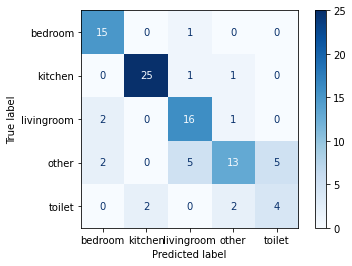

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56
  57  58  59  61  62  63  64  65  66  67  68  70  71  72  73  74  75  76
  78  79  80  81  82  83  85  86  87  88  90  91  92  93  94  95  97  98
  99 100 101 103 104 105 106 107 108 109 110 111 113 114 115 117 119 120
 122 123 124 125 126 128 129 130 131 133 135 136 137 138 139 140 141 142
 143 144 145 146 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 167 168 170 171 172 173 174 176 177 178 179 181 182 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 212 213 214 216 217 218 220 221 223 224 225 226
 227 230 231 234 235 236 237 238 239 240 241 242 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 263 264 265 266 267 268
 269 270 271 272 273 276 278 280 281 282 283

Epoch 19/100
14/14 [==============================] - 0s 12ms/step - loss: 0.2436 - accuracy: 0.7103 - val_loss: 0.2592 - val_accuracy: 0.7368
Epoch 20/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2348 - accuracy: 0.7186 - val_loss: 0.2596 - val_accuracy: 0.7684
Epoch 21/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2445 - accuracy: 0.7121 - val_loss: 0.2656 - val_accuracy: 0.7263
Epoch 22/100
14/14 [==============================] - 0s 12ms/step - loss: 0.2387 - accuracy: 0.6999 - val_loss: 0.2683 - val_accuracy: 0.7158
Epoch 23/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2340 - accuracy: 0.7099 - val_loss: 0.2525 - val_accuracy: 0.7158
Epoch 24/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2217 - accuracy: 0.7031 - val_loss: 0.2511 - val_accuracy: 0.7474
Epoch 25/100
14/14 [==============================] - 0s 18ms/step - loss: 0.2178 - accuracy: 0.7496 - val_loss: 0.2433 - val_accuracy: 0.7263
E

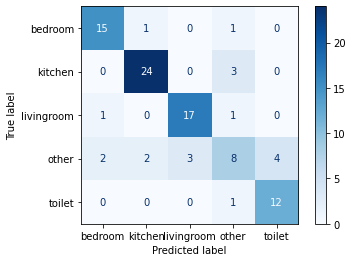

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  29  30  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  76  77  78  79  80  81  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 151 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 169
 170 172 173 174 175 176 177 178 179 180 181 183 184 185 186 187 188 189
 190 193 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 238 243 244 245 247 248 249 250 251 253
 254 256 257 258 259 260 262 263 264 265 266

Epoch 19/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2280 - accuracy: 0.7399 - val_loss: 0.2415 - val_accuracy: 0.7234
Epoch 20/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2327 - accuracy: 0.7439 - val_loss: 0.2429 - val_accuracy: 0.7021
Epoch 21/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2259 - accuracy: 0.7465 - val_loss: 0.2409 - val_accuracy: 0.6809
Epoch 22/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2243 - accuracy: 0.7272 - val_loss: 0.2413 - val_accuracy: 0.7021
Epoch 23/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2131 - accuracy: 0.7524 - val_loss: 0.2345 - val_accuracy: 0.6915
Epoch 24/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2148 - accuracy: 0.7404 - val_loss: 0.2359 - val_accuracy: 0.6915
Epoch 25/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2150 - accuracy: 0.7525 - val_loss: 0.2506 - val_accuracy: 0.7340
Epoch 

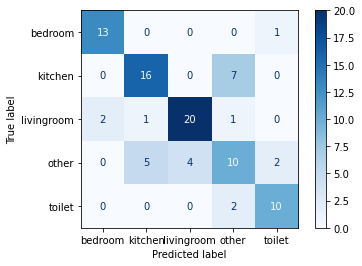

TRAIN: [  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  21  22  23  24  25  26  27  28  29  30  31  33  34  35  37  39  40  41
  42  43  44  45  47  48  49  50  51  52  53  54  55  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 106 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 124 125 127 129 130 131 132 133 134 135 136 137 139 140 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 252 253 254 255 256 257
 258 260 261 262 263 264 266 267 268 269 270

Epoch 19/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2314 - accuracy: 0.7210 - val_loss: 0.2828 - val_accuracy: 0.6596
Epoch 20/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2422 - accuracy: 0.7000 - val_loss: 0.2824 - val_accuracy: 0.6596
Epoch 21/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2266 - accuracy: 0.7330 - val_loss: 0.2831 - val_accuracy: 0.6915
Epoch 22/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2344 - accuracy: 0.7170 - val_loss: 0.3007 - val_accuracy: 0.6383
Epoch 23/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2274 - accuracy: 0.7333 - val_loss: 0.2975 - val_accuracy: 0.6596
Epoch 24/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2258 - accuracy: 0.7189 - val_loss: 0.3015 - val_accuracy: 0.6489
Epoch 25/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2328 - accuracy: 0.7072 - val_loss: 0.2963 - val_accuracy: 0.6489


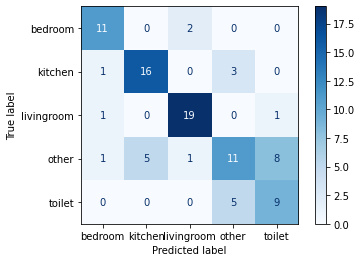

TRAIN: [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  23  24  25  26  28  29  30  31  32  33  35  36  38  39  40  41
  42  43  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 157 158 159 161 162 164 165 166 167 168 169 170 171 172 173 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 198 199 200 201 202 203 205 206 207 208 209 210 211 213 214 215
 216 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 237 238 239 240 241 242 243 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 265 267

Epoch 19/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2334 - accuracy: 0.6975 - val_loss: 0.3024 - val_accuracy: 0.6809
Epoch 20/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2395 - accuracy: 0.7057 - val_loss: 0.3212 - val_accuracy: 0.6383
Epoch 21/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2348 - accuracy: 0.7055 - val_loss: 0.2912 - val_accuracy: 0.6915
Epoch 22/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2213 - accuracy: 0.7394 - val_loss: 0.3019 - val_accuracy: 0.6915
Epoch 23/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2260 - accuracy: 0.7233 - val_loss: 0.3110 - val_accuracy: 0.6702
Epoch 24/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2281 - accuracy: 0.7164 - val_loss: 0.2975 - val_accuracy: 0.7021
Epoch 25/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2202 - accuracy: 0.7428 - val_loss: 0.2998 - val_accuracy: 0.6809
Epoch

Epoch 77/100
14/14 [==============================] - 0s 8ms/step - loss: 0.1017 - accuracy: 0.8850 - val_loss: 0.3224 - val_accuracy: 0.7766
Epoch 78/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0890 - accuracy: 0.9108 - val_loss: 0.3475 - val_accuracy: 0.7553
Epoch 79/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0933 - accuracy: 0.9051 - val_loss: 0.3538 - val_accuracy: 0.7340
Epoch 80/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1063 - accuracy: 0.8755 - val_loss: 0.3307 - val_accuracy: 0.7234
Epoch 81/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0926 - accuracy: 0.8982 - val_loss: 0.3748 - val_accuracy: 0.7447
Epoch 82/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0805 - accuracy: 0.9131 - val_loss: 0.4131 - val_accuracy: 0.7021
Epoch 83/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0784 - accuracy: 0.9144 - val_loss: 0.3951 - val_accuracy: 0.7340
Epoch 

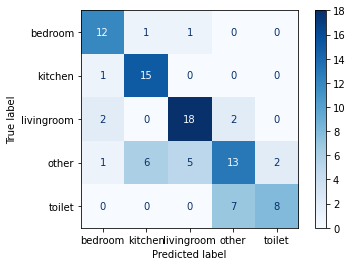

TRAIN: [  0   2   3   4   5   6   7   9  10  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  44  45  46  47  48  49  51  52  53  54  55  56  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  75  77  78  79  80  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98 100 101
 102 103 104 105 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 140
 141 142 144 145 146 147 148 149 150 151 152 154 156 157 158 159 160 161
 162 163 164 165 166 169 170 171 172 174 175 177 178 179 180 181 182 183
 184 186 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 204
 206 207 208 210 211 212 214 215 217 218 219 220 221 222 223 224 225 227
 228 229 230 231 232 233 234 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 261 262 263 264 265
 266 268 269 270 271 272 273 274 275 276 277

Epoch 19/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2494 - accuracy: 0.6759 - val_loss: 0.2065 - val_accuracy: 0.8191
Epoch 20/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2446 - accuracy: 0.6906 - val_loss: 0.1935 - val_accuracy: 0.8085
Epoch 21/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2474 - accuracy: 0.7013 - val_loss: 0.1935 - val_accuracy: 0.8085
Epoch 22/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2421 - accuracy: 0.6876 - val_loss: 0.2002 - val_accuracy: 0.8085
Epoch 23/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2274 - accuracy: 0.7127 - val_loss: 0.1936 - val_accuracy: 0.7872
Epoch 24/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2265 - accuracy: 0.7264 - val_loss: 0.1902 - val_accuracy: 0.8191
Epoch 25/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2215 - accuracy: 0.7402 - val_loss: 0.2240 - val_accuracy: 0.7660
Epoch 

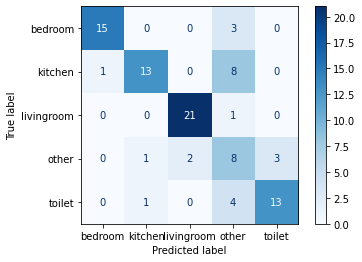

TRAIN: [  0   1   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  22  24  26  27  28  29  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  54  55  56  57  59  60  61
  63  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  88  89  90  91  92  93  94  95  96  98  99 100 101 102 103 105 106
 107 108 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 132 133 134 136 138 139 140 141 142 143 144 145 146
 147 150 152 153 154 155 156 157 159 160 161 162 163 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 182 183 184 185 187 188 189
 190 191 192 193 194 195 197 198 199 200 202 203 204 205 206 207 209 210
 211 212 213 214 215 216 217 219 220 221 222 224 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 249 250
 251 252 253 255 256 257 258 259 260 261 262 264 265 266 267 269 270 271
 272 273 274 275 276 277 279 280 281 282 283

Epoch 19/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2444 - accuracy: 0.7090 - val_loss: 0.2703 - val_accuracy: 0.6596
Epoch 20/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2303 - accuracy: 0.7158 - val_loss: 0.2713 - val_accuracy: 0.6489
Epoch 21/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2352 - accuracy: 0.6980 - val_loss: 0.2843 - val_accuracy: 0.6489
Epoch 22/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2517 - accuracy: 0.7122 - val_loss: 0.2952 - val_accuracy: 0.6596
Epoch 23/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2268 - accuracy: 0.7113 - val_loss: 0.2497 - val_accuracy: 0.6809
Epoch 24/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2369 - accuracy: 0.7057 - val_loss: 0.2686 - val_accuracy: 0.6702
Epoch 25/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2336 - accuracy: 0.7001 - val_loss: 0.2523 - val_accuracy: 0.6809
Epoch 

Epoch 77/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0884 - accuracy: 0.9035 - val_loss: 0.2749 - val_accuracy: 0.8085
Epoch 78/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0866 - accuracy: 0.9134 - val_loss: 0.2460 - val_accuracy: 0.8085
Epoch 79/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0925 - accuracy: 0.9011 - val_loss: 0.2559 - val_accuracy: 0.7979
Epoch 80/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0780 - accuracy: 0.9193 - val_loss: 0.2445 - val_accuracy: 0.7872
Epoch 81/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0873 - accuracy: 0.9085 - val_loss: 0.2449 - val_accuracy: 0.8085
Epoch 82/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0852 - accuracy: 0.9082 - val_loss: 0.2461 - val_accuracy: 0.7766
Epoch 83/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0804 - accuracy: 0.9150 - val_loss: 0.2639 - val_accuracy: 0.8191
Epoch 

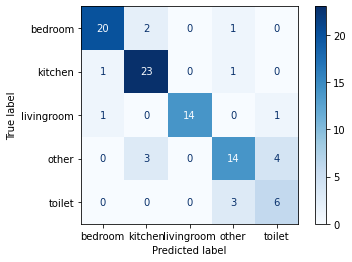

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  49  50  52  53  54  56  57  58
  59  60  61  62  64  65  66  67  68  69  72  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 112 114 115 116 118 119
 121 122 123 124 126 127 128 129 130 131 132 133 134 135 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 162 163 164 165 166 167 168 169 170 171 173 174 175 176 177 179
 180 181 182 183 184 185 186 187 188 189 191 192 194 195 196 197 198 199
 200 201 202 203 204 205 206 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 239 240 241 242 243 244 245 246 248 249 250 251 252 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268

Epoch 19/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2293 - accuracy: 0.7207 - val_loss: 0.2525 - val_accuracy: 0.7128
Epoch 20/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2500 - accuracy: 0.7174 - val_loss: 0.2445 - val_accuracy: 0.7234
Epoch 21/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2267 - accuracy: 0.7275 - val_loss: 0.2454 - val_accuracy: 0.7234
Epoch 22/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2178 - accuracy: 0.7306 - val_loss: 0.2581 - val_accuracy: 0.6809
Epoch 23/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2283 - accuracy: 0.7333 - val_loss: 0.2496 - val_accuracy: 0.7128
Epoch 24/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2312 - accuracy: 0.7194 - val_loss: 0.2497 - val_accuracy: 0.7234
Epoch 25/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2134 - accuracy: 0.7386 - val_loss: 0.2451 - val_accuracy: 0.7128
Epoch 

Epoch 77/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0736 - accuracy: 0.9275 - val_loss: 0.3381 - val_accuracy: 0.7660
Epoch 78/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0811 - accuracy: 0.9131 - val_loss: 0.3133 - val_accuracy: 0.7872
Epoch 79/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0737 - accuracy: 0.9169 - val_loss: 0.3606 - val_accuracy: 0.7872
Epoch 80/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0741 - accuracy: 0.9363 - val_loss: 0.3567 - val_accuracy: 0.7553
Epoch 81/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0859 - accuracy: 0.9236 - val_loss: 0.2928 - val_accuracy: 0.7447
Epoch 82/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0743 - accuracy: 0.9326 - val_loss: 0.3389 - val_accuracy: 0.7766
Epoch 83/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0856 - accuracy: 0.9383 - val_loss: 0.3693 - val_accuracy: 0.7766
Epoch 

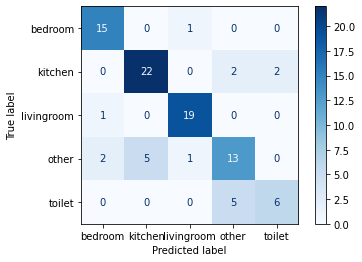

TRAIN: [  0   1   2   3   4   5   6   7   8  10  11  12  13  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38
  39  40  42  43  44  45  46  47  48  50  51  52  53  54  55  56  57  58
  60  62  63  64  65  66  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  95  96  97  98  99 101
 102 103 104 105 106 107 109 110 111 112 113 114 116 117 118 119 120 121
 122 123 125 126 127 128 130 131 132 133 134 135 136 137 138 139 140 141
 143 146 147 148 149 150 151 152 153 154 155 156 157 158 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 178 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 201 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 225 226 227 228 229 230 231 232 233 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272

Epoch 19/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2489 - accuracy: 0.6949 - val_loss: 0.2377 - val_accuracy: 0.7447
Epoch 20/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2449 - accuracy: 0.7110 - val_loss: 0.2480 - val_accuracy: 0.7553
Epoch 21/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2525 - accuracy: 0.7019 - val_loss: 0.2309 - val_accuracy: 0.7553
Epoch 22/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2426 - accuracy: 0.7199 - val_loss: 0.2279 - val_accuracy: 0.7660
Epoch 23/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2390 - accuracy: 0.6929 - val_loss: 0.2315 - val_accuracy: 0.7660
Epoch 24/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2393 - accuracy: 0.7053 - val_loss: 0.2322 - val_accuracy: 0.7447
Epoch 25/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2329 - accuracy: 0.7145 - val_loss: 0.2254 - val_accuracy: 0.7660
Epoch 

Epoch 77/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0995 - accuracy: 0.8757 - val_loss: 0.2397 - val_accuracy: 0.8085
Epoch 78/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1018 - accuracy: 0.8802 - val_loss: 0.2596 - val_accuracy: 0.7660
Epoch 79/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1048 - accuracy: 0.8950 - val_loss: 0.2466 - val_accuracy: 0.7660
Epoch 80/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0916 - accuracy: 0.9045 - val_loss: 0.2368 - val_accuracy: 0.8085
Epoch 81/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0983 - accuracy: 0.8857 - val_loss: 0.2310 - val_accuracy: 0.8085
Epoch 82/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0935 - accuracy: 0.8869 - val_loss: 0.3141 - val_accuracy: 0.7553
Epoch 83/100
14/14 [==============================] - 0s 9ms/step - loss: 0.1048 - accuracy: 0.8839 - val_loss: 0.2700 - val_accuracy: 0.7660
Epoch 

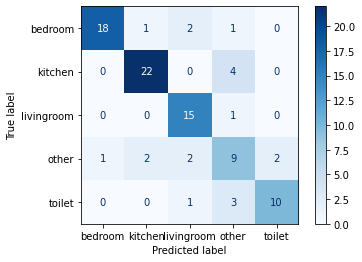

TRAIN: [  0   1   2   3   4   5   8   9  10  11  12  13  14  15  17  18  19  20
  21  22  23  25  26  27  29  30  31  32  33  34  36  37  38  39  41  42
  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80  81
  82  83  84  85  86  87  88  89  93  94  95  96  97  98  99 100 102 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 207 208 209 210 211 212 213 215 216
 217 218 219 220 221 222 223 224 225 226 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265

Epoch 19/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2567 - accuracy: 0.6882 - val_loss: 0.3521 - val_accuracy: 0.5319
Epoch 20/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2349 - accuracy: 0.7179 - val_loss: 0.3317 - val_accuracy: 0.5319
Epoch 21/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2283 - accuracy: 0.7498 - val_loss: 0.3387 - val_accuracy: 0.5532
Epoch 22/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2439 - accuracy: 0.7020 - val_loss: 0.3835 - val_accuracy: 0.5213
Epoch 23/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2376 - accuracy: 0.7164 - val_loss: 0.3270 - val_accuracy: 0.5426
Epoch 24/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2343 - accuracy: 0.7264 - val_loss: 0.3463 - val_accuracy: 0.5426
Epoch 25/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2245 - accuracy: 0.7364 - val_loss: 0.3310 - val_accuracy: 0.5638
Epoch 

Epoch 77/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1142 - accuracy: 0.8664 - val_loss: 0.4420 - val_accuracy: 0.6064
Epoch 78/100
14/14 [==============================] - 0s 8ms/step - loss: 0.1055 - accuracy: 0.8844 - val_loss: 0.4128 - val_accuracy: 0.6277
Epoch 79/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0994 - accuracy: 0.8857 - val_loss: 0.4910 - val_accuracy: 0.5957
Epoch 80/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1205 - accuracy: 0.8668 - val_loss: 0.4380 - val_accuracy: 0.6064
Epoch 81/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0901 - accuracy: 0.9097 - val_loss: 0.4850 - val_accuracy: 0.6064
Epoch 82/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0911 - accuracy: 0.8985 - val_loss: 0.5765 - val_accuracy: 0.6170
Epoch 83/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1142 - accuracy: 0.8844 - val_loss: 0.3972 - val_accuracy: 0.6915
Epoch 

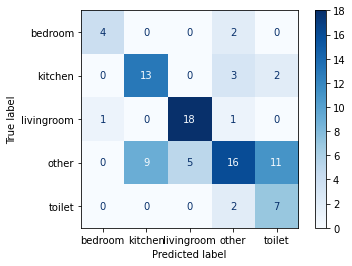

In [10]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.model_selection import KFold


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


#Dividimos los datos en K fold para cross validation
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(X)

Y_pred_total=np.array([])
Y_val_total=np.array([])

#Para cada K del cross validator   
for train_index, test_index in kf.split(X):
    #Datos de train y test
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y0[train_index], Y0[test_index]
    

    #un nuevo modelo
    model = keras.Sequential()

    #3 capas de convolucion 
    #INPUT (8 valores de cada sequencia, 4 anclas * 2 (ventanas futuras+ventana pasadas) * 1 caracteristicas (avg))
    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(8,2*4*1)))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

    #2 capas de LSTM de secuencia
    model.add(Dropout(0.5))
    model.add(LSTM(32, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32))

    #lo pasamos a una capa densa y hacemos regrension de dos valores (posX,posY)
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Dense(256))
    model.add(Dense(5, activation="softmax"))

    model.compile(loss=['binary_crossentropy'],optimizer='adam',metrics=['accuracy'])
    model.summary()

    #iteramos 1000 veces
    history = model.fit(x_train , y_train,
                        batch_size=64,
                validation_data=(x_val,y_val),
                class_weight=cw,
                epochs=100)
    # Predecimos
    y_pred = model.predict(x_val).argmax(axis=1)

    y_val=y_val.argmax(axis=1)
    print(y_pred)
    print(y_val)
    
    cm = confusion_matrix(y_val, y_pred) 
    print(cm)
    print('Classification Report')
    print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))
    
    

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,y_val))


[[138   5   7   8   1]
 [  4 189   1  32   4]
 [ 11   1 177   8   2]
 [  9  38  28 115  41]
 [  0   3   1  34  85]]
Classification Report SCENE
              precision    recall  f1-score   support

     bedroom       0.85      0.87      0.86       159
     kitchen       0.80      0.82      0.81       230
  livingroom       0.83      0.89      0.86       199
       other       0.58      0.50      0.54       231
      toilet       0.64      0.69      0.66       123

    accuracy                           0.75       942
   macro avg       0.74      0.75      0.75       942
weighted avg       0.74      0.75      0.74       942



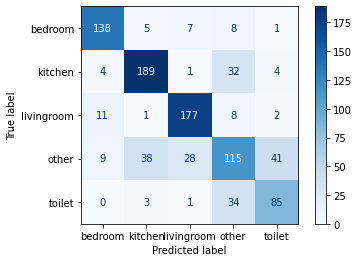

In [11]:
cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report SCENE')
print(classification_report(Y_val_total, Y_pred_total, target_names=label_encoder.classes_))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.show()